<h1>Loan Approval Prediction Project</h1>

<h2>Lifecycle of Machine Learning Project</h2>

1. Understanding of problem Statement
2. Data Collection
3. Data checks for performance
4. Exploratory Data Analysis
5. Data Pre Processing
6. Model Training
7. Choose Best Model

<h3>1. Understanding of Problem Statment</h3>

The company seeks to automate (in real time) the loan approval procedure based on information given by customers while filling out an online application form. It is expected that the development of ML models that can help the company predict loan approval in accelerating decision-making process for determining whether an applicant is eligible for a loan or not.

<h3>2. Data Collection</h3>

Data is collected from AWS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats

In [2]:
df = pd.read_csv(r"D:\DS_Stats\E2E_DS_Propjects\Loan-Approval-Prediction-Project\raw_data\LoansTrainingSetV2 (1).csv")

In [3]:
df.shape

(111107, 19)

The data consists of 111107 rows and 19 columns

In [4]:
df.head()

Loan ID                           Customer ID  \
0  6cf51492-02a2-423e-b93d-676f05b9ad53  7c202b37-2add-44e8-9aea-d5b119aea935   
1  552e7ade-4292-4354-9ff9-c48031697d72  e7217b0a-07ac-47dd-b379-577b5a35b7c6   
2  9b5e32b3-8d76-4801-afc8-d729d5a2e6b9  0a62fc41-16c8-40b5-92ff-9e4b763ce714   
3  5419b7c7-ac11-4be2-a8a7-b131fb6d6dbe  30f36c59-5182-4482-8bbb-5b736849ae43   
4  1450910f-9495-4fc9-afaf-9bdf4b9821df  70c26012-bba5-42c0-8dcb-75295ada31bb   

    Loan Status  Current Loan Amount        Term  Credit Score  \
0  Loan Refused                12232  Short Term        7280.0   
1  Loan Refused                25014   Long Term        7330.0   
2  Loan Refused                16117  Short Term        7240.0   
3  Loan Refused                11716  Short Term        7400.0   
4  Loan Refused                 9789   Long Term        6860.0   

  Years in current job Home Ownership  Annual Income             Purpose  \
0             < 1 year           Rent        46643.0  Debt Consolidation   
1            10+ years  Home Mortgage        81099.0  Debt Consolidation   
2              9 years  Home Mortgage        60438.0   Home Improvements   
3              3 years           Rent        34171.0  Debt Consolidation   
4            10+ years  Home Mortgage        47003.0   Home Improvements   

  Monthly Debt  Years of Credit History  Months since last delinquent  \
0       777.39                     18.0                          10.0   
1       892.09                     26.7                           NaN   
2      1244.02                     16.7                          32.0   
3       990.94                     10.0                           NaN   
4       503.71                     16.7                          25.0   

   Number of Open Accounts  Number of Credit Problems  Current Credit Balance  \
0                       12                          0                    6762   
1                       14                          0                   35706   
2                       11                          1                   11275   
3                       21                          0                    7009   
4                       13                          1                   16913   

  Maximum Open Credit  Bankruptcies  Tax Liens  
0                7946           0.0        0.0  
1               77961           0.0        0.0  
2               14815           1.0        0.0  
3               43533           0.0        0.0  
4               19553           1.0        0.0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111107 entries, 0 to 111106
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       111107 non-null  object 
 1   Customer ID                   111107 non-null  object 
 2   Loan Status                   111107 non-null  object 
 3   Current Loan Amount           111107 non-null  int64  
 4   Term                          111107 non-null  object 
 5   Credit Score                  89769 non-null   float64
 6   Years in current job          106414 non-null  object 
 7   Home Ownership                111107 non-null  object 
 8   Annual Income                 89769 non-null   float64
 9   Purpose                       111107 non-null  object 
 10  Monthly Debt                  111107 non-null  object 
 11  Years of Credit History       111107 non-null  float64
 12  Months since last delinquent  52104 non-null

The data has 9 Categorical Features and 10 Numerical Features

<h3>3. Performing Data Check and EDA</h3>

- Check Duplicates
- Check Datatypes
- Check numbers of unique values in a column
- Check the statistics of the dataset
- Check various categories present in different categorical columns
- Check for missing values
- EDA

<h4>3.1 Check Duplicates

In [6]:
df.duplicated().sum()

5869

There 5869 rows with dupliate values where all the compones in the entry is duplicate of another entry

In [7]:
df_col_2_duplicate = df[df['Customer ID'].duplicated()==True]
df_col_2_duplicate.shape

(22197, 19)

In [8]:
df_col_1_duplicate = df[df['Loan ID'].duplicated()==True]
df_col_1_duplicate.shape

(22197, 19)

On deeper analysis it was found there are 22197 duplicate entries with same Loan ID and Customer ID. This needs to be removed to reduce overfitting and bias in model. 

In [9]:
df.shape

(111107, 19)

In [10]:

df_duplicates_removed = df.drop_duplicates(subset='Loan ID',keep='first',inplace=False)

In [11]:
df_duplicates_removed.shape

(88910, 19)

22197 duplicate records removed from the data

<h4>3.2 Check Datatypes of Features

In [12]:
column_datatypes = df_duplicates_removed.dtypes
print(column_datatypes)


Loan ID                          object
Customer ID                      object
Loan Status                      object
Current Loan Amount               int64
Term                             object
Credit Score                    float64
Years in current job             object
Home Ownership                   object
Annual Income                   float64
Purpose                          object
Monthly Debt                     object
Years of Credit History         float64
Months since last delinquent    float64
Number of Open Accounts           int64
Number of Credit Problems         int64
Current Credit Balance            int64
Maximum Open Credit              object
Bankruptcies                    float64
Tax Liens                       float64
dtype: object


In [13]:
categorical_features = [feature for feature in df_duplicates_removed.columns if df_duplicates_removed[feature].dtype =='O' ]
numerical_features = [feature for feature in df_duplicates_removed.columns if df_duplicates_removed[feature].dtype !='O' ]

In [14]:
print(f'We have {len(categorical_features)} Categorical Feature which are : {categorical_features}')
print(f'\nWe have {len(numerical_features)} Numerical Feature which are : {numerical_features}')

We have 9 Categorical Feature which are : ['Loan ID', 'Customer ID', 'Loan Status', 'Term', 'Years in current job', 'Home Ownership', 'Purpose', 'Monthly Debt', 'Maximum Open Credit']

We have 10 Numerical Feature which are : ['Current Loan Amount', 'Credit Score', 'Annual Income', 'Years of Credit History', 'Months since last delinquent', 'Number of Open Accounts', 'Number of Credit Problems', 'Current Credit Balance', 'Bankruptcies', 'Tax Liens']


<h4>3.3 Check for Unique Values in Feature

In [15]:
df_duplicates_removed.nunique()

Loan ID                         88910
Customer ID                     88910
Loan Status                         2
Current Loan Amount             22081
Term                                2
Credit Score                      326
Years in current job               11
Home Ownership                      4
Annual Income                   36344
Purpose                            16
Monthly Debt                    76609
Years of Credit History           508
Months since last delinquent      116
Number of Open Accounts            52
Number of Credit Problems          14
Current Credit Balance          33716
Maximum Open Credit             58216
Bankruptcies                        8
Tax Liens                          13
dtype: int64

<h4>3.4 Check Statistic for Numerical Features

In [16]:
df_duplicates_removed.describe()

Current Loan Amount  Credit Score  Annual Income  \
count         8.891000e+04  67572.000000   6.757200e+04   
mean          1.433878e+07   1199.199580   7.234575e+04   
std           3.502996e+07   1680.813805   5.836101e+04   
min           4.910000e+02    585.000000   4.033000e+03   
25%           8.283000e+03    714.000000   4.458600e+04   
50%           1.435500e+04    733.000000   6.149400e+04   
75%           2.448500e+04    744.000000   8.675025e+04   
max           1.000000e+08   7510.000000   8.713547e+06   

       Years of Credit History  Months since last delinquent  \
count             88910.000000                  40404.000000   
mean                 18.315313                     35.080289   
std                   7.049175                     22.008583   
min                   3.600000                      0.000000   
25%                  13.500000                     16.000000   
50%                  17.000000                     32.000000   
75%                  21.800000                     51.000000   
max                  70.500000                    176.000000   

       Number of Open Accounts  Number of Credit Problems  \
count             88910.000000               88910.000000   
mean                 11.110348                   0.160477   
std                   4.978461                   0.473746   
min                   0.000000                   0.000000   
25%                   8.000000                   0.000000   
50%                  10.000000                   0.000000   
75%                  14.000000                   0.000000   
max                  76.000000                  15.000000   

       Current Credit Balance  Bankruptcies     Tax Liens  
count            8.891000e+04  88718.000000  88902.000000  
mean             1.543593e+04      0.112672      0.028222  
std              1.965873e+04      0.343300      0.257533  
min              0.000000e+00      0.000000      0.000000  
25%              5.949000e+03      0.000000      0.000000  
50%              1.103900e+04      0.000000      0.000000  
75%              1.930100e+04      0.000000      0.000000  
max              1.730472e+06      7.000000     15.000000

<h4>3.5 Check for various categories present in categorical feature

In [17]:
for feature in categorical_features:
    unique_category = df_duplicates_removed[feature].unique()
    print(f'\nCategories in {feature} are {unique_category}')


Categories in Loan ID are ['6cf51492-02a2-423e-b93d-676f05b9ad53'
 '552e7ade-4292-4354-9ff9-c48031697d72'
 '9b5e32b3-8d76-4801-afc8-d729d5a2e6b9' ...
 'd43b4c9c-8cb9-4cff-b86c-84b4f2c6aa13'
 'e3ffa0d5-5164-4815-9231-7ae5e0887dfd'
 '26e3e4f3-7442-4b68-bc2b-a9c4567f67ce']

Categories in Customer ID are ['7c202b37-2add-44e8-9aea-d5b119aea935'
 'e7217b0a-07ac-47dd-b379-577b5a35b7c6'
 '0a62fc41-16c8-40b5-92ff-9e4b763ce714' ...
 '5dc48d5a-36e9-4e52-9568-d81f218386b0'
 '2bfeb5be-6441-4e2d-be6e-20a138127d93'
 '5514bfcc-e996-4d9b-80d4-9ea66dfa1ac5']

Categories in Loan Status are ['Loan Refused' 'Loan Given']

Categories in Term are ['Short Term' 'Long Term']

Categories in Years in current job are ['< 1 year' '10+ years' '9 years' '3 years' '2 years' '7 years' '6 years'
 '1 year' '5 years' '4 years' '8 years' nan]

Categories in Home Ownership are ['Rent' 'Home Mortgage' 'Own Home' 'HaveMortgage']

Categories in Purpose are ['Debt Consolidation' 'Home Improvements' 'other' 'Business Loan'
 's

It seems Monthly Debt and Maximum Open Credit have numerical values but the datatype is object. We will convert these feature to float datatype

In [18]:
df_duplicates_removed['Monthly Debt'] = df_duplicates_removed['Monthly Debt'].str.replace('$','')

In [19]:
df_duplicates_removed['Monthly Debt'] = df_duplicates_removed['Monthly Debt'].astype(float)

In [20]:
df_duplicates_removed['Maximum Open Credit'] = pd.to_numeric(df_duplicates_removed['Maximum Open Credit'], errors='coerce')

In [21]:
df_duplicates_removed['Maximum Open Credit'] = df_duplicates_removed['Maximum Open Credit'].astype(float)

In [22]:
categorical_features = [feature for feature in df_duplicates_removed.columns if df_duplicates_removed[feature].dtype =='O' ]
numerical_features = [feature for feature in df_duplicates_removed.columns if df_duplicates_removed[feature].dtype !='O' ]

print(f'We have {len(categorical_features)} Categorical Feature which are : {categorical_features}')
print(f'\nWe have {len(numerical_features)} Numerical Feature which are : {numerical_features}')

We have 7 Categorical Feature which are : ['Loan ID', 'Customer ID', 'Loan Status', 'Term', 'Years in current job', 'Home Ownership', 'Purpose']

We have 12 Numerical Feature which are : ['Current Loan Amount', 'Credit Score', 'Annual Income', 'Monthly Debt', 'Years of Credit History', 'Months since last delinquent', 'Number of Open Accounts', 'Number of Credit Problems', 'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies', 'Tax Liens']


In [23]:
for feature in categorical_features:
    unique_category = df_duplicates_removed[feature].unique()
    print(f'\nCategories in {feature} are {unique_category}')


Categories in Loan ID are ['6cf51492-02a2-423e-b93d-676f05b9ad53'
 '552e7ade-4292-4354-9ff9-c48031697d72'
 '9b5e32b3-8d76-4801-afc8-d729d5a2e6b9' ...
 'd43b4c9c-8cb9-4cff-b86c-84b4f2c6aa13'
 'e3ffa0d5-5164-4815-9231-7ae5e0887dfd'
 '26e3e4f3-7442-4b68-bc2b-a9c4567f67ce']

Categories in Customer ID are ['7c202b37-2add-44e8-9aea-d5b119aea935'
 'e7217b0a-07ac-47dd-b379-577b5a35b7c6'
 '0a62fc41-16c8-40b5-92ff-9e4b763ce714' ...
 '5dc48d5a-36e9-4e52-9568-d81f218386b0'
 '2bfeb5be-6441-4e2d-be6e-20a138127d93'
 '5514bfcc-e996-4d9b-80d4-9ea66dfa1ac5']

Categories in Loan Status are ['Loan Refused' 'Loan Given']

Categories in Term are ['Short Term' 'Long Term']

Categories in Years in current job are ['< 1 year' '10+ years' '9 years' '3 years' '2 years' '7 years' '6 years'
 '1 year' '5 years' '4 years' '8 years' nan]

Categories in Home Ownership are ['Rent' 'Home Mortgage' 'Own Home' 'HaveMortgage']

Categories in Purpose are ['Debt Consolidation' 'Home Improvements' 'other' 'Business Loan'
 's

<h4>3.6 Check for Missing Values and Analysis</h4>

In [24]:
null_percentage= df_duplicates_removed.isnull().sum() / df.shape[0] * 100
columns_with_null = null_percentage[null_percentage > 0]
print(columns_with_null)

Credit Score                    19.204911
Years in current job             3.435427
Annual Income                   19.204911
Monthly Debt                    21.037378
Months since last delinquent    43.657015
Maximum Open Credit              0.001800
Bankruptcies                     0.172806
Tax Liens                        0.007200
dtype: float64


<Axes: >

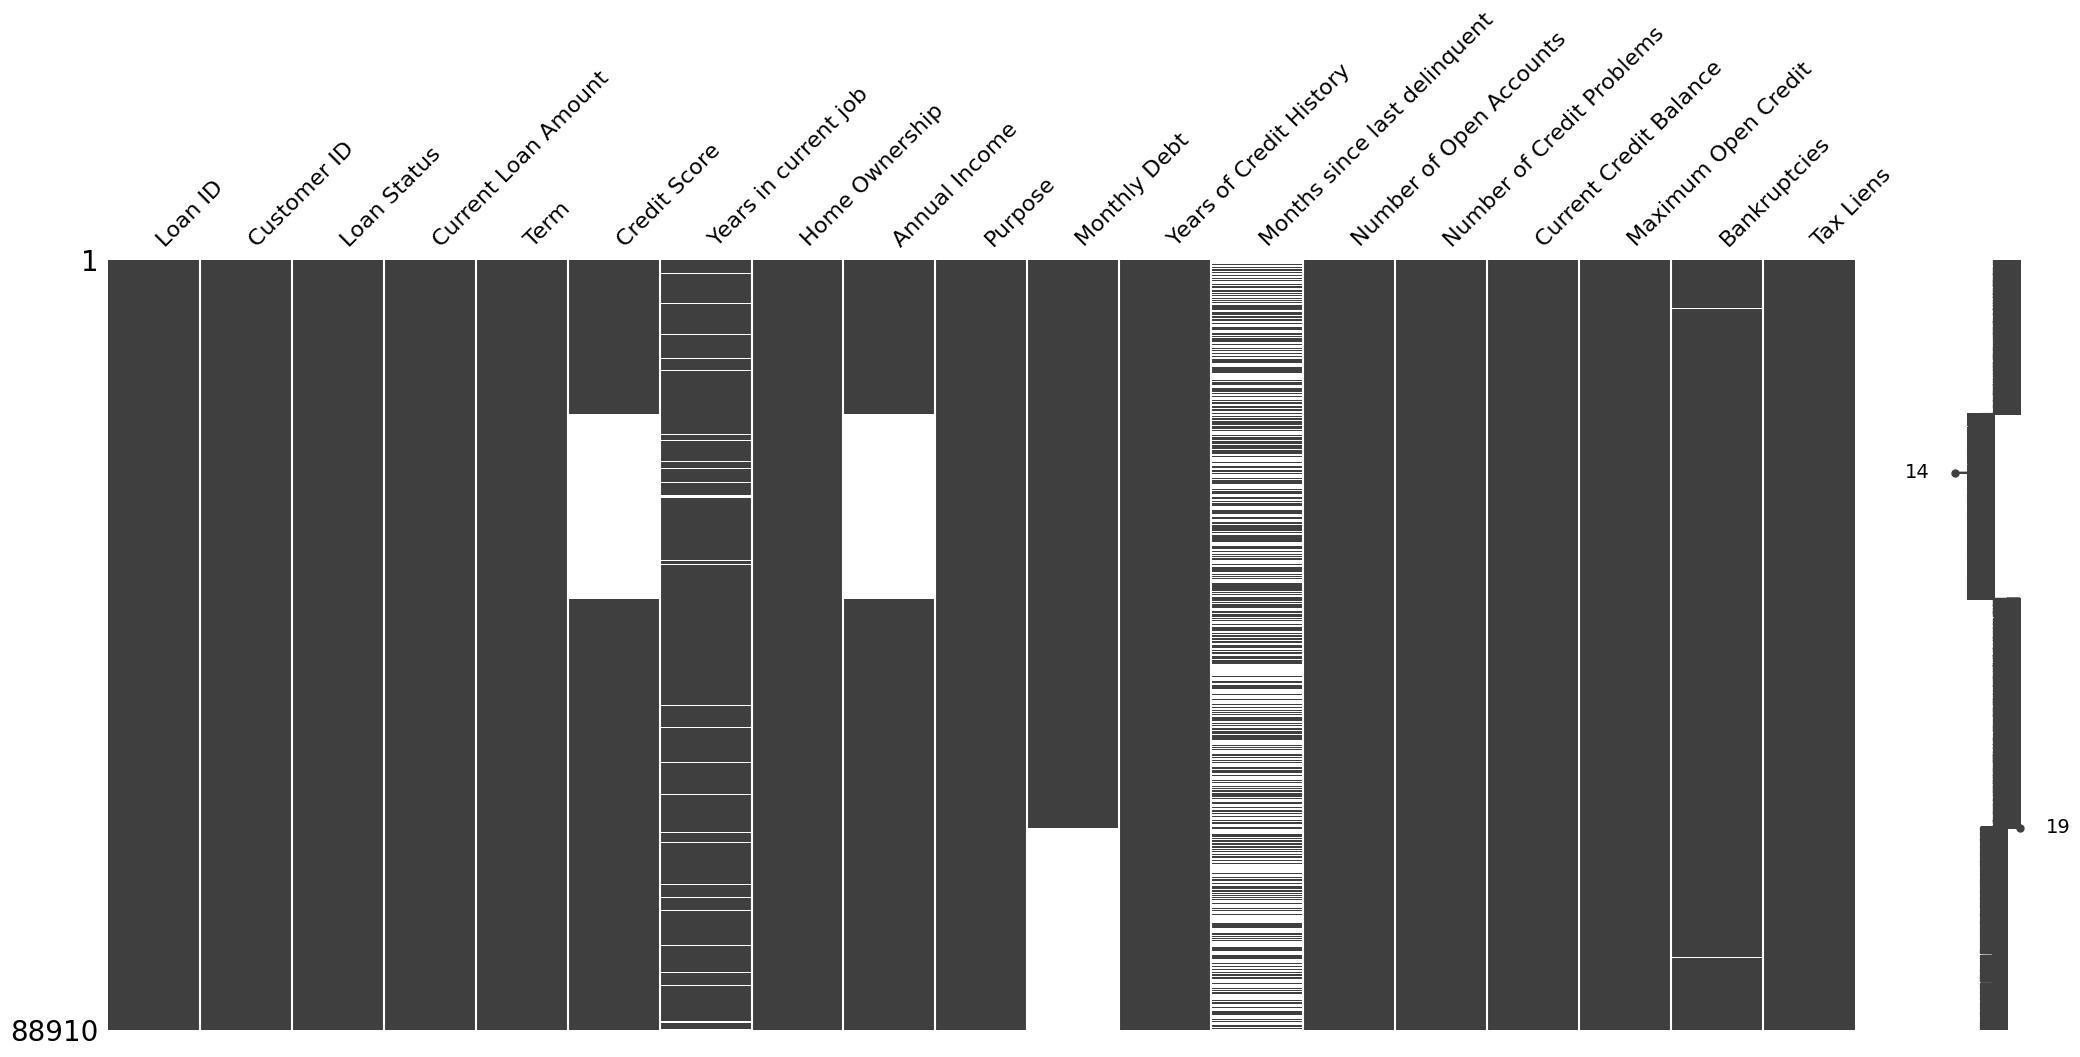

In [25]:
import missingno as msno
msno.matrix(df_duplicates_removed)

<Axes: >

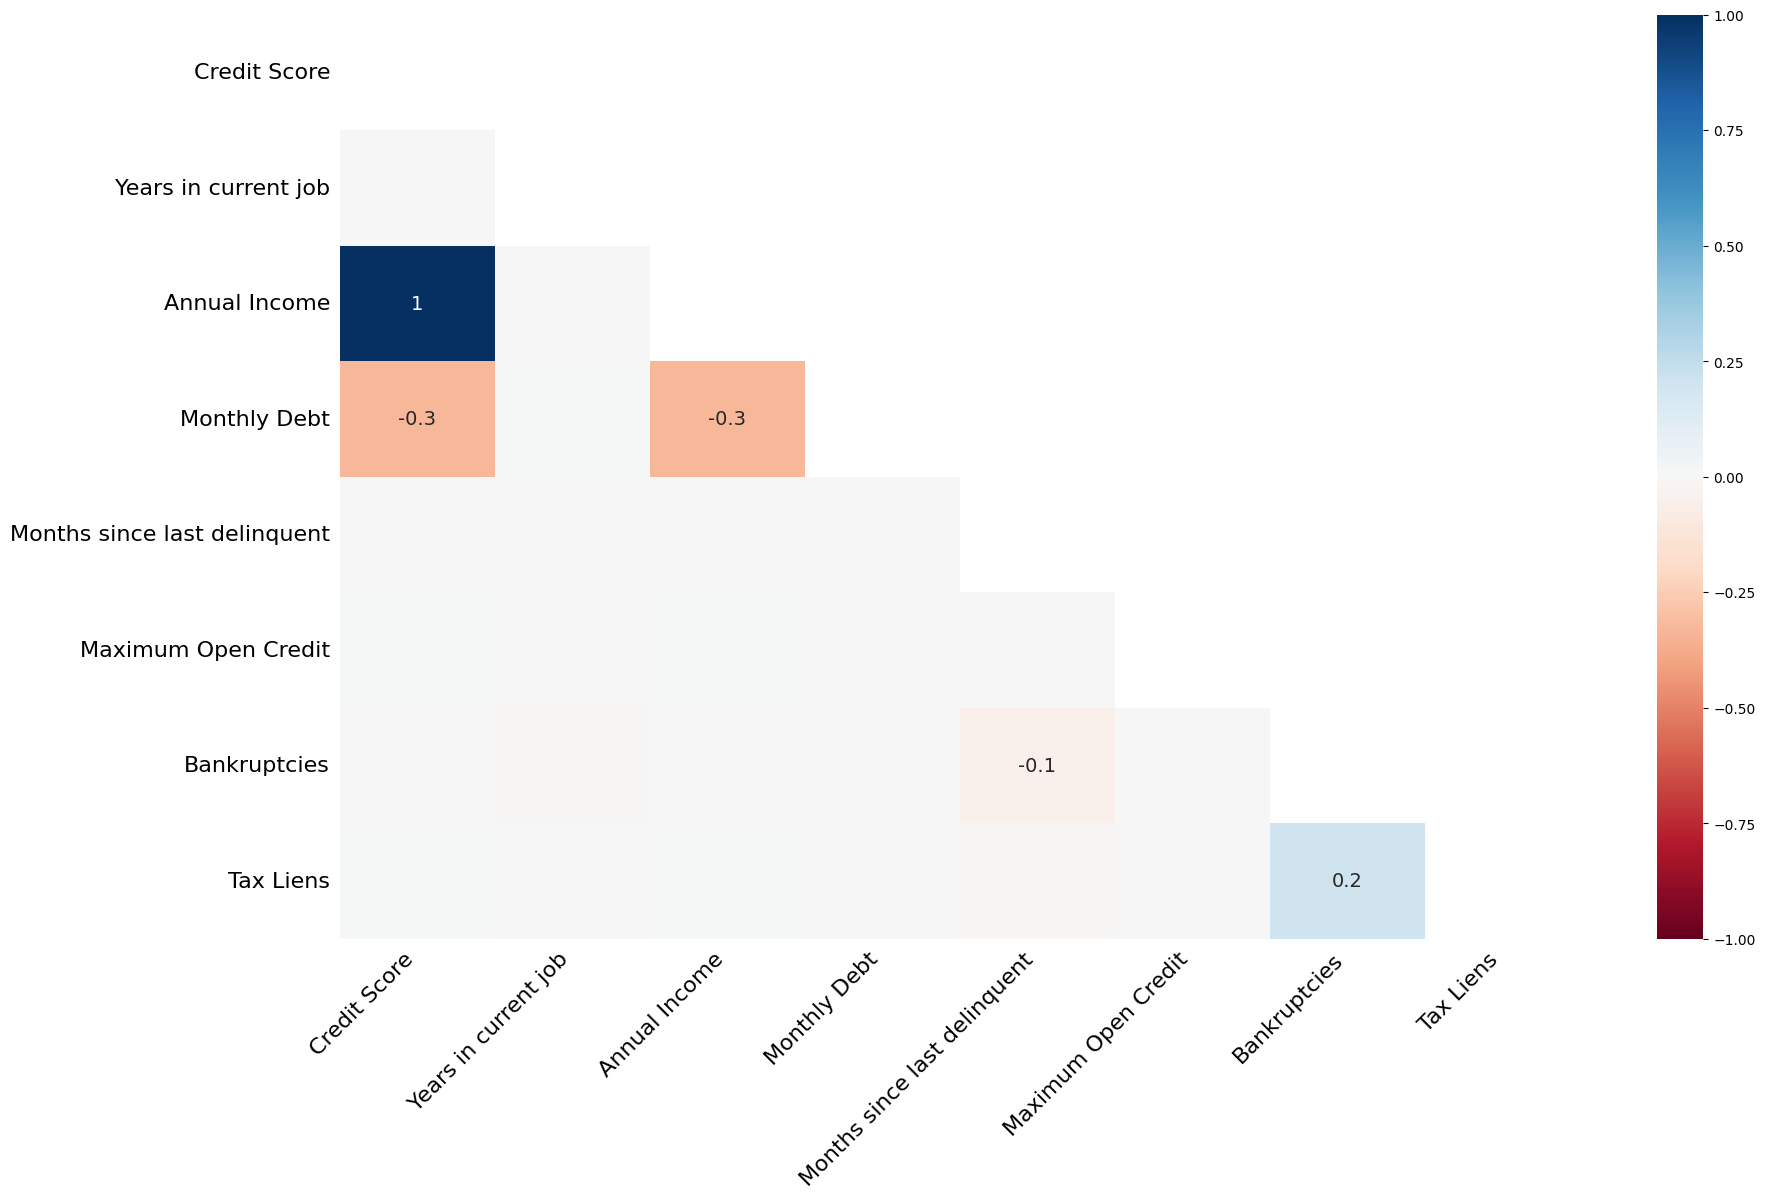

In [26]:
msno.heatmap(df_duplicates_removed)

<Axes: >

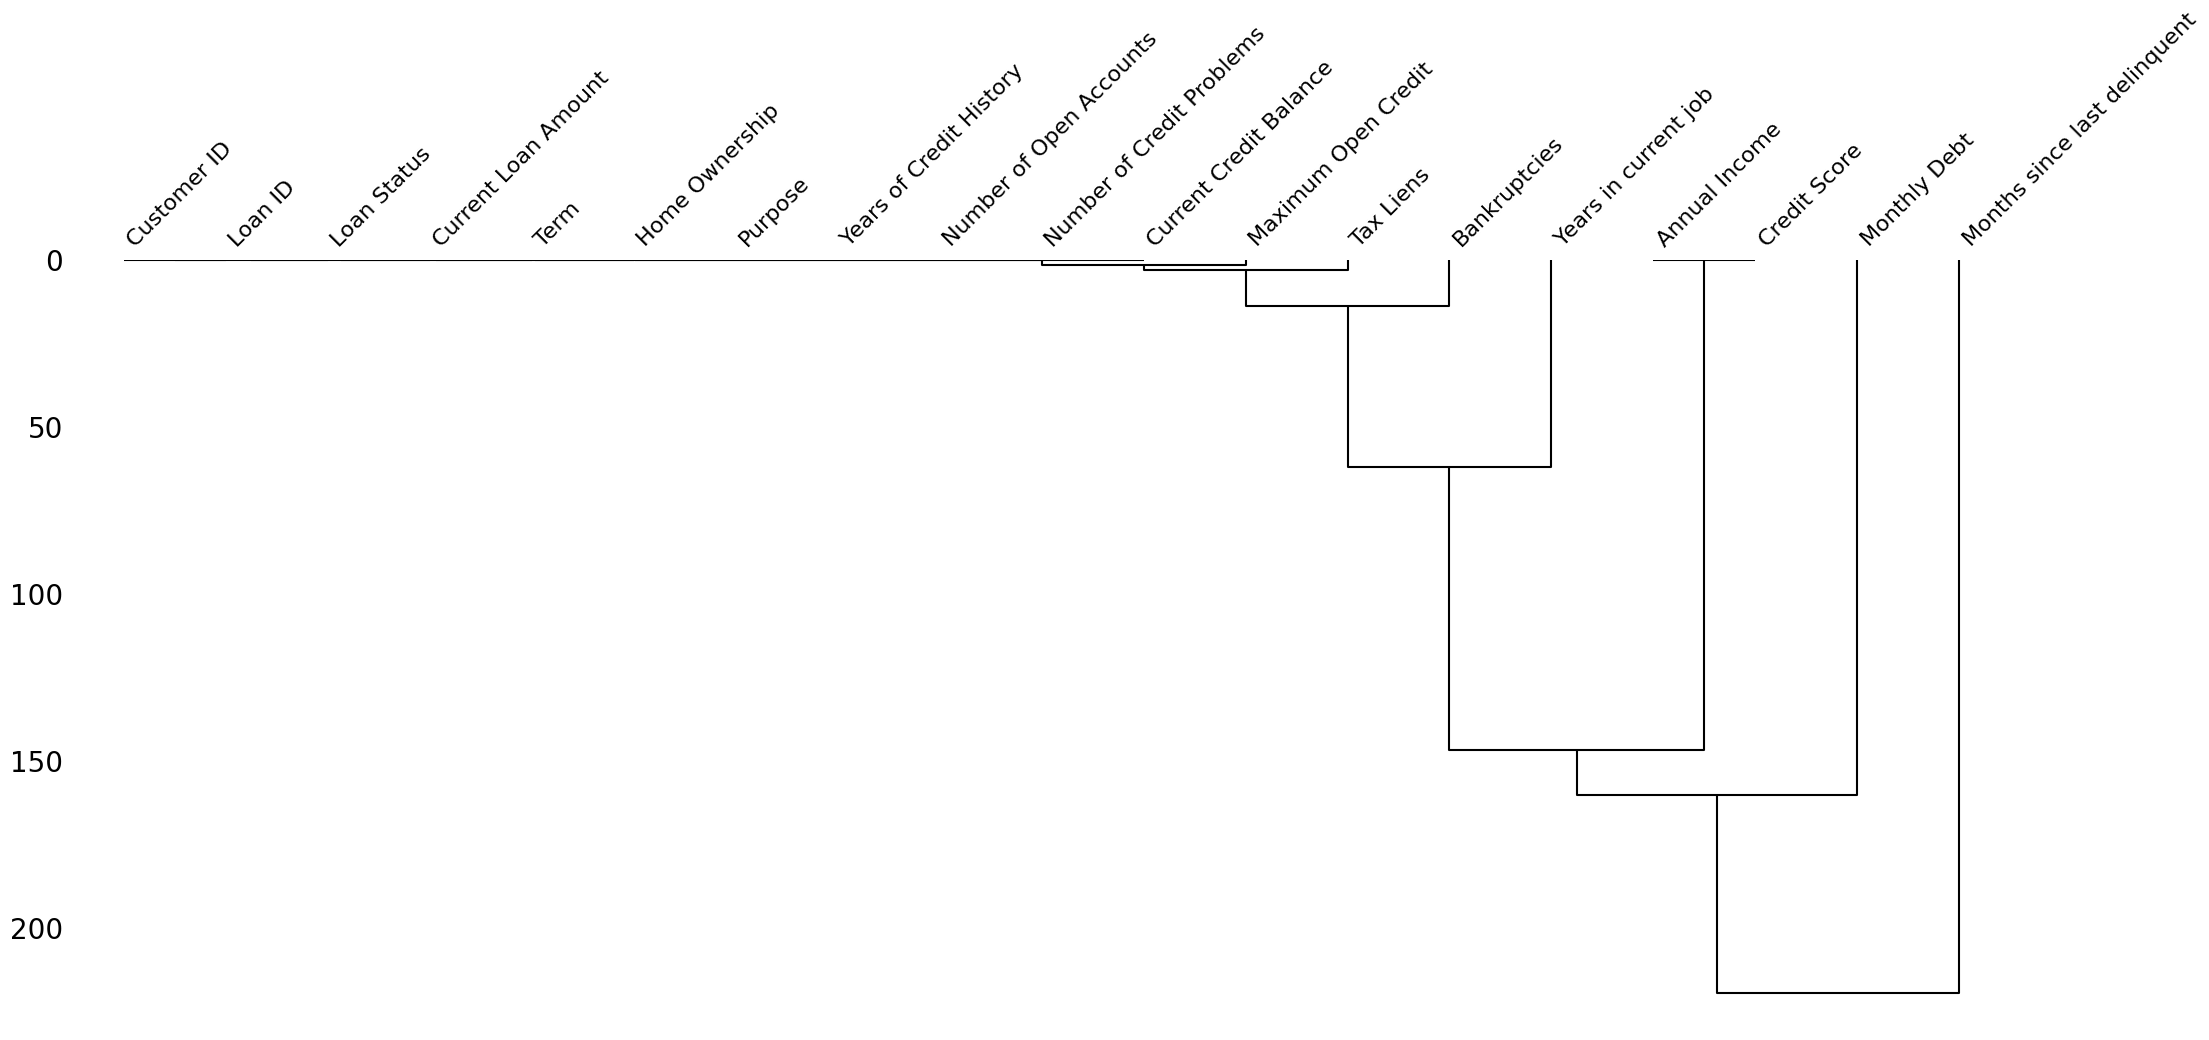

In [27]:
msno.dendrogram(df_duplicates_removed)

Insights:

- There are a total of 8 columns where we found records with missing values with the highest missing percent of 43% for the feature 'Months since last delinquency'.
- We have also found if records from the 'Annual Income' feature are missing then records from 'Credit Score' are also missing. They have a correlation value of 1 for nullity.
- Monthly Debt has a low negative correlation(-0.3) with Annual income and Credit Score. Meaning, that if Monthly debt is missing then the other features are present in the record.
- Rest of the features with null values have very low correlation or no correlation at all.

<h4>3.7 Exploratory Data Analysis(EDA)

<h5>3.7.1 Visualisation of Loan Status(Target Feature)

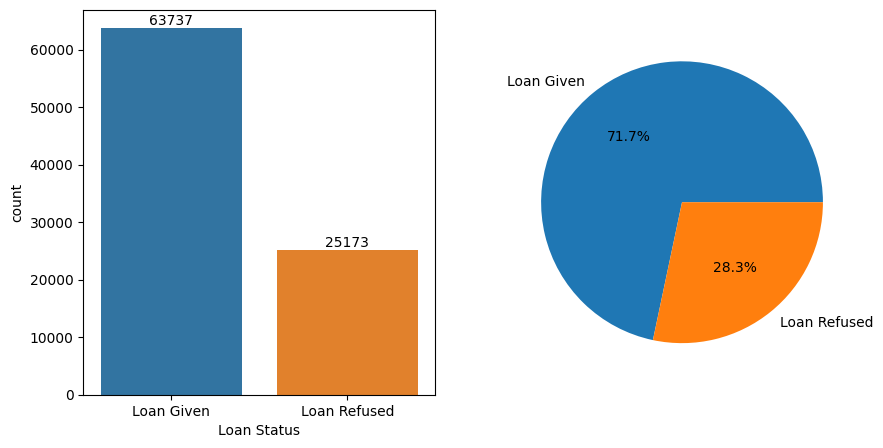

In [28]:
status = df_duplicates_removed['Loan Status'].value_counts()
f,ax = plt.subplots(1,2,figsize = (10,5))
sns.countplot(x=df_duplicates_removed['Loan Status'],ax=ax[0],data=df_duplicates_removed,order=df_duplicates_removed['Loan Status'].value_counts().index)
for container in ax[0].containers:
    ax[0].bar_label(container,color = 'black',size=10)
plt.pie(x=df_duplicates_removed['Loan Status'].value_counts(),labels=df_duplicates_removed['Loan Status'].value_counts().index,autopct='%1.1f%%')
plt.show()

No. of Loans Given is 2.5 times more than no. of Loan Refused. This makes the data bias as more number of records are present for Loan Given status.

<h5>3.7.2 Visualisation of Numerical Categories via Histplot

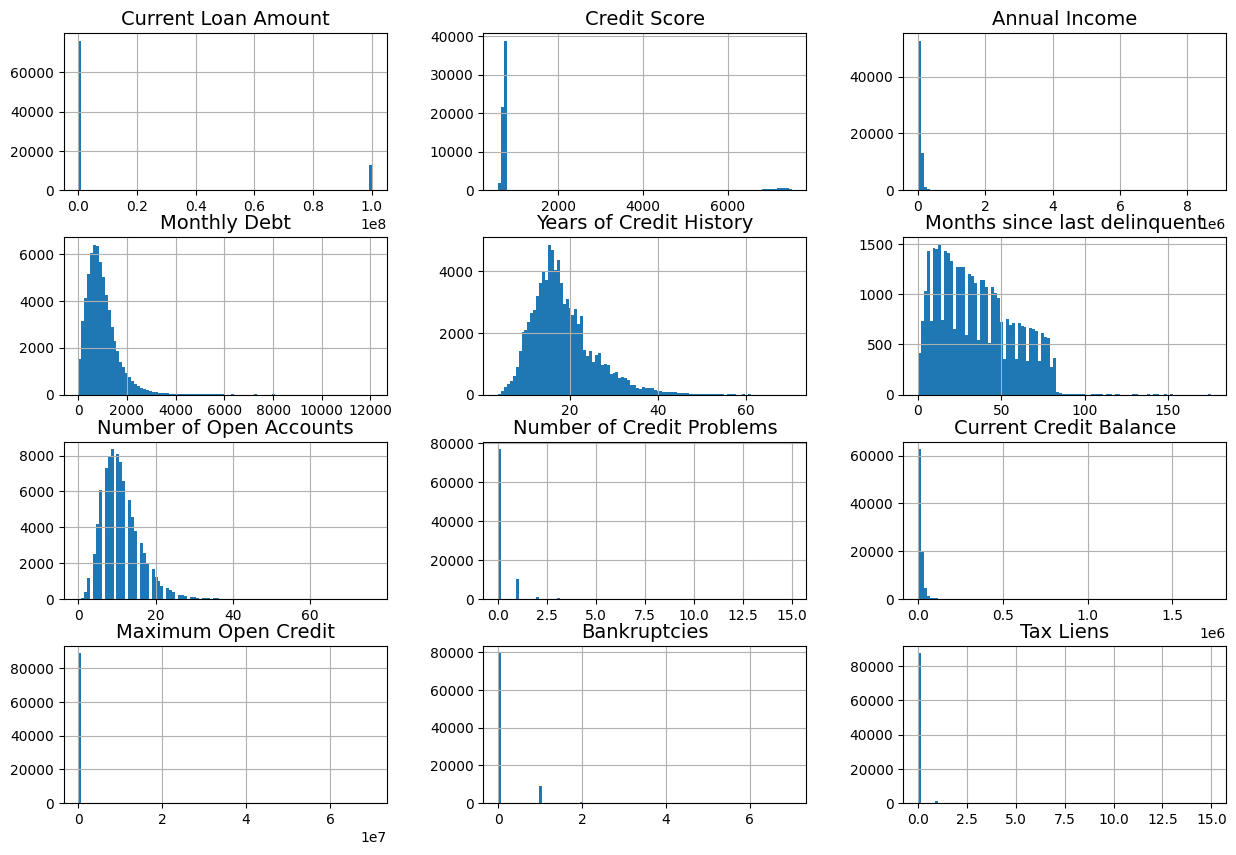

In [29]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df_duplicates_removed.hist(bins=100, figsize=(15, 10), )
plt.show()

There are lot of outliers in the dataset. We will first explore the data ignoring the outliers to understand how is the data dritributed.

<h5>3.7.3 Featurewise Exploration and Analysis

Loan ID and Customer ID are unique values representing customers. We will ignore these from EDA.

3.7.3.1 Current Loan Amount

- Name of the feature
- Type of the feature
- % of missing values
- Noisiness and type of noise(stochastic, outliers, rounding errors, etc)
- Type of distribution
- Transformation required
- Bivariate analysis with Target Feature?

In [30]:
def explore_num_feature(df,variable):
    # Name of the feature
    print(f'Name of the Feature is {variable}')

    # Type of the feature
    if df[variable].dtype == 'object':
        type = 'Categorical Feature'
    else:
        type = 'Numerical Feature'
        
    num_of_unique_values = df[variable].nunique()
    print(f'The number of unique values in {variable} is {num_of_unique_values}')
    
    # Ask for subtype
    if type == 'Categorical Feature':
        sub_type = input(f'The {variable} is {type}, please sub categorise the feature as Ordinal/Nominal: ')
    else:
        if num_of_unique_values <100:
            sub_type = 'Discrete'
        else:
            sub_type = 'Continuous'

    
    print(f'{variable} is {type} and {sub_type}')

    # Calculate Null Percentage

    null_percentage = df.isnull().sum() / df.shape[0] * 100
    null_percentage_variable = null_percentage[variable]
    print(f'Null %age of {variable} is {null_percentage_variable}%')

    #Finding Outliers

    Q1 = df[variable].quantile(0.25)
    Q3 = df[variable].quantile(0.75)
    IQR = Q3 - Q1
    print(f'IQR is {IQR}')
    outliers = df[variable][
    (df[variable] < (Q1 - 1.5 * IQR)) |
    (df[variable] > (Q3 + 1.5 * IQR))
    ]
    min_outlier_val = df[variable].min()
    min_outlier_count = df[variable].value_counts().get(min_outlier_val,0)
    
    max_outlier_val = df[variable].max()
    max_outlier_count = df[variable].value_counts().get(max_outlier_val,0) 
    
    quantile = df[variable].quantile([0.0,0.2,0.5,0.75,0.8,0.85,0.9,0.95,0.99,0.995,0.999,0.9999])
    skewness = stats.skew(df[variable])
    kurtosis = stats.kurtosis(df[variable])
    
    print('\n\nSUMMARY')
    print(f'\nName of the Feature is {variable}')
    print(f'{variable} is {type} and {sub_type}')
    print(f'Null %age of {variable} is {null_percentage_variable}%')
    print(f'The number of unique values in {variable} is {num_of_unique_values}')
    print(f'Total number of outliers in {variable} is {len(outliers)}')
    print(f'Minimum value of outliers in {variable} is {min_outlier_val}'
        f' and number of times its repeated is {min_outlier_count}')
    print(f'Maximum value of outliers in {variable} is {max_outlier_val}'
        f' and number of times its repeated is {max_outlier_count}')
    print(f'{variable} Skewness: {skewness}, Kurtosis: {kurtosis}')
    print(f'\nThe values at various quantiles are\n\n{quantile}')
    


In [31]:
explore_num_feature(df_duplicates_removed,'Current Loan Amount')

Name of the Feature is Current Loan Amount
The number of unique values in Current Loan Amount is 22081
Current Loan Amount is Numerical Feature and Continuous
Null %age of Current Loan Amount is 0.0%
IQR is 16202.0


SUMMARY

Name of the Feature is Current Loan Amount
Current Loan Amount is Numerical Feature and Continuous
Null %age of Current Loan Amount is 0.0%
The number of unique values in Current Loan Amount is 22081
Total number of outliers in Current Loan Amount is 12738
Minimum value of outliers in Current Loan Amount is 491 and number of times its repeated is 1
Maximum value of outliers in Current Loan Amount is 99999999 and number of times its repeated is 12738
Current Loan Amount Skewness: 2.0364500067989493, Kurtosis: 2.1471290159688436

The values at various quantiles are

0.0000         491.0
0.2000        7278.0
0.5000       14355.0
0.7500       24485.0
0.8000       29316.0
0.8500       35487.0
0.9000    99999999.0
0.9500    99999999.0
0.9900    99999999.0
0.9950    9999

It seems there is are outliers in the current loan amount which is making the plot very skewed.

In [32]:
filtered_outliers_CLA = df_duplicates_removed[df_duplicates_removed["Current Loan Amount"] < 99999998]

In [33]:
def explore_num_feature_distribution(df,variable):
    
    # Create a figure and a grid of subplots
    fig, axs = plt.subplots(4, 1, figsize=(5, 10))

    # Visualize histogram
    sns.histplot(data=df, x=variable, kde=False, color='skyblue', bins=30, ax=axs[0])
    axs[0].set_title(f'Histogram of {variable}')
    axs[0].set_xlabel(f'{variable}')
    axs[0].set_ylabel('Frequency')

    # Plot KDE plot
    sns.kdeplot(data=df, x=variable, color='skyblue', fill=True, ax=axs[1])
    axs[1].set_title(f'KDE Plot of Feature {variable}')
    axs[1].set_xlabel(f'{variable}')
    axs[1].set_ylabel('Density')

    # Visualize boxplot
    sns.boxplot(data=df,x=df[variable], ax=axs[2])
    axs[2].set_title(f'Boxplot of {variable}')

    #Visualise Q-Q Plot
    stats.probplot(df[variable], dist="norm", plot=plt)
    axs[3].set_title(f'Q-Q Plot of {variable}')


    plt.tight_layout()  # Adjust spacing between subplots
    plt.show()

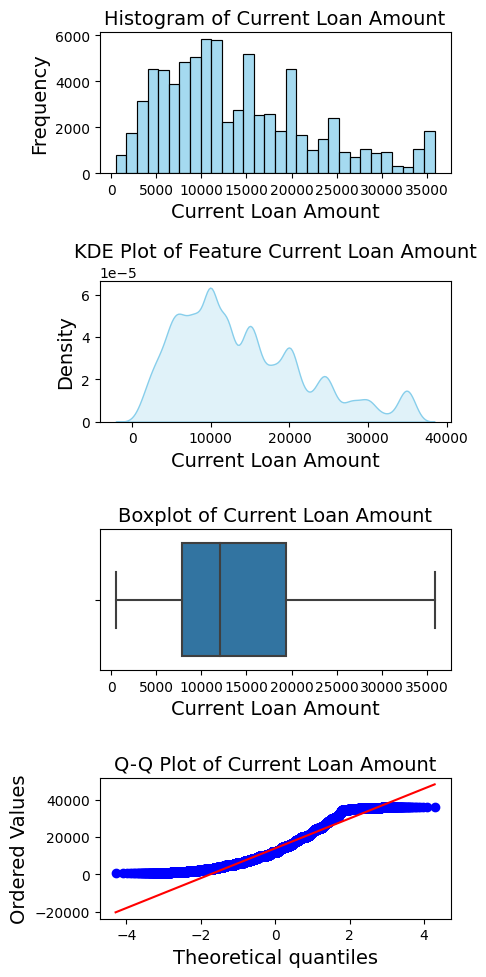

In [34]:
explore_num_feature_distribution(filtered_outliers_CLA,'Current Loan Amount')

We can see the feature is right skewed even after outliers are filterd. We Saw the outliers was 9999999. Arond 10% of the records have the value. We will replace it with random values so as not to disturb with distribution.

Even after replacing 99999999 we might have to remove outliers.

In [35]:
def bivariate_analysis_num_cat(df, num_feature, cat_feature):
    # Create a figure and a grid of subplots
    fig, axs = plt.subplots(3, 1, figsize=(5, 10))  # Increase height to avoid overlapping

    # Visualize histogram
    sns.histplot(data=df, x=num_feature, hue=cat_feature, kde=True, color='skyblue', bins=30, ax=axs[0])
    axs[0].set_title(f'Histogram of {num_feature}')
    axs[0].set_xlabel(f'{num_feature}')
    axs[0].set_ylabel('Frequency')

    # Visualize violinplot
    sns.violinplot(data=df, x=cat_feature, y=num_feature, inner='quartile', color='white', ax=axs[1])
    axs[1].set_title(f'Violinplot of {num_feature}')
    axs[1].set_xlabel(f'{cat_feature}')
    axs[1].set_ylabel(f'{num_feature}')

    # Visualize boxplot
    sns.boxplot(data=df, x=cat_feature, y=num_feature, ax=axs[2])  
    axs[2].set_title(f'Box Plot of {num_feature} vs {cat_feature}')
    

    plt.tight_layout()  # Adjust spacing between subplots
    plt.show()


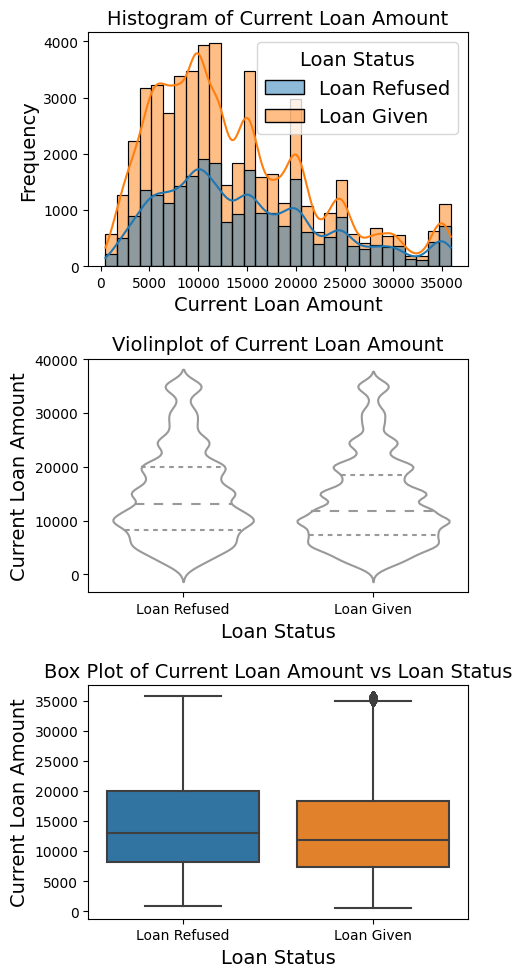

In [36]:
bivariate_analysis_num_cat(filtered_outliers_CLA,'Current Loan Amount','Loan Status')

Insights: We can see that of getting loan approval chances are higher if the Current Loan Amount is in IQR.

3.7.3.2 Term

- Name of the feature
- Type of the feature
- % of missing values
- Noisiness and type of noise(stochastic, outliers, rounding errors, etc)
- Type of distribution
- Transformation required
- Bivariate analysis with Target Feature?

In [37]:
def explore_cat_feature(df,variable):
    # Name of the feature
    print(f'Name of the Feature is {variable}')

    # Type of the feature
    if df[variable].dtype == 'object':
        type = 'Categorical Feature'
    else:
        type = 'Numerical Feature'
        
    num_of_unique_values = df[variable].nunique()
    print(f'The number of unique values in {variable} is {num_of_unique_values}')
    
    # Ask for subtype
    if type == 'Categorical Feature':
        sub_type = input(f'The {variable} is {type}, please sub categorise the feature as Ordinal/Nominal: ')
    else:
        sub_type = input(f'The {variable} is {type}, please sub categorise the feature as Continuous/Discrete: ')
    
    print(f'{variable} is {type} and {sub_type}')

    # Calculate Null Percentage

    null_percentage = df.isnull().sum() / df.shape[0] * 100
    null_percentage_variable = null_percentage[variable]
    print(f'Null %age of {variable} is {null_percentage_variable}%')

    #Finding Unique Records
    unique_records = df[variable].unique()
    
    print('\n\nSUMMARY')
    print(f'\nName of the Feature is {variable}')
    print(f'{variable} is {type} and {sub_type}')
    print(f'Null %age of {variable} is {null_percentage_variable}%')
    print(f'The number of unique values in {variable} is {num_of_unique_values}')
    print(f'The unique records are {unique_records}')

In [38]:
def explore_cat_feature_distribution(df,variable):
    f,ax = plt.subplots(1,2,figsize = (10,6))
    sns.countplot(x= df[variable],data = df,palette = 'bright',ax=ax[0],saturation=0.95,order = df[variable].value_counts().index)
    ax[0].tick_params(axis='x', rotation=45)
    for container in ax[0].containers:
        ax[0].bar_label(container,color = 'black',size=8)

    plt.pie(x=df[variable].value_counts(),labels=df[variable].value_counts().index,autopct='%1.1f%%',shadow=True,textprops={'fontsize': 8})
    plt.show()

In [39]:
def bivariate_analysis_cat_cat(df,target_cat_feature,cat_feature_1):
    crosstabs_values = pd.crosstab(df[target_cat_feature], df_duplicates_removed[cat_feature_1])
    crosstabs_percentage = crosstabs_values.div(crosstabs_values.sum(axis=0), axis=1) * 100
    
    print("\nFrequency cross-tabulation:")
    print(crosstabs_values)

    print("\nPercentage cross-tabulation:")
    print(crosstabs_percentage)

    print('\n\nChi-Squared Test of Independence')
    from scipy.stats import chi2_contingency

    # Create a contingency table (cross-tabulation) between two categorical variables
    contingency_table = crosstabs_values

    # Perform the Chi-Square Test
    chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

    # Print the results
    print("Chi-Square Statistic:", chi2_stat)
    print("P-value:", p_val)
    print("Degrees of Freedom:", dof)
    print("Expected Frequencies:\n", expected)



In [40]:
explore_cat_feature(df_duplicates_removed,'Term')

Name of the Feature is Term
The number of unique values in Term is 2
Term is Categorical Feature and Nominal
Null %age of Term is 0.0%


SUMMARY

Name of the Feature is Term
Term is Categorical Feature and Nominal
Null %age of Term is 0.0%
The number of unique values in Term is 2
The unique records are ['Short Term' 'Long Term']


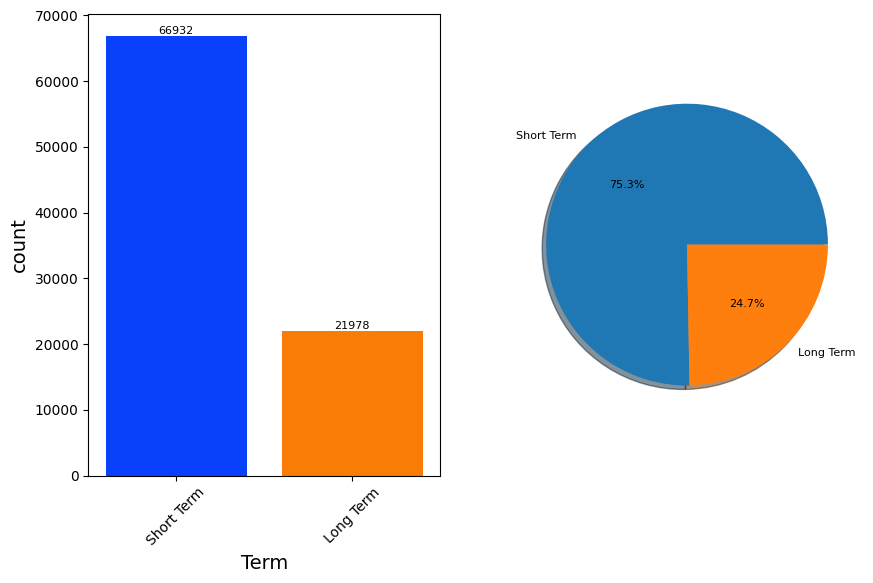

In [41]:
explore_cat_feature_distribution(df_duplicates_removed,'Term')

In [42]:
bivariate_analysis_cat_cat(df_duplicates_removed,'Loan Status','Term')


Frequency cross-tabulation:
Term          Long Term  Short Term
Loan Status                        
Loan Given        12714       51023
Loan Refused       9264       15909

Percentage cross-tabulation:
Term          Long Term  Short Term
Loan Status                        
Loan Given    57.848758     76.2311
Loan Refused  42.151242     23.7689


Chi-Squared Test of Independence
Chi-Square Statistic: 2753.6255493272265
P-value: 0.0
Degrees of Freedom: 1
Expected Frequencies:
 [[15755.39068721 47981.60931279]
 [ 6222.60931279 18950.39068721]]


Insights: There is strong association between Term and Loan Status based on Chi Squared test of Indepencence

3.7.3.3 Credit Score

- Name of the feature
- Type of the feature
- % of missing values
- Noisiness and type of noise(stochastic, outliers, rounding errors, etc)
- Type of distribution
- Transformation required
- Bivariate analysis with Target Feature?

In [43]:
explore_num_feature(df_duplicates_removed,'Credit Score')

Name of the Feature is Credit Score
The number of unique values in Credit Score is 326
Credit Score is Numerical Feature and Continuous
Null %age of Credit Score is 23.999550106849625%
IQR is 30.0


SUMMARY

Name of the Feature is Credit Score
Credit Score is Numerical Feature and Continuous
Null %age of Credit Score is 23.999550106849625%
The number of unique values in Credit Score is 326
Total number of outliers in Credit Score is 8477
Minimum value of outliers in Credit Score is 585.0 and number of times its repeated is 8
Maximum value of outliers in Credit Score is 7510.0 and number of times its repeated is 10
Credit Score Skewness: nan, Kurtosis: nan

The values at various quantiles are

0.0000     585.0
0.2000     707.0
0.5000     733.0
0.7500     744.0
0.8000     746.0
0.8500     747.0
0.9000     750.0
0.9500    7040.0
0.9900    7400.0
0.9950    7440.0
0.9990    7480.0
0.9999    7510.0
Name: Credit Score, dtype: float64


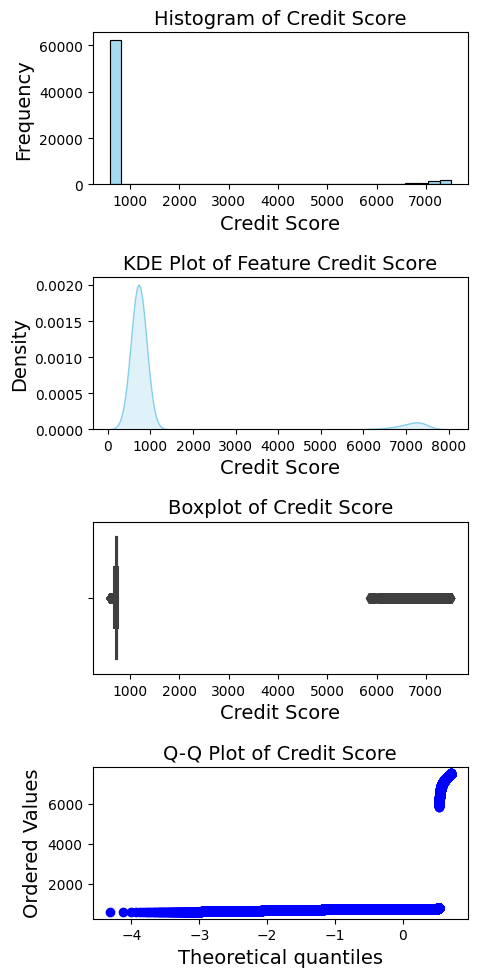

In [44]:
explore_num_feature_distribution(df_duplicates_removed,'Credit Score')

It seems there are outliers and null values in Credit Score which is making the data Skewed. We will filter out the outliers and null values and then plot

In [45]:
# Filter outliers and null values
filtered_data_CS = df_duplicates_removed[(df_duplicates_removed["Credit Score"] < 901) & (df_duplicates_removed["Credit Score"].notnull())]


In [46]:
explore_num_feature(filtered_data_CS,'Credit Score')

Name of the Feature is Credit Score
The number of unique values in Credit Score is 167
Credit Score is Numerical Feature and Continuous
Null %age of Credit Score is 0.0%
IQR is 30.0


SUMMARY

Name of the Feature is Credit Score
Credit Score is Numerical Feature and Continuous
Null %age of Credit Score is 0.0%
The number of unique values in Credit Score is 167
Total number of outliers in Credit Score is 3181
Minimum value of outliers in Credit Score is 585.0 and number of times its repeated is 8
Maximum value of outliers in Credit Score is 751.0 and number of times its repeated is 797
Credit Score Skewness: -1.6861175818147731, Kurtosis: 3.1799587319579388

The values at various quantiles are

0.0000    585.0
0.2000    705.0
0.5000    731.0
0.7500    742.0
0.8000    743.0
0.8500    745.0
0.9000    747.0
0.9500    748.0
0.9900    751.0
0.9950    751.0
0.9990    751.0
0.9999    751.0
Name: Credit Score, dtype: float64


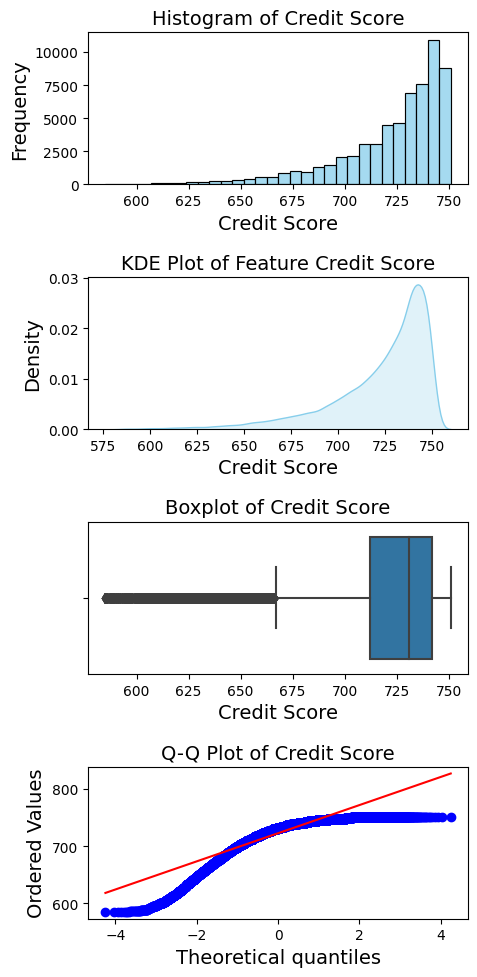

In [47]:
explore_num_feature_distribution(filtered_data_CS,'Credit Score')

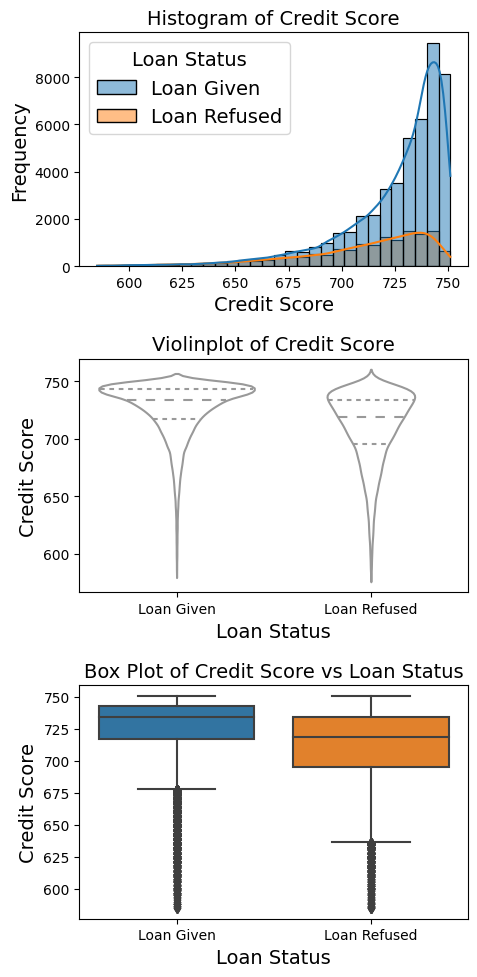

In [48]:
bivariate_analysis_num_cat(filtered_data_CS,'Credit Score','Loan Status')

Insights: The Credit Score is distributed exponentialy and is negatively skewed. We also see median credit score for loan given is higher than that of Loan Refused. From violin plot we can see as the credit score increased the chanches of getting a loan is much higher than rejection of loan. 

3.7.3.4 Years in current job

- Name of the feature
- Type of the feature
- % of missing values
- Noisiness and type of noise(stochastic, outliers, rounding errors, etc)
- Type of distribution
- Transformation required
- Bivariate analysis with Target Feature?

In [49]:
explore_cat_feature(df_duplicates_removed,'Years in current job')

Name of the Feature is Years in current job
The number of unique values in Years in current job is 11
Years in current job is Categorical Feature and Nominal
Null %age of Years in current job is 4.293105387470476%


SUMMARY

Name of the Feature is Years in current job
Years in current job is Categorical Feature and Nominal
Null %age of Years in current job is 4.293105387470476%
The number of unique values in Years in current job is 11
The unique records are ['< 1 year' '10+ years' '9 years' '3 years' '2 years' '7 years' '6 years'
 '1 year' '5 years' '4 years' '8 years' nan]


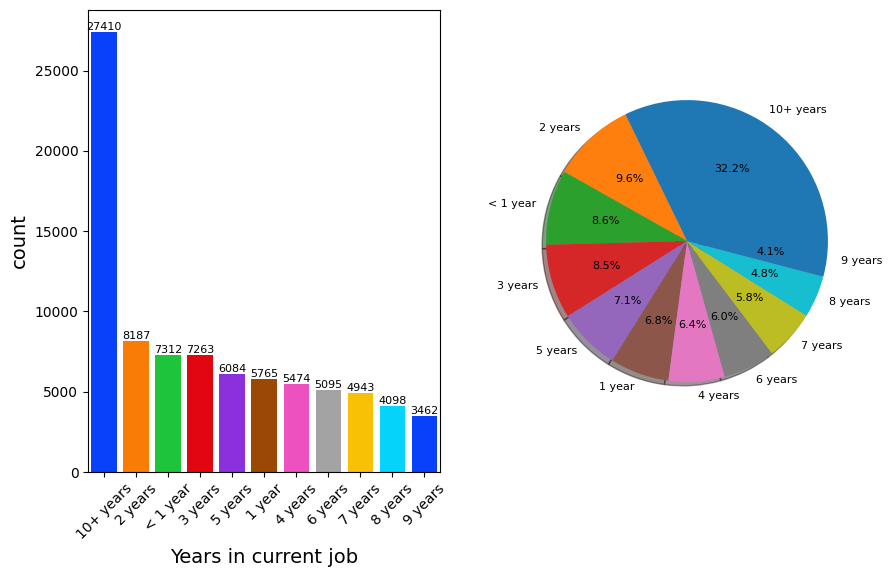

In [50]:
explore_cat_feature_distribution(df_duplicates_removed,'Years in current job')

In [51]:
#null value filteration
filtered_data_YICJ = df_duplicates_removed[df_duplicates_removed['Years in current job'].isnull()==False]

In [52]:
bivariate_analysis_cat_cat(filtered_data_YICJ,'Loan Status','Years in current job')


Frequency cross-tabulation:
Years in current job  1 year  10+ years  2 years  3 years  4 years  5 years  \
Loan Status                                                                   
Loan Given              4098      19966     5967     5297     3926     4378   
Loan Refused            1667       7444     2220     1966     1548     1706   

Years in current job  6 years  7 years  8 years  9 years  < 1 year  
Loan Status                                                         
Loan Given               3630     3508     2920     2428      5210  
Loan Refused             1465     1435     1178     1034      2102  

Percentage cross-tabulation:
Years in current job     1 year  10+ years   2 years    3 years    4 years  \
Loan Status                                                                  
Loan Given            71.084128  72.842028  72.88384  72.931296  71.720862   
Loan Refused          28.915872  27.157972  27.11616  27.068704  28.279138   

Years in current job    5 years   6

There is some association betweeen Years in current job and Loan Status.
Null values can be replaced with values arrived from grouping Years in credit history and finding mode of Years in current job.  

3.7.3.5 Home Ownership

- Name of the feature
- Type of the feature
- % of missing values
- Noisiness and type of noise(stochastic, outliers, rounding errors, etc)
- Type of distribution
- Transformation required
- Bivariate analysis with Target Feature?

In [53]:
explore_cat_feature(df_duplicates_removed,'Home Ownership')

Name of the Feature is Home Ownership
The number of unique values in Home Ownership is 4
Home Ownership is Categorical Feature and Nominal
Null %age of Home Ownership is 0.0%


SUMMARY

Name of the Feature is Home Ownership
Home Ownership is Categorical Feature and Nominal
Null %age of Home Ownership is 0.0%
The number of unique values in Home Ownership is 4
The unique records are ['Rent' 'Home Mortgage' 'Own Home' 'HaveMortgage']


We can see there are two different classes for Home Mortgage and Have Mortgate. We need to apply transformation for these cases in next step.

In [54]:
filtered_data_HO = df_duplicates_removed[df_duplicates_removed['Home Ownership']!='HaveMortgage']

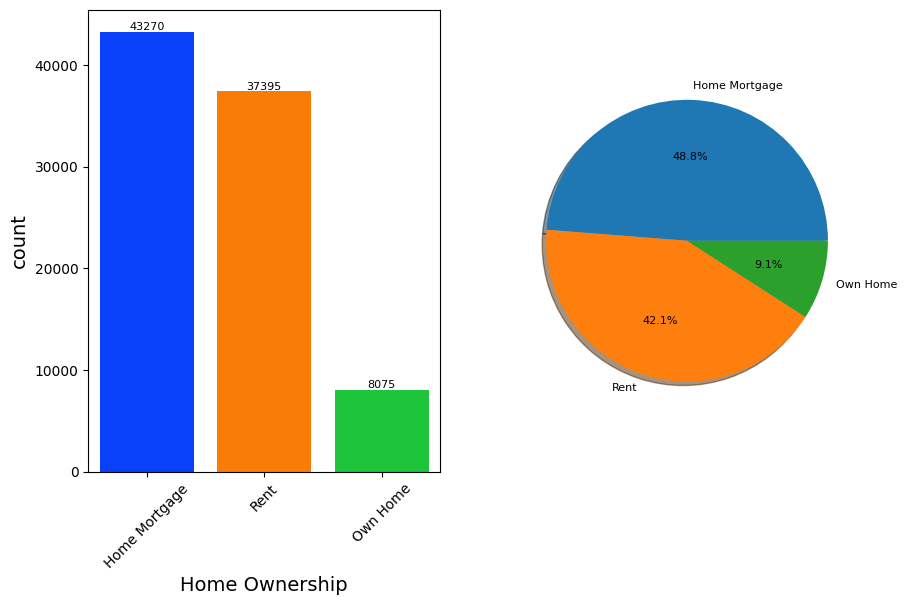

In [55]:
explore_cat_feature_distribution(filtered_data_HO,'Home Ownership')

In [56]:
bivariate_analysis_cat_cat(filtered_data_HO,'Loan Status','Home Ownership')


Frequency cross-tabulation:
Home Ownership  Home Mortgage  Own Home   Rent
Loan Status                                   
Loan Given              32237      5738  25626
Loan Refused            11033      2337  11769

Percentage cross-tabulation:
Home Ownership  Home Mortgage   Own Home       Rent
Loan Status                                        
Loan Given          74.501964  71.058824  68.527878
Loan Refused        25.498036  28.941176  31.472122


Chi-Squared Test of Independence
Chi-Square Statistic: 354.24294754060713
P-value: 1.1943216773934797e-77
Degrees of Freedom: 2
Expected Frequencies:
 [[31012.11708362  5787.44731801 26801.43559838]
 [12257.88291638  2287.55268199 10593.56440162]]


There is some association between Loan Status and Home Ownership. 
We need to change the value of HaveMortgage to Home Mortgage in the next step.

3.7.3.6 Annual Income

- Name of the feature
- Type of the feature
- % of missing values
- Noisiness and type of noise(stochastic, outliers, rounding errors, etc)
- Type of distribution
- Transformation required
- Bivariate analysis with Target Feature?

In [57]:
explore_num_feature(df_duplicates_removed,'Annual Income')

Name of the Feature is Annual Income
The number of unique values in Annual Income is 36344
Annual Income is Numerical Feature and Continuous
Null %age of Annual Income is 23.999550106849625%
IQR is 42164.25


SUMMARY

Name of the Feature is Annual Income
Annual Income is Numerical Feature and Continuous
Null %age of Annual Income is 23.999550106849625%
The number of unique values in Annual Income is 36344
Total number of outliers in Annual Income is 3175
Minimum value of outliers in Annual Income is 4033.0 and number of times its repeated is 1
Maximum value of outliers in Annual Income is 8713547.0 and number of times its repeated is 1
Annual Income Skewness: nan, Kurtosis: nan

The values at various quantiles are

0.0000       4033.000
0.2000      40764.000
0.5000      61494.000
0.7500      86750.250
0.8000      94600.800
0.8500     103814.000
0.9000     119916.000
0.9500     147645.000
0.9900     239286.960
0.9950     296831.020
0.9990     491575.770
0.9999    1044848.308
Name: Annua

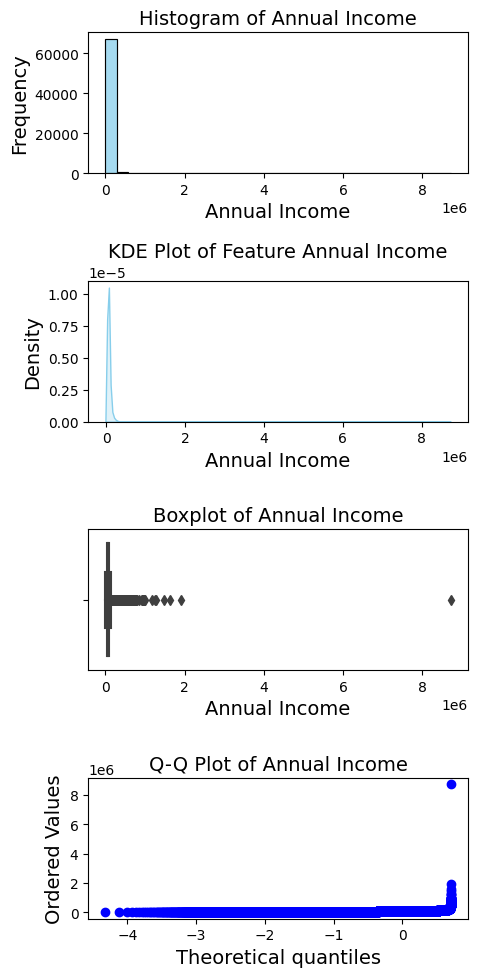

In [58]:
explore_num_feature_distribution(df_duplicates_removed,"Annual Income")

In [59]:
#filtering null values and outliers

filtered_data_AI = df_duplicates_removed[(df_duplicates_removed["Annual Income"] < 296832) & (df_duplicates_removed["Annual Income"].notnull())]


In [60]:
explore_num_feature(filtered_data_AI,'Annual Income')

Name of the Feature is Annual Income
The number of unique values in Annual Income is 36012
Annual Income is Numerical Feature and Continuous
Null %age of Annual Income is 0.0%
IQR is 41710.0


SUMMARY

Name of the Feature is Annual Income
Annual Income is Numerical Feature and Continuous
Null %age of Annual Income is 0.0%
The number of unique values in Annual Income is 36012
Total number of outliers in Annual Income is 2932
Minimum value of outliers in Annual Income is 4033.0 and number of times its repeated is 1
Maximum value of outliers in Annual Income is 296820.0 and number of times its repeated is 1
Annual Income Skewness: 1.705486454805211, Kurtosis: 4.4354721890959965

The values at various quantiles are

0.0000      4033.000
0.2000     40700.000
0.5000     61380.000
0.7500     86224.000
0.8000     93881.000
0.8500    102581.200
0.9000    118460.400
0.9500    143479.000
0.9900    206515.530
0.9950    239387.500
0.9990    279250.185
0.9999    295282.428
Name: Annual Income, dtype

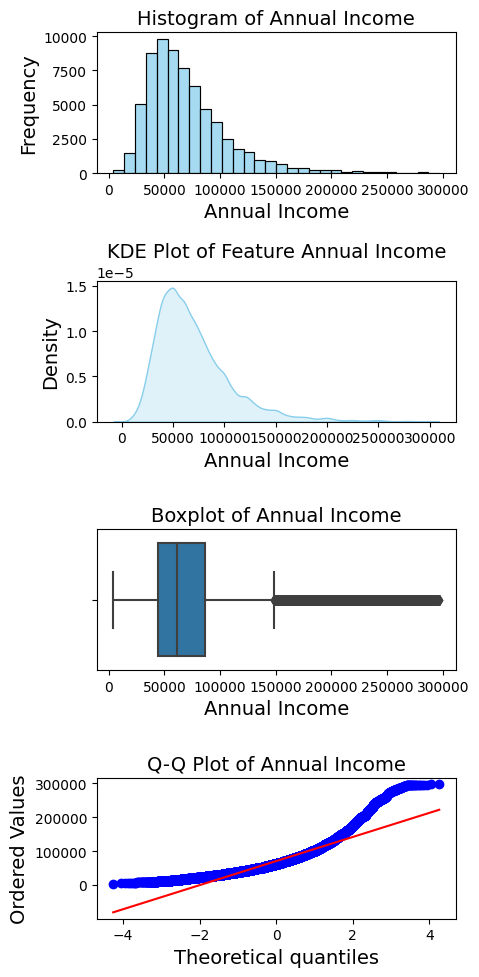

In [61]:
explore_num_feature_distribution(filtered_data_AI,'Annual Income')

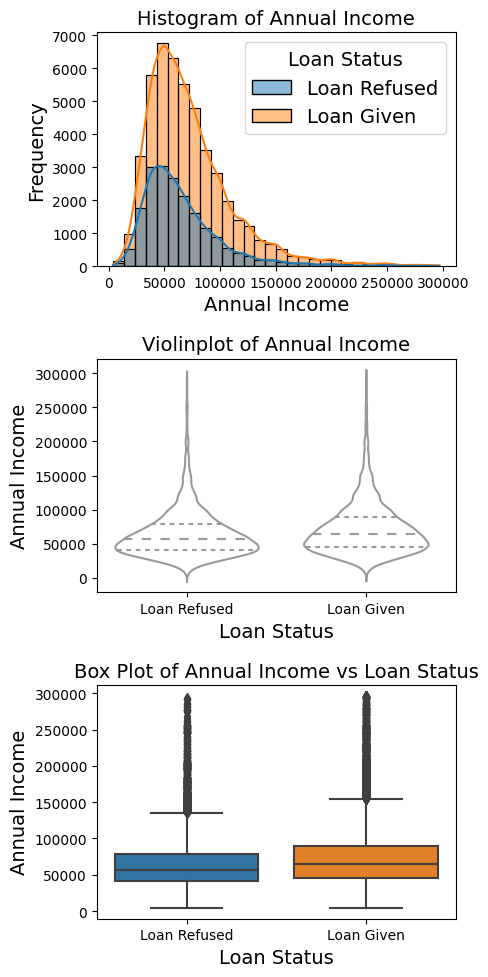

In [62]:
bivariate_analysis_num_cat(filtered_data_AI,'Annual Income','Loan Status')

We can see the Annual Income ranges from 4000 to 1040000. We have very high outlier values after 99.5 percentile. We have filtered out these values and null values to see how Annual Income is distributed.
It can be seen Annual Income is Positively skewed. Transformation will be required in next step.

Insights: Median Annual Income of loan refusal is slightly less than that of loan given. But the density of loan refusal(no. of loan refusal) at median is much higher than that of loan given. Meaning chances of loan getting refused if you have median Annual Income is high.

3.7.3.7 Purpose

- Name of the feature
- Type of the feature
- % of missing values
- Noisiness and type of noise(stochastic, outliers, rounding errors, etc)
- Type of distribution
- Transformation required
- Bivariate analysis with Target Feature?

In [63]:
explore_cat_feature(df_duplicates_removed,'Purpose')

Name of the Feature is Purpose
The number of unique values in Purpose is 16
Purpose is Categorical Feature and Nominal
Null %age of Purpose is 0.0%


SUMMARY

Name of the Feature is Purpose
Purpose is Categorical Feature and Nominal
Null %age of Purpose is 0.0%
The number of unique values in Purpose is 16
The unique records are ['Debt Consolidation' 'Home Improvements' 'other' 'Business Loan'
 'small_business' 'Other' 'moving' 'Buy a Car' 'Medical Bills' 'Buy House'
 'Take a Trip' 'vacation' 'major_purchase' 'Educational Expenses'
 'wedding' 'renewable_energy']


We can observe that for Other there are 2 classes. weill replace other with Other for uniformity

In [64]:
filtered_data_purpose = df_duplicates_removed[df_duplicates_removed['Purpose']!= 'other']

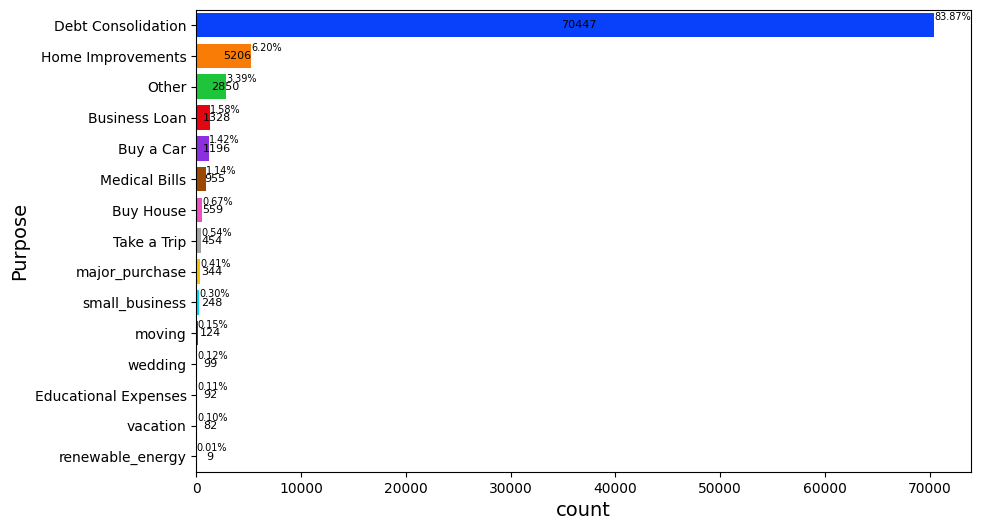

In [65]:

plt.figure(figsize=(10, 6))

ax = sns.countplot(y='Purpose', data=filtered_data_purpose, palette='bright', saturation=0.95, order=filtered_data_purpose['Purpose'].value_counts().index)
ax.tick_params(axis='y', rotation=0)

for container in ax.containers:
    ax.bar_label(container, color='black', label_type='center', fontsize=8, padding=10)

total = float(len(filtered_data_purpose))

for p in ax.patches:
    width = p.get_width()
    ax.text(width + 6, p.get_y() + p.get_height() / 6., '{:.2f}%'.format((width / total) * 100), va="center",size=7)

plt.show()


In [66]:
bivariate_analysis_cat_cat(filtered_data_purpose,'Loan Status','Purpose')


Frequency cross-tabulation:
Purpose       Business Loan  Buy House  Buy a Car  Debt Consolidation  \
Loan Status                                                             
Loan Given              795        400        962               50529   
Loan Refused            533        159        234               19918   

Purpose       Educational Expenses  Home Improvements  Medical Bills  Other  \
Loan Status                                                                   
Loan Given                      71               3910            644   2183   
Loan Refused                    21               1296            311    667   

Purpose       Take a Trip  major_purchase  moving  renewable_energy  \
Loan Status                                                           
Loan Given            331             245      75                 5   
Loan Refused          123              99      49                 4   

Purpose       small_business  vacation  wedding  
Loan Status               

We need to combine 2 others in a single unit. This needs to done in next step

Insights : Purpose have strong association with Loan Status.
For 9 out 12 purpose approximate loan given %age is 70%. To buy a car the approval rate is much higher(80%) than any other category.

3.7.3.8 Monthly Debt

- Name of the feature
- Type of the feature
- % of missing values
- Noisiness and type of noise(stochastic, outliers, rounding errors, etc)
- Type of distribution
- Transformation required
- Bivariate analysis with Target Feature?

In [67]:
explore_num_feature(df_duplicates_removed,'Monthly Debt')

Name of the Feature is Monthly Debt
The number of unique values in Monthly Debt is 54709
Monthly Debt is Numerical Feature and Continuous
Null %age of Monthly Debt is 26.289506242267464%
IQR is 719.0925


SUMMARY

Name of the Feature is Monthly Debt
Monthly Debt is Numerical Feature and Continuous
Null %age of Monthly Debt is 26.289506242267464%
The number of unique values in Monthly Debt is 54709
Total number of outliers in Monthly Debt is 2217
Minimum value of outliers in Monthly Debt is 0.0 and number of times its repeated is 55
Maximum value of outliers in Monthly Debt is 12055.68 and number of times its repeated is 1
Monthly Debt Skewness: nan, Kurtosis: nan

The values at various quantiles are

0.0000       0.00000
0.2000     464.21000
0.5000     843.77000
0.7500    1251.34250
0.8000    1371.55000
0.8500    1523.14750
0.9000    1740.35000
0.9500    2112.21000
0.9900    3084.08600
0.9950    3534.05700
0.9990    4927.21625
0.9999    7719.18760
Name: Monthly Debt, dtype: float64


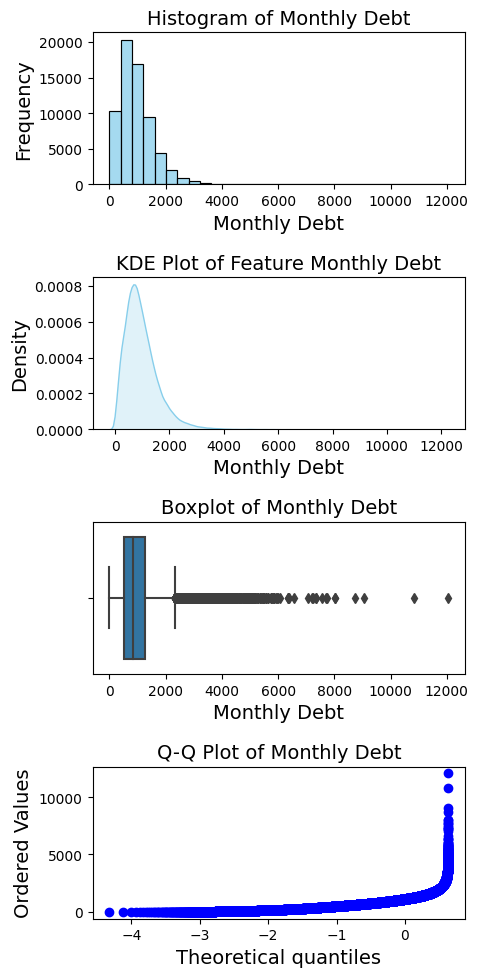

In [68]:
explore_num_feature_distribution(df_duplicates_removed,'Monthly Debt')

In [69]:
#Filtering Null Values and Outliers
filtered_data_MD = df_duplicates_removed[(df_duplicates_removed["Monthly Debt"] < 3535) & (df_duplicates_removed["Monthly Debt"].notnull())]


In [70]:
explore_num_feature(filtered_data_MD,'Monthly Debt')

Name of the Feature is Monthly Debt
The number of unique values in Monthly Debt is 54381
Monthly Debt is Numerical Feature and Continuous
Null %age of Monthly Debt is 0.0%
IQR is 712.6675


SUMMARY

Name of the Feature is Monthly Debt
Monthly Debt is Numerical Feature and Continuous
Null %age of Monthly Debt is 0.0%
The number of unique values in Monthly Debt is 54381
Total number of outliers in Monthly Debt is 1965
Minimum value of outliers in Monthly Debt is 0.0 and number of times its repeated is 55
Maximum value of outliers in Monthly Debt is 3532.25 and number of times its repeated is 1
Monthly Debt Skewness: 1.1029550641925772, Kurtosis: 1.5688164177528003

The values at various quantiles are

0.0000       0.000000
0.2000     462.690000
0.5000     839.985000
0.7500    1243.322500
0.8000    1360.160000
0.8500    1508.041000
0.9000    1711.926000
0.9500    2066.470500
0.9900    2829.925800
0.9950    3086.660000
0.9990    3424.885770
0.9999    3519.476944
Name: Monthly Debt, dtype: 

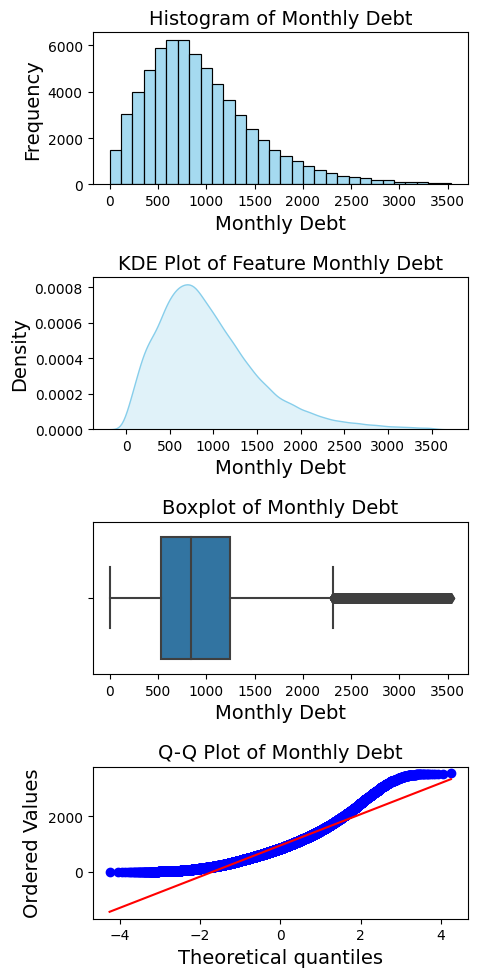

In [71]:
explore_num_feature_distribution(filtered_data_MD,'Monthly Debt')

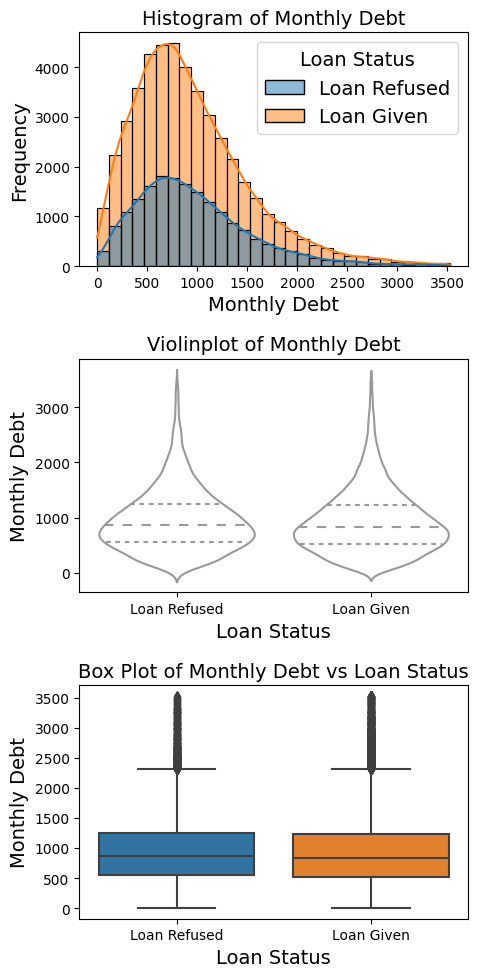

In [72]:
bivariate_analysis_num_cat(filtered_data_MD,'Monthly Debt','Loan Status')

Fromm 99.5 %tile  there is a steep increase in Monthly Debt. we will have all the values after 99.5 %tile.

There are null values and outliers which needs to cleaned. This will be done in next step. We have positively skewed data with a longer tail on right side. We will transform the data in the next step.

Insights: there is no impact of monthly debt with respect to loan status.

3.7.3.9 Years of Credit History

- Name of the feature
- Type of the feature
- % of missing values
- Noisiness and type of noise(stochastic, outliers, rounding errors, etc)
- Type of distribution
- Transformation required
- Bivariate analysis with Target Feature?

In [73]:
explore_num_feature(df_duplicates_removed,'Years of Credit History')

Name of the Feature is Years of Credit History
The number of unique values in Years of Credit History is 508
Years of Credit History is Numerical Feature and Continuous
Null %age of Years of Credit History is 0.0%
IQR is 8.3


SUMMARY

Name of the Feature is Years of Credit History
Years of Credit History is Numerical Feature and Continuous
Null %age of Years of Credit History is 0.0%
The number of unique values in Years of Credit History is 508
Total number of outliers in Years of Credit History is 2773
Minimum value of outliers in Years of Credit History is 3.6 and number of times its repeated is 1
Maximum value of outliers in Years of Credit History is 70.5 and number of times its repeated is 1
Years of Credit History Skewness: 1.0799458373398838, Kurtosis: 1.7513645969109986

The values at various quantiles are

0.0000     3.60000
0.2000    12.70000
0.5000    17.00000
0.7500    21.80000
0.8000    23.10000
0.8500    25.40000
0.9000    27.90000
0.9500    31.90000
0.9900    40.50000
0

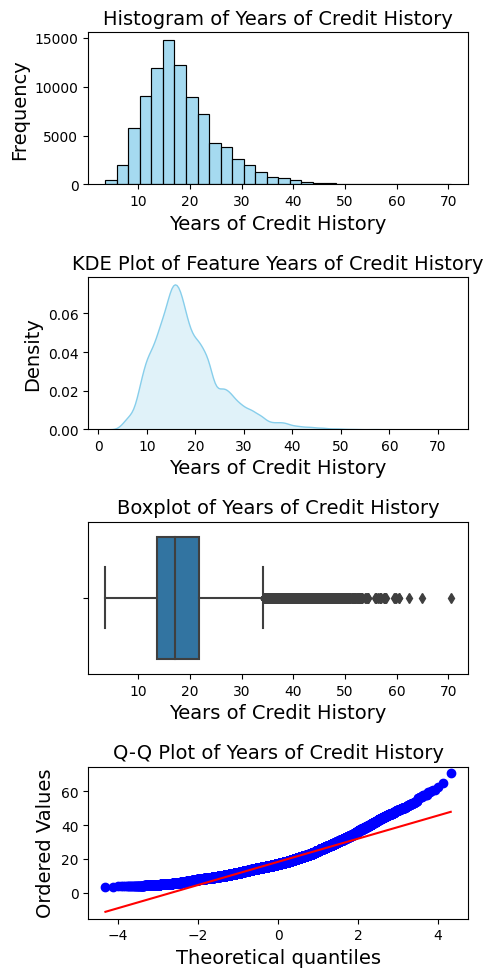

In [74]:
explore_num_feature_distribution(df_duplicates_removed,'Years of Credit History')

In [75]:
filtered_data_YOCH = df_duplicates_removed[df_duplicates_removed['Years of Credit History']<44]

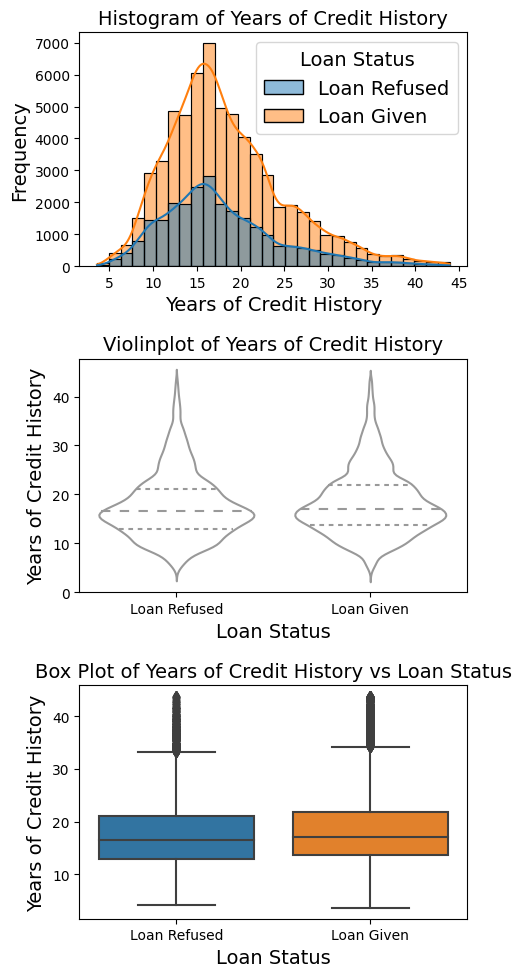

In [76]:
bivariate_analysis_num_cat(filtered_data_YOCH,'Years of Credit History','Loan Status')

No null values were fond but we need to treat the outliers in the next step. We have positively skewed data with a longer tail on right side. We will transform the data in the next step.

Insights: No visual relation can be found in years of credit history and loan status.

3.7.3.10 Months since last delinquent

- Name of the feature
- Type of the feature
- % of missing values
- Noisiness and type of noise(stochastic, outliers, rounding errors, etc)
- Type of distribution
- Transformation required
- Bivariate analysis with Target Feature?

In [77]:
explore_num_feature(df_duplicates_removed,'Months since last delinquent')

Name of the Feature is Months since last delinquent
The number of unique values in Months since last delinquent is 116
Months since last delinquent is Numerical Feature and Continuous
Null %age of Months since last delinquent is 54.55629288044089%
IQR is 35.0


SUMMARY

Name of the Feature is Months since last delinquent
Months since last delinquent is Numerical Feature and Continuous
Null %age of Months since last delinquent is 54.55629288044089%
The number of unique values in Months since last delinquent is 116
Total number of outliers in Months since last delinquent is 19
Minimum value of outliers in Months since last delinquent is 0.0 and number of times its repeated is 191
Maximum value of outliers in Months since last delinquent is 176.0 and number of times its repeated is 1
Months since last delinquent Skewness: nan, Kurtosis: nan

The values at various quantiles are

0.0000      0.0000
0.2000     14.0000
0.5000     32.0000
0.7500     51.0000
0.8000     57.0000
0.8500     63.000

In [78]:
filtered_data_MSLD = df_duplicates_removed[(df_duplicates_removed["Months since last delinquent"] < 82) & (df_duplicates_removed["Months since last delinquent"].notnull())]

In [79]:
explore_num_feature(filtered_data_MSLD,'Months since last delinquent')

Name of the Feature is Months since last delinquent
The number of unique values in Months since last delinquent is 82
Months since last delinquent is Numerical Feature and Discrete
Null %age of Months since last delinquent is 0.0%
IQR is 35.0


SUMMARY

Name of the Feature is Months since last delinquent
Months since last delinquent is Numerical Feature and Discrete
Null %age of Months since last delinquent is 0.0%
The number of unique values in Months since last delinquent is 82
Total number of outliers in Months since last delinquent is 0
Minimum value of outliers in Months since last delinquent is 0.0 and number of times its repeated is 191
Maximum value of outliers in Months since last delinquent is 81.0 and number of times its repeated is 261
Months since last delinquent Skewness: 0.3922150849863204, Kurtosis: -0.9186885249644985

The values at various quantiles are

0.0000     0.0
0.2000    14.0
0.5000    32.0
0.7500    51.0
0.8000    56.0
0.8500    62.0
0.9000    68.0
0.9500    

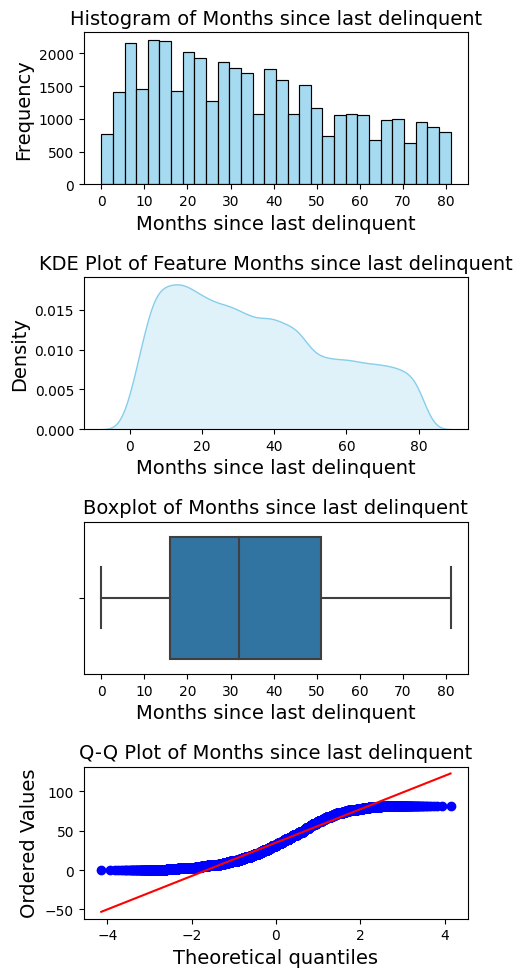

In [80]:
explore_num_feature_distribution(filtered_data_MSLD,'Months since last delinquent')

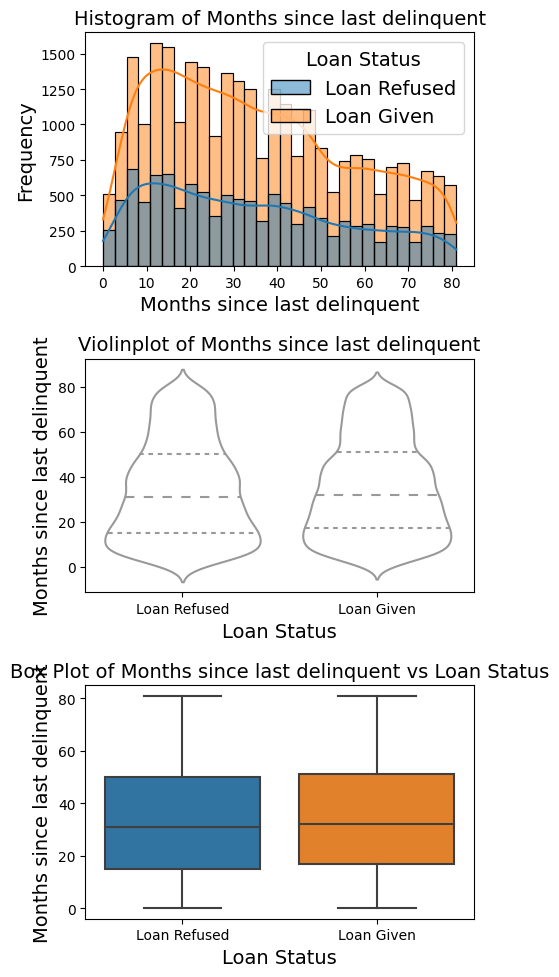

In [81]:
bivariate_analysis_num_cat(filtered_data_MSLD,'Months since last delinquent','Loan Status')

Nearly 50% of the data is missing and we have filtered the outliers. We will treat them in next step.

Applicants delinquent in recent months have higher tendency for loan rejection than with applicants who were delinquent much earlier.

3.7.3.11 Number of Open Accounts

- Name of the feature
- Type of the feature
- % of missing values
- Noisiness and type of noise(stochastic, outliers, rounding errors, etc)
- Type of distribution
- Transformation required
- Bivariate analysis with Target Feature?

In [82]:
explore_num_feature(df_duplicates_removed,'Number of Open Accounts')

Name of the Feature is Number of Open Accounts
The number of unique values in Number of Open Accounts is 52
Number of Open Accounts is Numerical Feature and Discrete
Null %age of Number of Open Accounts is 0.0%
IQR is 6.0


SUMMARY

Name of the Feature is Number of Open Accounts
Number of Open Accounts is Numerical Feature and Discrete
Null %age of Number of Open Accounts is 0.0%
The number of unique values in Number of Open Accounts is 52
Total number of outliers in Number of Open Accounts is 1965
Minimum value of outliers in Number of Open Accounts is 0 and number of times its repeated is 2
Maximum value of outliers in Number of Open Accounts is 76 and number of times its repeated is 2
Number of Open Accounts Skewness: 1.186657928266228, Kurtosis: 3.117118577379536

The values at various quantiles are

0.0000     0.0
0.2000     7.0
0.5000    10.0
0.7500    14.0
0.8000    15.0
0.8500    16.0
0.9000    18.0
0.9500    20.0
0.9900    26.0
0.9950    29.0
0.9990    36.0
0.9999    47.0
Name

In [83]:
filtered_data_NOOA = df_duplicates_removed[df_duplicates_removed['Number of Open Accounts']<29]

In [84]:
explore_num_feature(filtered_data_NOOA,'Number of Open Accounts')

Name of the Feature is Number of Open Accounts
The number of unique values in Number of Open Accounts is 29
Number of Open Accounts is Numerical Feature and Discrete
Null %age of Number of Open Accounts is 0.0%
IQR is 6.0


SUMMARY

Name of the Feature is Number of Open Accounts
Number of Open Accounts is Numerical Feature and Discrete
Null %age of Number of Open Accounts is 0.0%
The number of unique values in Number of Open Accounts is 29
Total number of outliers in Number of Open Accounts is 1449
Minimum value of outliers in Number of Open Accounts is 0 and number of times its repeated is 2
Maximum value of outliers in Number of Open Accounts is 28 and number of times its repeated is 145
Number of Open Accounts Skewness: 0.7938429221598021, Kurtosis: 0.555414102675138

The values at various quantiles are

0.0000     0.0
0.2000     7.0
0.5000    10.0
0.7500    14.0
0.8000    15.0
0.8500    16.0
0.9000    17.0
0.9500    20.0
0.9900    25.0
0.9950    26.0
0.9990    28.0
0.9999    28.0
N

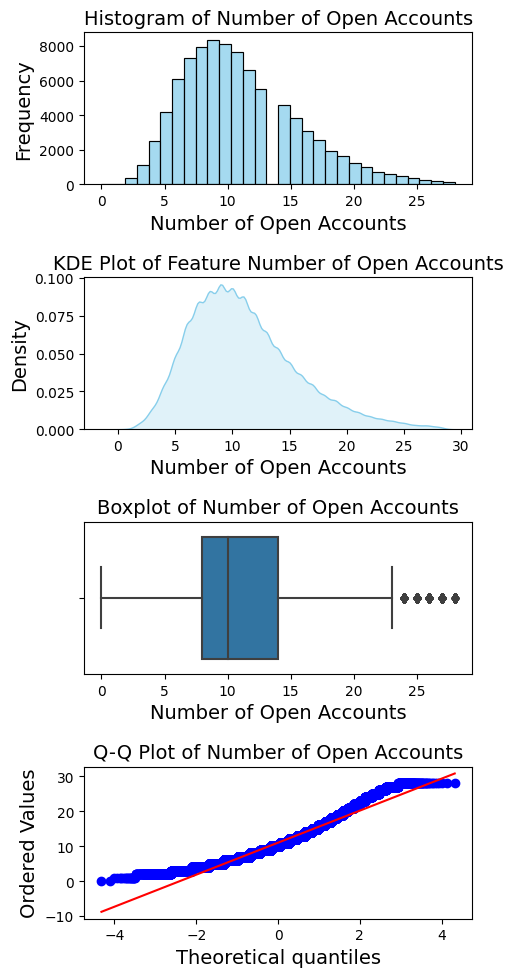

In [85]:
explore_num_feature_distribution(filtered_data_NOOA,'Number of Open Accounts')

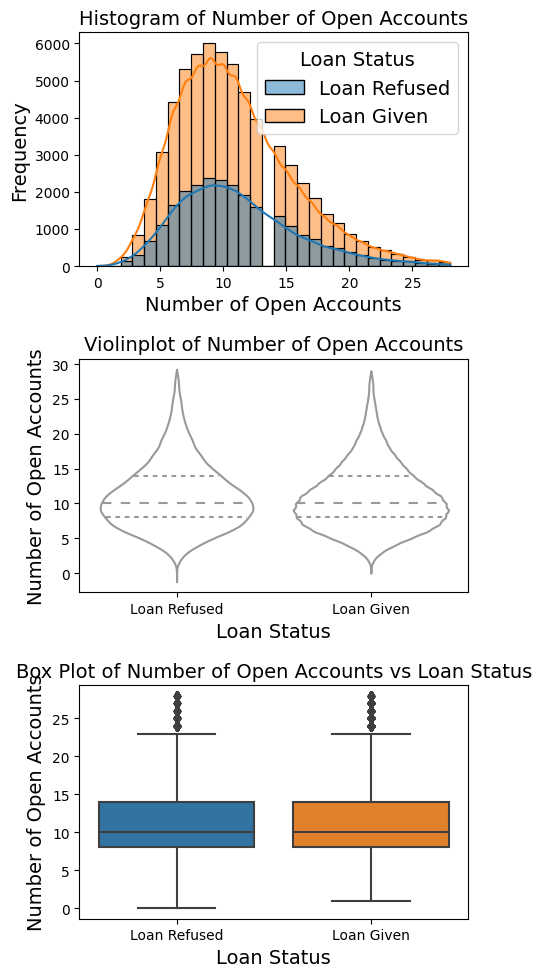

In [86]:
bivariate_analysis_num_cat(filtered_data_NOOA,'Number of Open Accounts','Loan Status')

3.7.3.12 Number of Credit Problems

- Name of the feature
- Type of the feature
- % of missing values
- Noisiness and type of noise(stochastic, outliers, rounding errors, etc)
- Type of distribution
- Transformation required
- Bivariate analysis with Target Feature?

In [87]:
explore_num_feature(df_duplicates_removed,'Number of Credit Problems')

Name of the Feature is Number of Credit Problems
The number of unique values in Number of Credit Problems is 14
Number of Credit Problems is Numerical Feature and Discrete
Null %age of Number of Credit Problems is 0.0%
IQR is 0.0


SUMMARY

Name of the Feature is Number of Credit Problems
Number of Credit Problems is Numerical Feature and Discrete
Null %age of Number of Credit Problems is 0.0%
The number of unique values in Number of Credit Problems is 14
Total number of outliers in Number of Credit Problems is 11853
Minimum value of outliers in Number of Credit Problems is 0 and number of times its repeated is 77057
Maximum value of outliers in Number of Credit Problems is 15 and number of times its repeated is 1
Number of Credit Problems Skewness: 5.088204659447405, Kurtosis: 54.277136292335996

The values at various quantiles are

0.0000    0.0
0.2000    0.0
0.5000    0.0
0.7500    0.0
0.8000    0.0
0.8500    0.0
0.9000    1.0
0.9500    1.0
0.9900    2.0
0.9950    3.0
0.9990    4.0


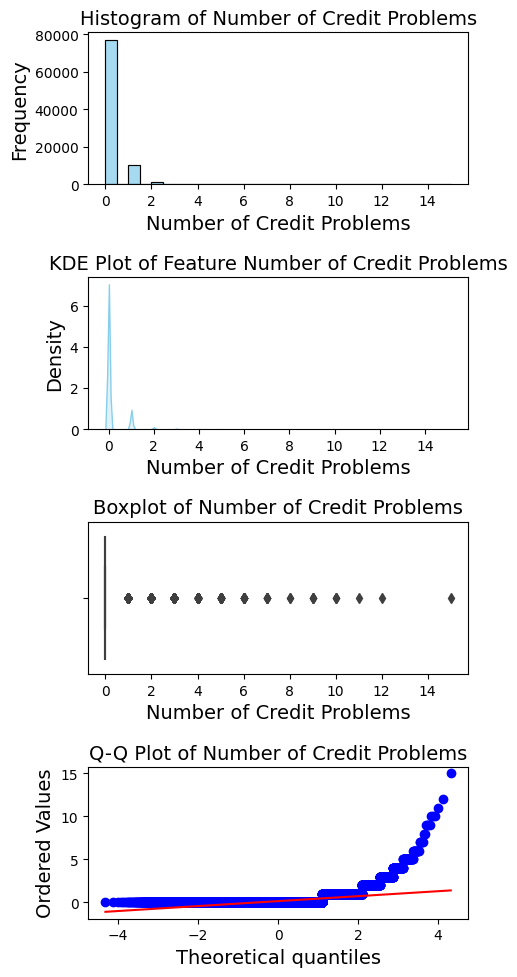

In [88]:
explore_num_feature_distribution(df_duplicates_removed,'Number of Credit Problems')

In [89]:
filetered_data_NOCP = df_duplicates_removed[df_duplicates_removed['Number of Credit Problems']<11]

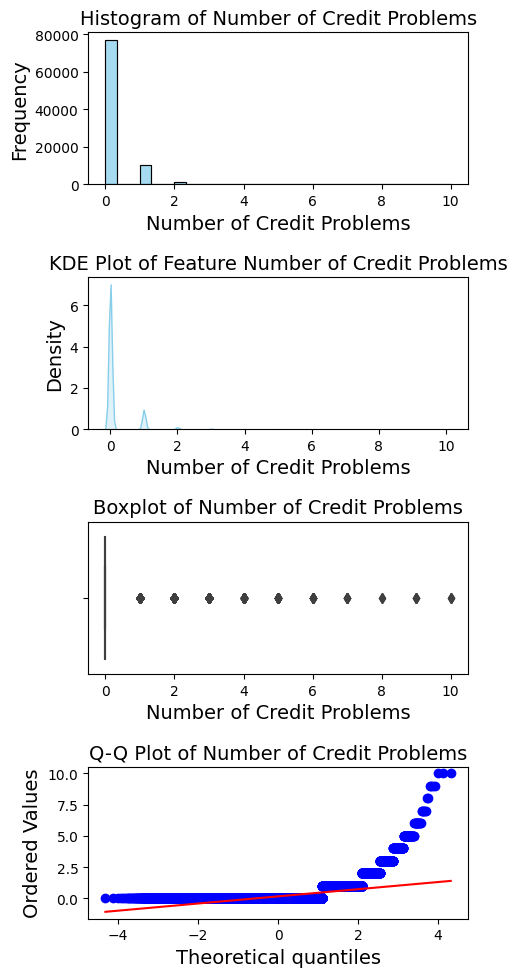

In [90]:
explore_num_feature_distribution(filetered_data_NOCP,'Number of Credit Problems')

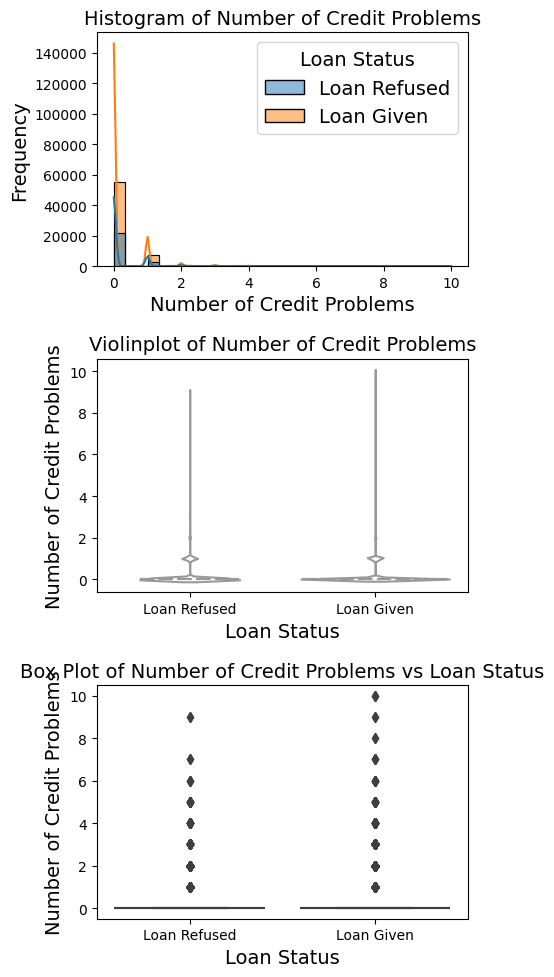

In [91]:
bivariate_analysis_num_cat(filetered_data_NOCP,'Number of Credit Problems','Loan Status')

Insights: We can see for loan refused density of applicants with 0 credit problems is lower than for applicants whose loan was approved. 

3.7.3.13 Current Credit Balance

- Name of the feature
- Type of the feature
- % of missing values
- Noisiness and type of noise(stochastic, outliers, rounding errors, etc)
- Type of distribution
- Transformation required
- Bivariate analysis with Target Feature?

In [92]:
explore_num_feature(df_duplicates_removed,'Current Credit Balance')

Name of the Feature is Current Credit Balance
The number of unique values in Current Credit Balance is 33716
Current Credit Balance is Numerical Feature and Continuous
Null %age of Current Credit Balance is 0.0%
IQR is 13352.0


SUMMARY

Name of the Feature is Current Credit Balance
Current Credit Balance is Numerical Feature and Continuous
Null %age of Current Credit Balance is 0.0%
The number of unique values in Current Credit Balance is 33716
Total number of outliers in Current Credit Balance is 4619
Minimum value of outliers in Current Credit Balance is 0 and number of times its repeated is 513
Maximum value of outliers in Current Credit Balance is 1730472 and number of times its repeated is 1
Current Credit Balance Skewness: 15.387973688612997, Kurtosis: 808.5081765486451

The values at various quantiles are

0.0000         0.0000
0.2000      5030.0000
0.5000     11039.0000
0.7500     19301.0000
0.8000     22034.2000
0.8500     25641.0000
0.9000     30843.5000
0.9500     39933.300

In [93]:
filtered_data_CCB = df_duplicates_removed[df_duplicates_removed['Current Credit Balance']<81008]

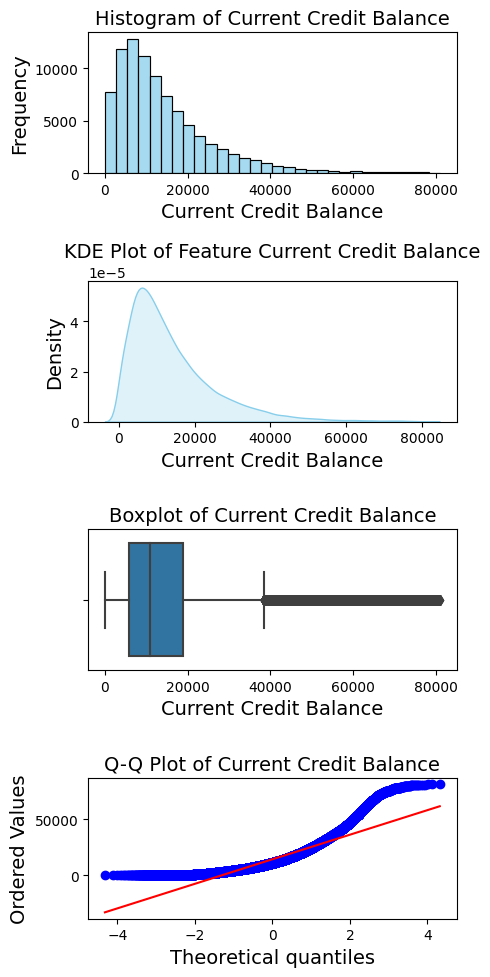

In [94]:
explore_num_feature_distribution(filtered_data_CCB,'Current Credit Balance')

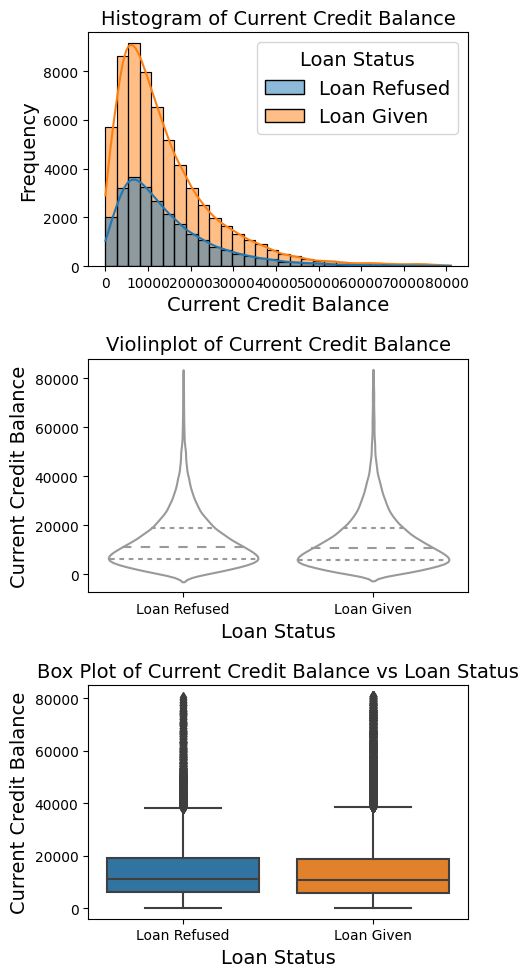

In [95]:
bivariate_analysis_num_cat(filtered_data_CCB,'Current Credit Balance','Loan Status')

We can see there are large value outliers after 99%ile. We will replace it with value at 99%ile

No null values were fond but we need to treat the outliers in the next step. We have positively skewed data with a longer tail on right side. We will transform the data in the next step.

Insights: No visual relation can be found in years of credit history and loan status.

3.7.3.14 Maximum Open Credit

- Name of the feature
- Type of the feature
- % of missing values
- Noisiness and type of noise(stochastic, outliers, rounding errors, etc)
- Type of distribution
- Transformation required
- Bivariate analysis with Target Feature?

In [96]:
explore_num_feature(df_duplicates_removed,'Maximum Open Credit')

Name of the Feature is Maximum Open Credit
The number of unique values in Maximum Open Credit is 46624
Maximum Open Credit is Numerical Feature and Continuous
Null %age of Maximum Open Credit is 0.0022494657518839275%
IQR is 23592.0


SUMMARY

Name of the Feature is Maximum Open Credit
Maximum Open Credit is Numerical Feature and Continuous
Null %age of Maximum Open Credit is 0.0022494657518839275%
The number of unique values in Maximum Open Credit is 46624
Total number of outliers in Maximum Open Credit is 5175
Minimum value of outliers in Maximum Open Credit is 0.0 and number of times its repeated is 610
Maximum value of outliers in Maximum Open Credit is 69988086.0 and number of times its repeated is 1
Maximum Open Credit Skewness: nan, Kurtosis: nan

The values at various quantiles are

0.0000    0.000000e+00
0.2000    1.111300e+04
0.5000    2.178100e+04
0.7500    3.636700e+04
0.8000    4.116700e+04
0.8500    4.736990e+04
0.9000    5.695750e+04
0.9500    7.660240e+04
0.9900    1.71

In [97]:
quantile_labels = ['0.0000', '0.5000', '0.7500', '0.9000', '0.9500', '0.9900', '0.9990', '0.9999', '1.0000']

# Get the quantiles
quantiles_1 = df_duplicates_removed['Maximum Open Credit'].quantile([0.0, 0.5, 0.75, 0.9, 0.95, 0.99, 0.999, 0.9999, 1])

# Convert exponential numbers to decimal format with 2 decimal places and include labels
formatted_quantiles_1 = ["{} {:.2f}".format(label, value) for label, value in zip(quantile_labels, quantiles_1)]

df_formated_quantile_1 = pd.DataFrame(formatted_quantiles_1)

df_formated_quantile_1

0
0         0.0000 0.00
1     0.5000 21781.00
2     0.7500 36367.00
3     0.9000 56957.50
4     0.9500 76602.40
5    0.9900 171423.93
6    0.9990 892319.00
7  0.9999 10894619.54
8  1.0000 69988086.00

There is huge markup in values after 99%ile. We will replace these values with value at 99%ile

In [98]:
filtered_data_MOC = df_duplicates_removed[df_duplicates_removed['Maximum Open Credit']<171424]

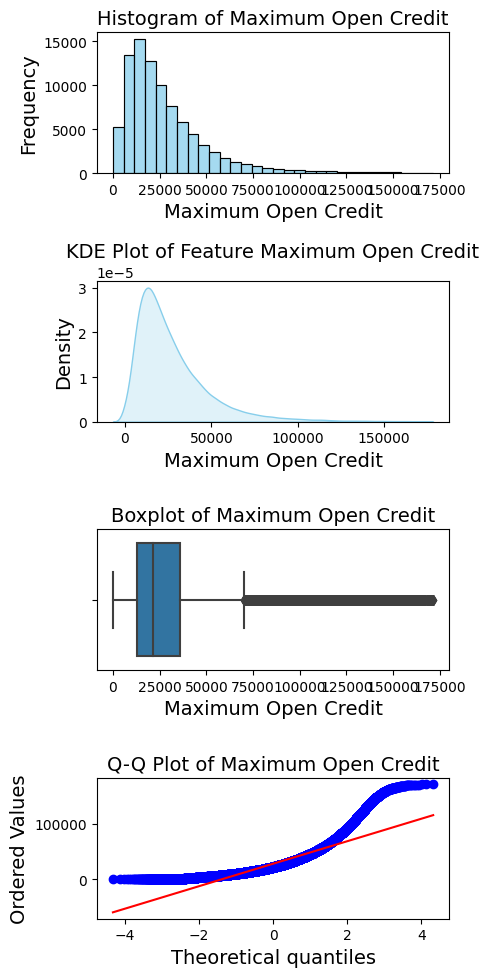

In [99]:
explore_num_feature_distribution(filtered_data_MOC,'Maximum Open Credit')

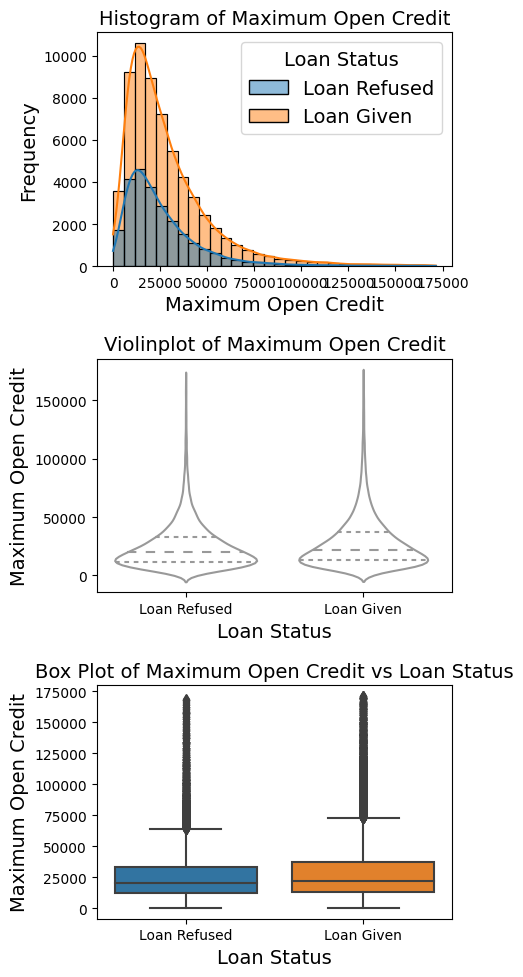

In [100]:
bivariate_analysis_num_cat(filtered_data_MOC,'Maximum Open Credit','Loan Status')

Null values were found but very negligible, we need to treat the outliers in the next step. We have positively skewed data with a longer tail on right side. We will transform the data in the next step.

Insights: There is higher density of loan rejection cases at 25 & 50 percentile than at loan given.

3.7.3.15 Bankruptcies

- Name of the feature
- Type of the feature
- % of missing values
- Noisiness and type of noise(stochastic, outliers, rounding errors, etc)
- Type of distribution
- Transformation required
- Bivariate analysis with Target Feature?

In [101]:
explore_num_feature(df_duplicates_removed,'Bankruptcies')

Name of the Feature is Bankruptcies
The number of unique values in Bankruptcies is 8
Bankruptcies is Numerical Feature and Discrete
Null %age of Bankruptcies is 0.21594871218085704%
IQR is 0.0


SUMMARY

Name of the Feature is Bankruptcies
Bankruptcies is Numerical Feature and Discrete
Null %age of Bankruptcies is 0.21594871218085704%
The number of unique values in Bankruptcies is 8
Total number of outliers in Bankruptcies is 9395
Minimum value of outliers in Bankruptcies is 0.0 and number of times its repeated is 79323
Maximum value of outliers in Bankruptcies is 7.0 and number of times its repeated is 1
Bankruptcies Skewness: nan, Kurtosis: nan

The values at various quantiles are

0.0000    0.0
0.2000    0.0
0.5000    0.0
0.7500    0.0
0.8000    0.0
0.8500    0.0
0.9000    1.0
0.9500    1.0
0.9900    1.0
0.9950    2.0
0.9990    3.0
0.9999    4.0
Name: Bankruptcies, dtype: float64


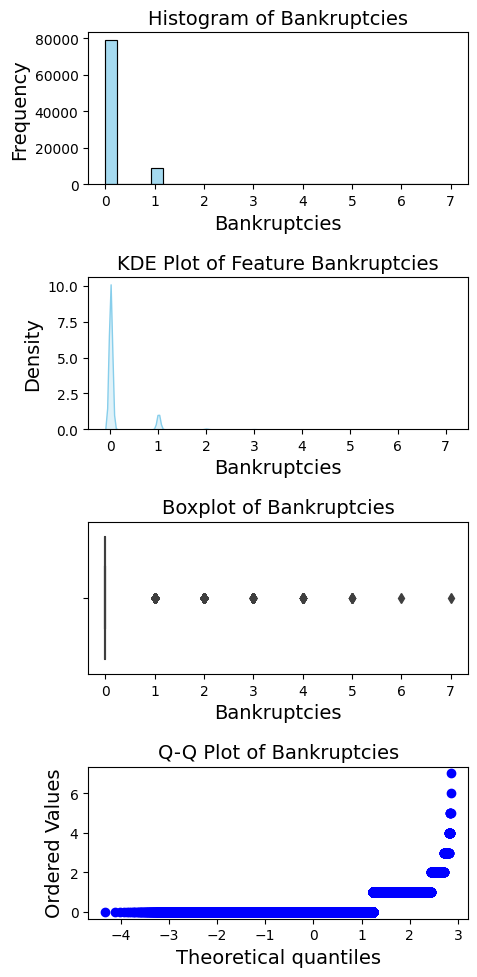

In [102]:
explore_num_feature_distribution(df_duplicates_removed,'Bankruptcies')

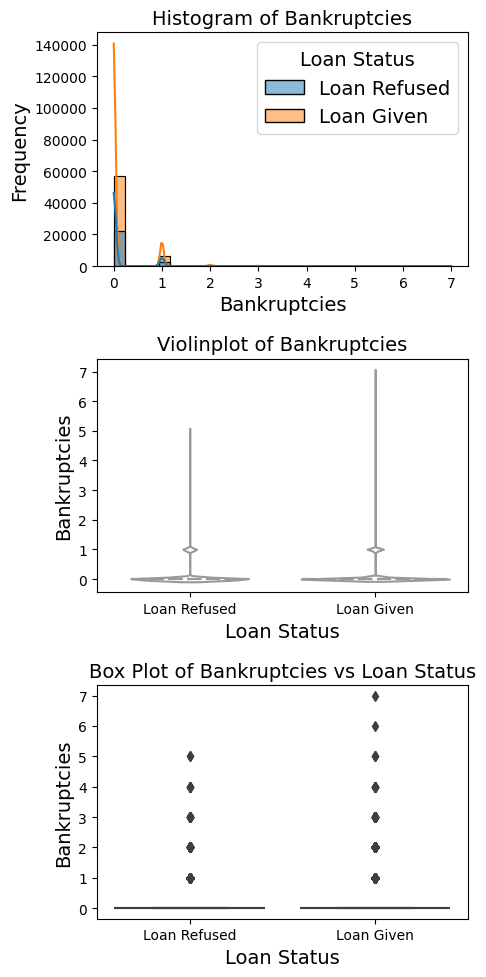

In [103]:
bivariate_analysis_num_cat(df_duplicates_removed,'Bankruptcies','Loan Status')

Null values were found but very negligible, we need to treat the outliers in the next step. We have positively skewed data with a longer tail on right side. We will transform the data in the next step.

Insights: Applicants with 0 Bankruptcies have higher chances of getting loan approved

3.7.3.16 Tax Liens

- Name of the feature
- Type of the feature
- % of missing values
- Noisiness and type of noise(stochastic, outliers, rounding errors, etc)
- Type of distribution
- Transformation required
- Bivariate analysis with Target Feature?

In [104]:
explore_num_feature(df_duplicates_removed,'Tax Liens')

Name of the Feature is Tax Liens
The number of unique values in Tax Liens is 13
Tax Liens is Numerical Feature and Discrete
Null %age of Tax Liens is 0.00899786300753571%
IQR is 0.0


SUMMARY

Name of the Feature is Tax Liens
Tax Liens is Numerical Feature and Discrete
Null %age of Tax Liens is 0.00899786300753571%
The number of unique values in Tax Liens is 13
Total number of outliers in Tax Liens is 1628
Minimum value of outliers in Tax Liens is 0.0 and number of times its repeated is 87274
Maximum value of outliers in Tax Liens is 15.0 and number of times its repeated is 1
Tax Liens Skewness: nan, Kurtosis: nan

The values at various quantiles are

0.0000    0.0000
0.2000    0.0000
0.5000    0.0000
0.7500    0.0000
0.8000    0.0000
0.8500    0.0000
0.9000    0.0000
0.9500    0.0000
0.9900    1.0000
0.9950    2.0000
0.9990    4.0000
0.9999    7.1099
Name: Tax Liens, dtype: float64


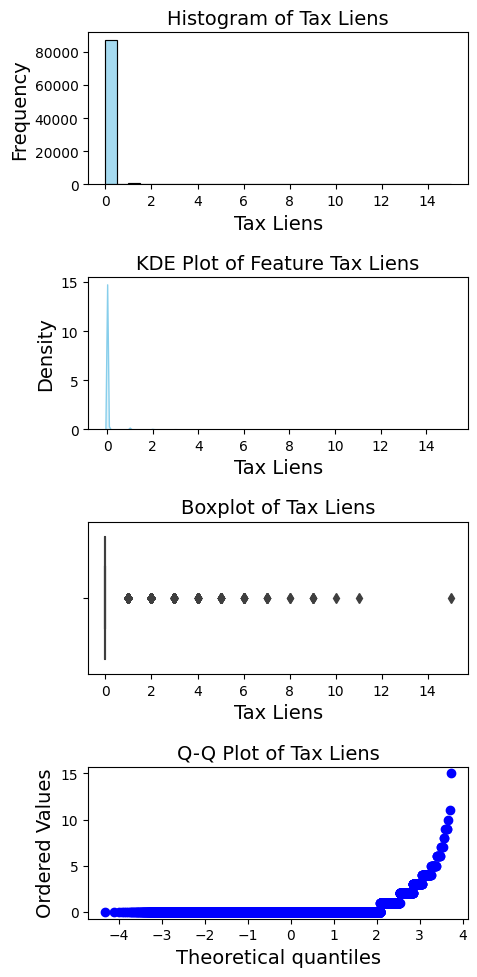

In [105]:
explore_num_feature_distribution(df_duplicates_removed,'Tax Liens')

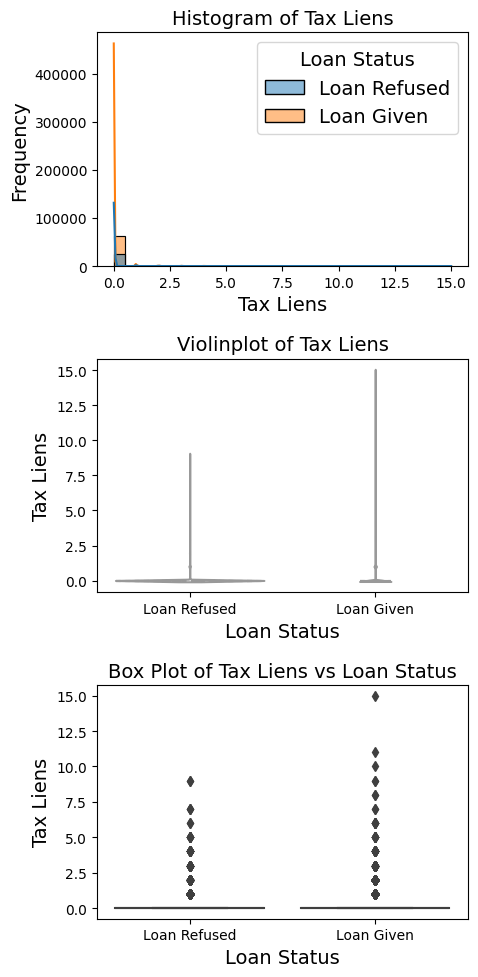

In [106]:
bivariate_analysis_num_cat(df_duplicates_removed,'Tax Liens','Loan Status')

In [107]:
df_duplicates_removed.groupby('Tax Liens')['Loan Status'].value_counts()

Tax Liens  Loan Status 
0.0        Loan Given      62645
           Loan Refused    24629
1.0        Loan Given        763
           Loan Refused      369
2.0        Loan Given        206
           Loan Refused       99
3.0        Loan Given         60
           Loan Refused       39
4.0        Loan Given         30
           Loan Refused       22
5.0        Loan Given          9
           Loan Refused        8
6.0        Loan Given          7
           Loan Refused        2
7.0        Loan Refused        3
           Loan Given          2
8.0        Loan Given          2
9.0        Loan Given          2
           Loan Refused        2
10.0       Loan Given          1
11.0       Loan Given          1
15.0       Loan Given          1
Name: Loan Status, dtype: int64

Null values were found but very negligible, we need to treat the outliers in the next step. We have positively skewed data with a longer tail on right side. We will transform the data in the next step.

<h4>3.8 Finding Correlation between Numerical Features

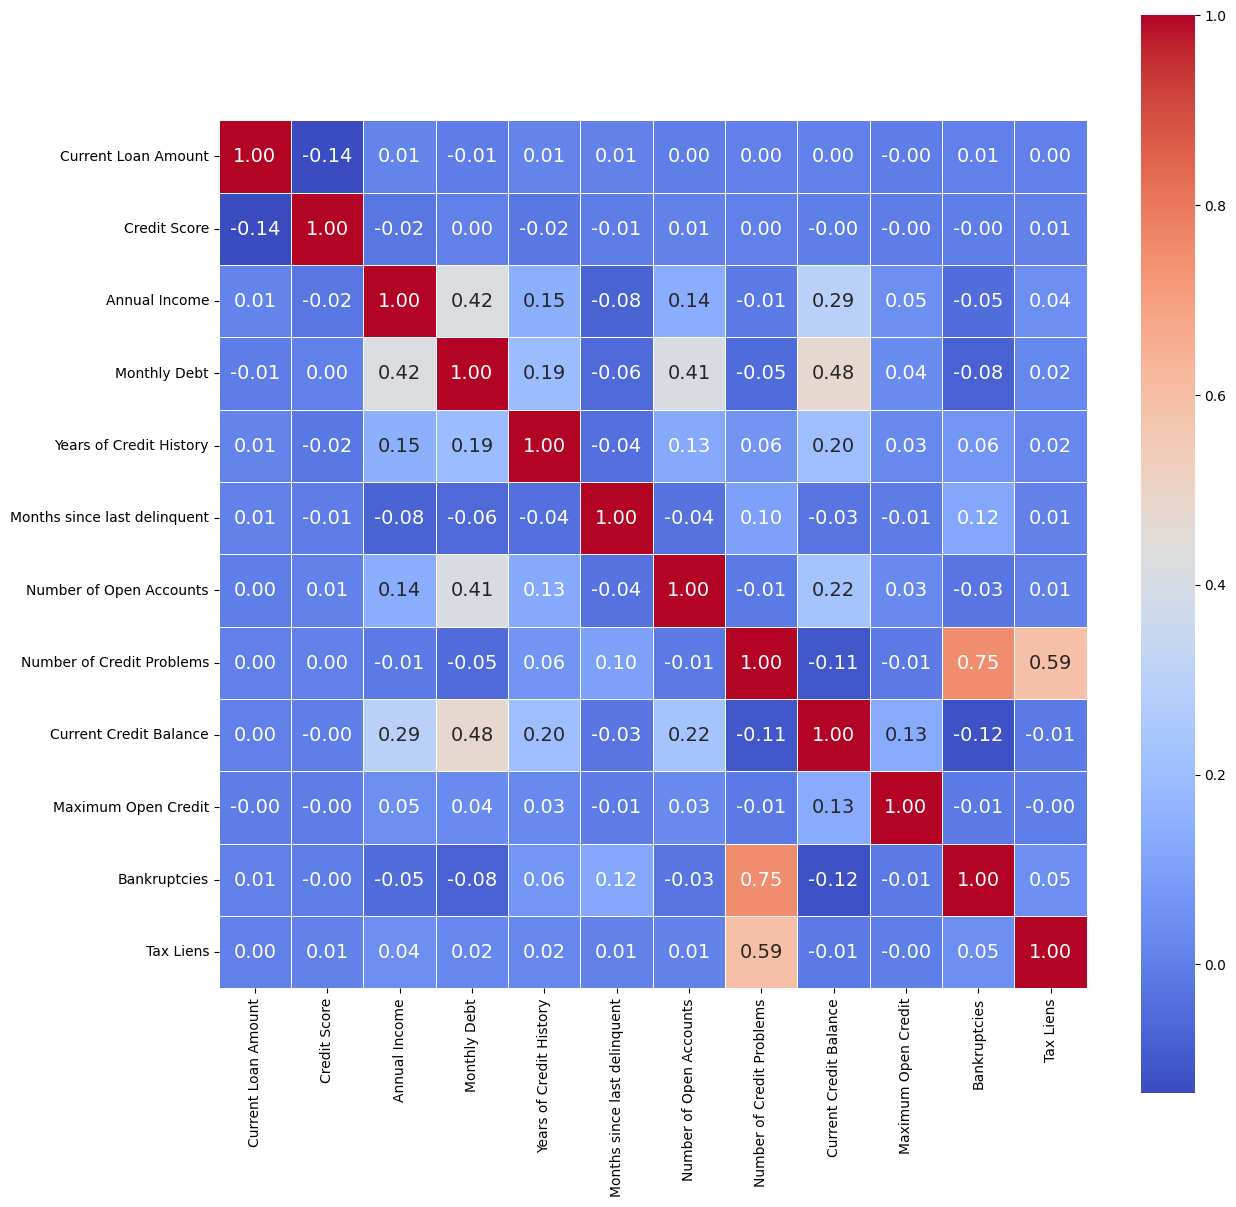

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

correl = df_duplicates_removed.corr()

# Set the size and aspect ratio of the heatmap
fig, ax = plt.subplots(figsize=(14, 14))
sns.heatmap(correl, xticklabels=correl.columns.values, yticklabels=correl.columns.values,
            annot=True, fmt=".2f", cmap="coolwarm", ax=ax, square=True,linewidths=0.5)

plt.show()


Insights:

- There is a strong correlation(0.75) between number of credit problems and bankruptcies.
- We can then se a good correlation(0.59) between number of credit problems and tax liens
- There is good correlation(0.48) between monthly debt and current credit balance.
- There is good correlation(0.42) between monthly debt and annual income.
- Again there is a correlation(0.41) between monthly debt and number of open accounts.
- There is a correlation(0.29) between annual income and current credit balance.
- There is a negative corelation(-0.14) between credit score and current loan amount.

<h3>4. Prepare The Data

In [109]:
#creating a copy of dataframe to work on treating ouliers and transformation

df_deep_copy = df_duplicates_removed.copy(deep=True)

<h4>4.1 Data Cleaning

- Fill or remove null values
- Fixing outliers.

<h5>Assigning Null Values for Unrealistic Outliers

In [110]:
def convert_outliers_2_nan(df,variable,outlier_value):
    df.loc[df[variable] > outlier_value, variable] = np.nan

In [111]:
convert_outliers_2_nan(df_deep_copy,'Current Loan Amount',99999998)

Cleaning Purpose Feature. It consists of 'Others' 2 times.

In [112]:
def replace_values_in_cat_feature(df,variable,feature_2_be_replaced,feature_2_be_replaced_by):
    df.loc[df[variable]==feature_2_be_replaced,variable] = feature_2_be_replaced_by

In [113]:
replace_values_in_cat_feature(df_deep_copy,'Purpose','other','Other')

We will clean Credit Score Data as we have identified before it have many cases with score greater than 900.
We identified that there is extra zero at the end which is creating the outliers. We will create a function to remove 0 from the end where CREDIT score is greater than 900. 

In [114]:
def remove_end_zero_from_feature(df,variable):
    df[variable] = np.where(df[variable] >800, 
                            df[variable]/10,
                            df[variable])

In [115]:
remove_end_zero_from_feature(df_deep_copy,'Credit Score')

In [116]:
null_percentage= df_deep_copy.isnull().sum() / df.shape[0] * 100
columns_with_null = null_percentage[null_percentage > 0]
print(columns_with_null)

Current Loan Amount             11.464624
Credit Score                    19.204911
Years in current job             3.435427
Annual Income                   19.204911
Monthly Debt                    21.037378
Months since last delinquent    43.657015
Maximum Open Credit              0.001800
Bankruptcies                     0.172806
Tax Liens                        0.007200
dtype: float64


Years in current job is the only Categorical Feature which has null values, we will write a fuction to impute the same. For the Numerical features we will use, KNN Imputation.  

<h5>Years in Current Job NAN Imputation

In [117]:
df_deep_copy['Years in current job'].isnull().sum()

3817

In [118]:
# Group by  and get the size of each group
grouped_counts_2 = df_deep_copy[df_deep_copy['Years in current job'].isnull()].groupby('Years of Credit History').size().sort_values()

# Reset index to convert the Series to a DataFrame
grouped_counts_df_2 = grouped_counts_2.reset_index(name='Counts')

# Print the resulting DataFrame
print(grouped_counts_df_2)


     Years of Credit History  Counts
0                        3.9       1
1                       47.8       1
2                       47.1       1
3                       47.0       1
4                       46.4       1
..                       ...     ...
445                     15.4      37
446                     16.5      40
447                     17.5      40
448                     17.0      45
449                     16.0      45

[450 rows x 2 columns]


In [119]:

df_deep_copy.groupby('Years in current job')['Years of Credit History'].median()


Years in current job
1 year       15.5
10+ years    19.3
2 years      15.6
3 years      15.5
4 years      15.6
5 years      16.0
6 years      16.1
7 years      16.4
8 years      16.8
9 years      16.9
< 1 year     15.6
Name: Years of Credit History, dtype: float64

There is no clear relationship in years in credit history and years in current job. And the feature is not related to any other avaliable feature. We will impute ramdom variables.

In [120]:
def impute_random_values_2_nan_variable(df,variable_2_impute):

    df[variable_2_impute+"_random"]=df[variable_2_impute]
    
    ##It will have the random sample to fill the na
    random_sample=df[variable_2_impute].dropna().sample(df[variable_2_impute].isnull().sum(),random_state=0)
    
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable_2_impute].isnull()].index
    df.loc[df[variable_2_impute].isnull(),variable_2_impute+'_random']=random_sample

In [121]:
impute_random_values_2_nan_variable(df_deep_copy,'Years in current job')

In [122]:
df_deep_copy.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Years in current job', 'Home Ownership',
       'Annual Income', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens',
       'Years in current job_random'],
      dtype='object')

In [123]:
len(df_deep_copy[df_deep_copy['Years in current job_random'].isnull()==True])

0

Nan imputation completed for Years in current job

In [124]:
num_fea = [feature for feature in df_deep_copy.columns if df_deep_copy[feature].dtype !='O' ]
cat_fea = [feature for feature in df_deep_copy.columns if df_deep_copy[feature].dtype =='O' ]

KNN Imputer for Imputing Missing Values

In [125]:
from sklearn.impute import KNNImputer

In [126]:
knn = KNNImputer()

In [127]:
knn.fit(df_deep_copy[num_fea])

KNNImputer()

In [128]:
df_knn_imputed = pd.DataFrame(knn.transform(df_deep_copy[num_fea]),columns=num_fea)

In [129]:
df_knn_imputed.isnull().sum()

Current Loan Amount             0
Credit Score                    0
Annual Income                   0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64

Columns with Outliers

- Annual Income - 99%tile - 239286.960
- Monthly Debt - 99%tile - 3084.08600
- Years with Credit History - 99%tile - 40.5
- Month Since Last Delinquent - 99%tile - 81
- Current Credit Balance - 99%tile - 81007.19
- Maximum Open Credit - 99%tile - 171423.93

In [130]:
df_knn_imputed.columns

Index(['Current Loan Amount', 'Credit Score', 'Annual Income', 'Monthly Debt',
       'Years of Credit History', 'Months since last delinquent',
       'Number of Open Accounts', 'Number of Credit Problems',
       'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies',
       'Tax Liens'],
      dtype='object')

In [131]:
#list of columns for which outliers needs to be treated
outlier_columns_list = ['Current Loan Amount','Annual Income','Monthly Debt','Years of Credit History','Months since last delinquent','Current Credit Balance','Maximum Open Credit']

In [132]:

def percentile_capping(df,cols,from_low_end,from_high_end):
    for col in cols:
        stats.mstats.winsorize(a=df[col],limits= (from_low_end,from_high_end),inplace = True)


In [133]:
percentile_capping(df_knn_imputed,outlier_columns_list,0.0,0.01)

Handeling categorical values - Using One Hot Encoding 

In [134]:
from sklearn.preprocessing import OneHotEncoder

print(cat_fea)

['Loan ID', 'Customer ID', 'Loan Status', 'Term', 'Years in current job', 'Home Ownership', 'Purpose', 'Years in current job_random']


We will drop Loan ID , Customer and Loan Status ID from the dataframe

In [135]:
df_copy_dropped_features = df_deep_copy.drop(['Loan ID','Customer ID','Loan Status'],axis=1)

In [136]:
cat_fea_dropped = [feature for feature in df_copy_dropped_features.columns if df_copy_dropped_features[feature].dtype =='O']

In [137]:
cat_oh_encoder = OneHotEncoder()

In [138]:
from sklearn.compose import make_column_transformer

In [139]:
ohe_column_transformer = make_column_transformer(
    (cat_oh_encoder,cat_fea_dropped,),remainder='passthrough')


In [140]:
ohe_matrix = ohe_column_transformer.fit_transform(df_copy_dropped_features)

In [141]:
ohe_df = pd.DataFrame(ohe_matrix,columns=ohe_column_transformer.get_feature_names_out())
ohe_df

onehotencoder__Term_Long Term  onehotencoder__Term_Short Term  \
0                                0.0                             1.0   
1                                1.0                             0.0   
2                                0.0                             1.0   
3                                0.0                             1.0   
4                                1.0                             0.0   
...                              ...                             ...   
88905                            0.0                             1.0   
88906                            0.0                             1.0   
88907                            0.0                             1.0   
88908                            0.0                             1.0   
88909                            0.0                             1.0   

       onehotencoder__Years in current job_1 year  \
0                                             0.0   
1                                             0.0   
2                                             0.0   
3                                             0.0   
4                                             0.0   
...                                           ...   
88905                                         0.0   
88906                                         0.0   
88907                                         0.0   
88908                                         0.0   
88909                                         0.0   

       onehotencoder__Years in current job_10+ years  \
0                                                0.0   
1                                                1.0   
2                                                0.0   
3                                                0.0   
4                                                1.0   
...                                              ...   
88905                                            1.0   
88906                                            1.0   
88907                                            0.0   
88908                                            0.0   
88909                                            0.0   

       onehotencoder__Years in current job_2 years  \
0                                              0.0   
1                                              0.0   
2                                              0.0   
3                                              0.0   
4                                              0.0   
...                                            ...   
88905                                          0.0   
88906                                          0.0   
88907                                          0.0   
88908                                          0.0   
88909                                          0.0   

       onehotencoder__Years in current job_3 years  \
0                                              0.0   
1                                              0.0   
2                                              0.0   
3                                              1.0   
4                                              0.0   
...                                            ...   
88905                                          0.0   
88906                                          0.0   
88907                                          0.0   
88908                                          0.0   
88909                                          0.0   

       onehotencoder__Years in current job_4 years  \
0                                              0.0   
1                                              0.0   
2                                              0.0   
3                                              0.0   
4                                              0.0   
...                                            ...   
88905                                          0.0   
88906                                          0.0   
88907                                          0

Feature Transformation

In [142]:
df_copy_dropped_features.columns

Index(['Current Loan Amount', 'Term', 'Credit Score', 'Years in current job',
       'Home Ownership', 'Annual Income', 'Purpose', 'Monthly Debt',
       'Years of Credit History', 'Months since last delinquent',
       'Number of Open Accounts', 'Number of Credit Problems',
       'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies',
       'Tax Liens', 'Years in current job_random'],
      dtype='object')

In [143]:
def distribution_diagnostic(df,variable):
    
    # Create a figure and a grid of subplots
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # Plot KDE plot
    sns.kdeplot(data=df, x=variable, color='skyblue', fill=True, ax=axs[0])
    axs[0].set_title(f'KDE Plot of Feature {variable}')
    axs[0].set_xlabel(f'{variable}')
    axs[0].set_ylabel('Density')


    #Visualise Q-Q Plot
    stats.probplot(df[variable], dist="norm", plot=plt)
    axs[1].set_title(f'Q-Q Plot of {variable}')


    plt.tight_layout()  # Adjust spacing between subplots
    plt.show()

In [144]:
import scipy.stats as stats

def num_feature_transformation_identification(df,variable):
    
    print(f'Distribution Diagnostic and Transformation Done for Feature {variable}')
    distribution_diagnostic(df,variable)

    #Natural Logarithmic Transformation
    df['Log Trans '+variable] = np.log(df[variable]+1)
    try:
        distribution_diagnostic(df,'Log Trans '+variable)
    except ValueError as e:
    # Handle the exception
        print("An error occurred:", e)
    #Common Logarithm (Base 10) Transformation
    df['Log Base 10 Trans '+variable] = np.log10(df[variable]+1)
    try:
        distribution_diagnostic(df,'Log Base 10 Trans '+variable)
    except ValueError as e:
    # Handle the exception
        print("An error occurred:", e)
    #Square Root Transformation
    
    df['Square Root '+variable] = (df[variable]+1)*(1/2)
    try:
        distribution_diagnostic(df,'Square Root '+variable)
    except ValueError as e:
    # Handle the exception
        print("An error occurred:", e)
    #Square Root Transformation
    
    df['Cube Root '+variable] = (df[variable]+1)*(1/3)
    try:
        distribution_diagnostic(df,'Cube Root '+variable)
    except ValueError as e:
    # Handle the exception
        print("An error occurred:", e)

    #Exponential Transformation
    
    df['Exp Trans '+variable] = np.exp(df[variable]+1)
    try:
        distribution_diagnostic(df,'Exp Trans '+variable)
    except ValueError as e:
    # Handle the exception
        print("An error occurred:", e)
    #BoxCoX Transformation
    try:
    # Attempt to apply Box-Cox transformation
        df['BoxCox Trans ' + variable], param = stats.boxcox(df[variable]+1)

    # Check if the transformed data is positive
        if any(df['BoxCox Trans ' + variable] <= 0):
            raise ValueError("Transformed data must be positive")

    # If successful, proceed with further analysis
        distribution_diagnostic(df, 'BoxCox Trans ' + variable)
    except ValueError as e:
    # Handle the exception
        print("An error occurred:", e)
    
       
    

Distribution Diagnostic and Transformation Done for Feature Current Loan Amount


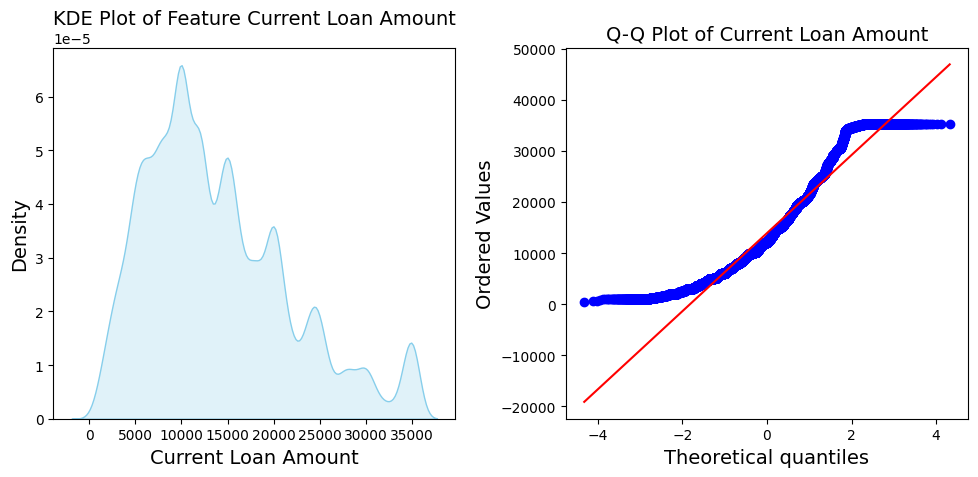

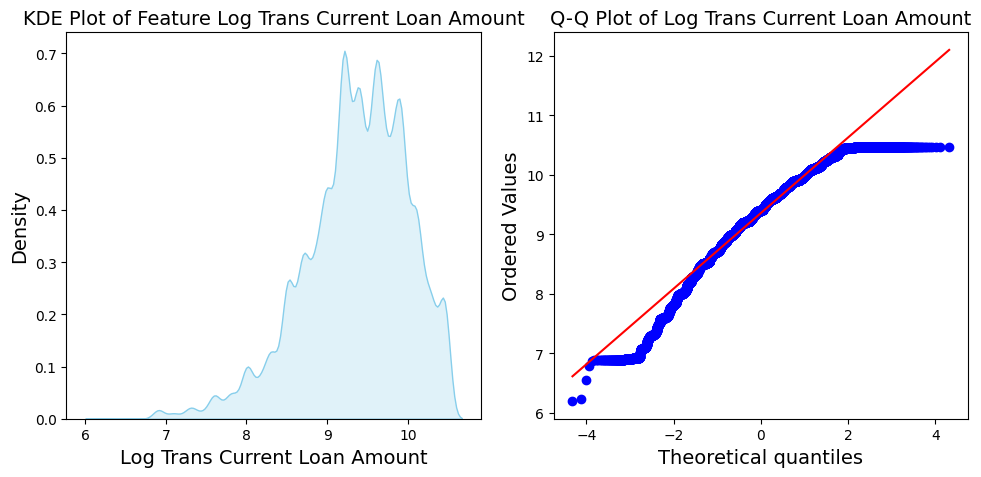

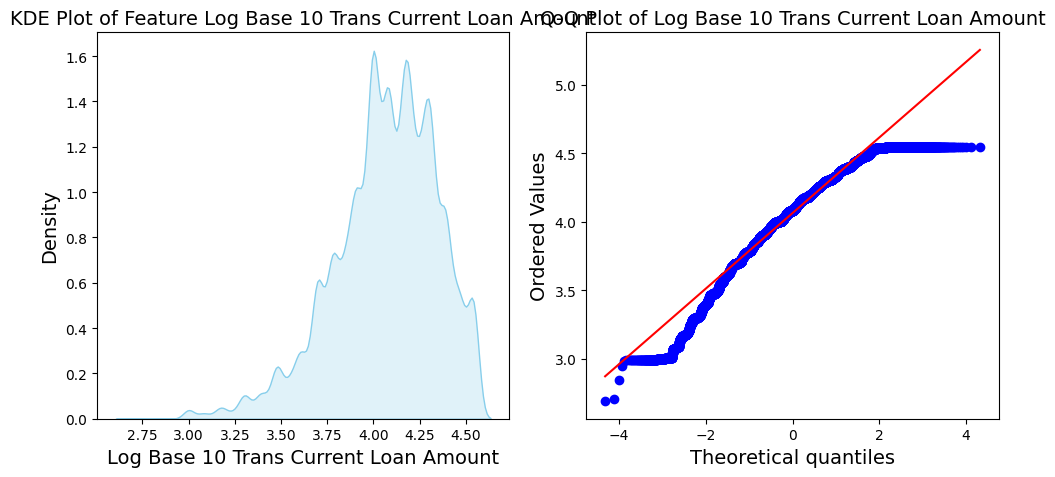

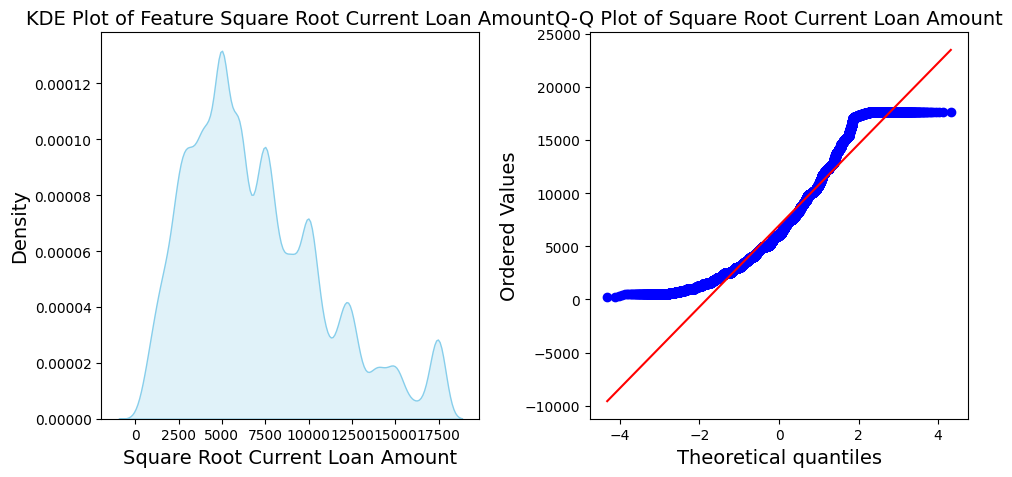

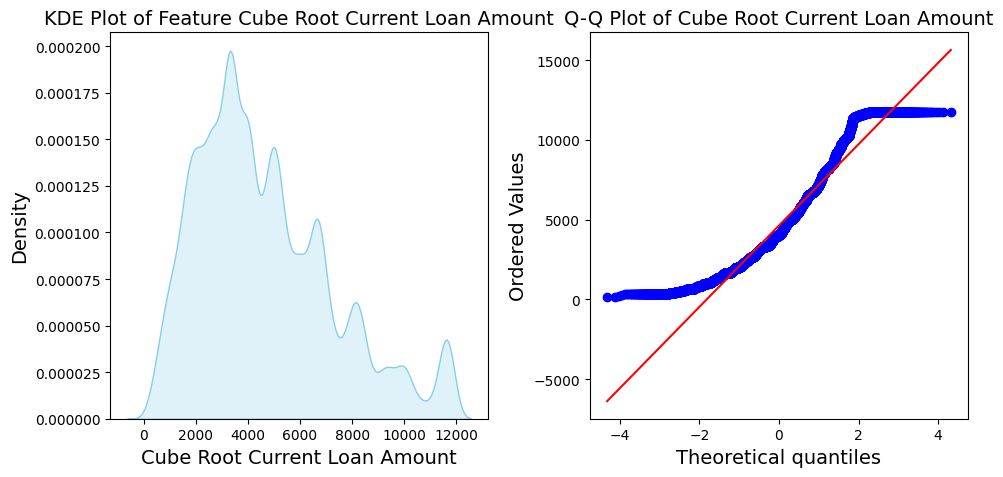

An error occurred: array must not contain infs or NaNs


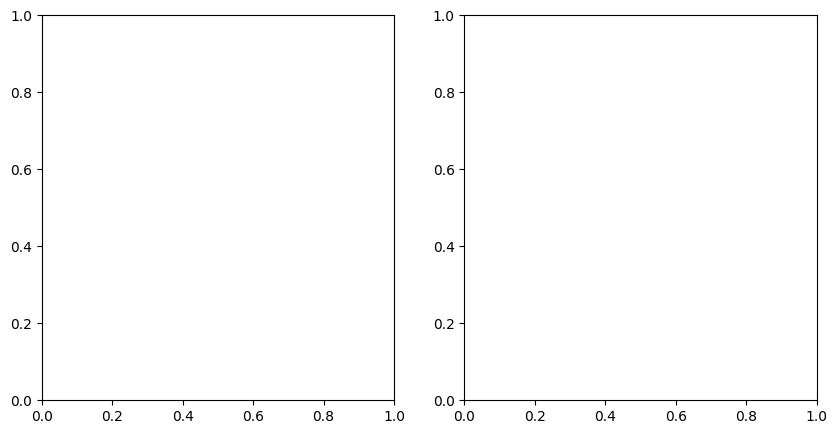

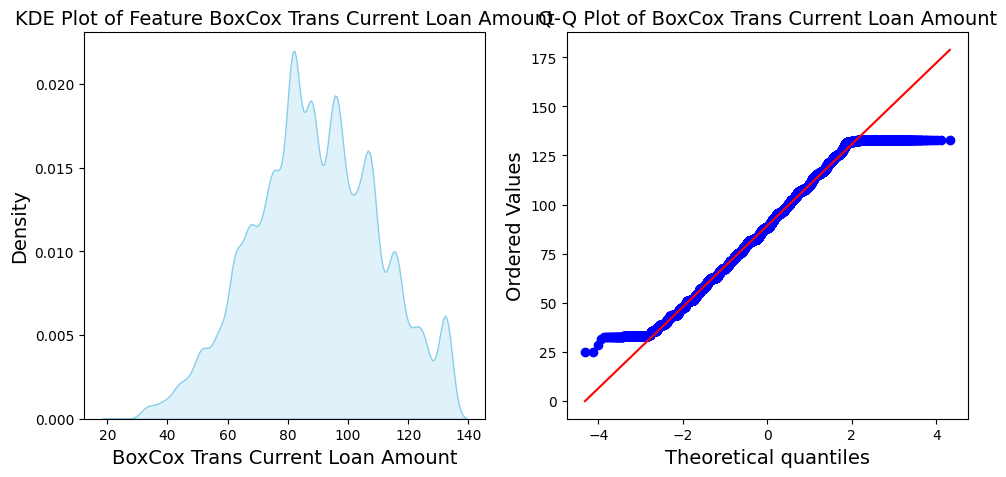

In [145]:
num_feature_transformation_identification(df_knn_imputed,'Current Loan Amount')

Insights :
- We will do BoxCox for 'Current Loan Amount'
- We will do BoxCox Transformation for 'Credit Score'
- We will do Log Transformation for 'Annual Income'
- We will do Square root Transformation for 'Monthly Debt'
- We will do Log Transformation for 'Years of Credit History'
- We will do Square root Transformation for 'Month since last delinquent'
- We will do Log Transformation for 'Number of Open Account'
- We will do Exponential Transformation for 'Number of Credit Problems'
- We will do Fifth root Transformation for 'Current Credit Balance'
- We will do Log Transformation for 'Maximum Open Credit'
- We will do Exponential Transformation for 'Bankruptcies'
- We will do Exponential Transformation for 'Tax Liens'

In [146]:
df_knn_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88910 entries, 0 to 88909
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Current Loan Amount                    88910 non-null  float64
 1   Credit Score                           88910 non-null  float64
 2   Annual Income                          88910 non-null  float64
 3   Monthly Debt                           88910 non-null  float64
 4   Years of Credit History                88910 non-null  float64
 5   Months since last delinquent           88910 non-null  float64
 6   Number of Open Accounts                88910 non-null  float64
 7   Number of Credit Problems              88910 non-null  float64
 8   Current Credit Balance                 88910 non-null  float64
 9   Maximum Open Credit                    88910 non-null  float64
 10  Bankruptcies                           88910 non-null  float64
 11  Ta

In [147]:
# Define the transformations for each column
transformations = {'Current Loan Amount': 'boxcox', 
                   'Credit Score': 'boxcox',
                     'Annual Income': 'log',
                     'Monthly Debt':'square_root',
                     'Years of Credit History':'log',
                     'Months since last delinquent':'square_root',
                     'Number of Open Accounts':'log',
                     'Number of Credit Problems':'exp',
                     'Current Credit Balance':'fifth_root',
                     'Maximum Open Credit':'log',
                     'Bankruptcies':'exp',
                     'Tax Liens':'exp',}


In [148]:
from scipy import stats
import numpy as np

def perform_feature_transformation(df, transformations):
    transformed_df = df.copy()  # Create a copy of the original DataFrame
    
    for column, transformation in transformations.items():
        try:
            if transformation == 'boxcox':
                # Apply Box-Cox transformation
                transformed_df['BoxCox Trans ' + column], lambda_param = stats.boxcox(df[column]+1)  # Adding 1 to avoid Zero Error
                
            elif transformation == 'log':
                # Apply log transformation
                transformed_df['Log Trans '+column] = np.log(df[column]+1)  # Adding 1 to avoid Zero Error
            
            elif transformation == 'exp':
                # Apply exponintial transformation
                transformed_df['Exp Trans '+column] = np.exp(df[column]+1)  # Adding 1 to avoid Zero Error
            
            elif transformation == 'square_root':
                # Apply square root transformation
                transformed_df['Square Root Trans '+column] = np.sqrt(df[column] + 1)  # Adding 1 to avoid Zero Error    
            
            elif transformation == 'fifth_root':
                # Apply fifth root transformation
                transformed_df['Fifth Root Trans '+column] = np.power(df[column] + 1, 1/5)  # Adding 1 to avoid Zero Error        
            
            else:
                print(f"Unknown transformation method '{transformation}' for column '{column}'")
                continue
            
            transformed_df = transformed_df.drop(column, axis=1)  # Drop the original column
            
        except ValueError as e:
            print(f"Error transforming column '{column}' with method '{transformation}': {e}")
    
    return transformed_df


In [149]:
# Perform feature transformation
df_transformed = perform_feature_transformation(df_knn_imputed, transformations)

In [150]:
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88910 entries, 0 to 88909
Data columns (total 17 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Log Trans Current Loan Amount                   88910 non-null  float64
 1   Log Base 10 Trans Current Loan Amount           88910 non-null  float64
 2   Square Root Current Loan Amount                 88910 non-null  float64
 3   Cube Root Current Loan Amount                   88910 non-null  float64
 4   Exp Trans Current Loan Amount                   88910 non-null  float64
 5   BoxCox Trans Current Loan Amount                88910 non-null  float64
 6   BoxCox Trans Credit Score                       88910 non-null  float64
 7   Log Trans Annual Income                         88910 non-null  float64
 8   Square Root Trans Monthly Debt                  88910 non-null  float64
 9   Log Trans Years of Credit History      

Pipeline for Combine Transformation

In [151]:
df_deep_copy_2 = df_duplicates_removed.copy(deep=True)

In [152]:
from sklearn.model_selection import train_test_split

X = df_deep_copy_2.drop(['Loan ID','Customer ID','Loan Status'], axis = 1)
y = df_deep_copy_2[['Loan Status']]

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [153]:
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.stats import mstats 
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from scipy import stats

class OutlierToNaNTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, variable, outlier_value):
        self.variable = variable
        self.outlier_value = outlier_value
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_transformed = X.copy()
        X_transformed.loc[X_transformed[self.variable] > self.outlier_value, self.variable] = np.nan
        return X_transformed
    
    def get_feature_names_out(self, input_features=None):
        return [f'{self.variable}'] 

class ReplaceValueTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, variable, value_to_replace, replacement_value):
        self.variable = variable
        self.value_to_replace = value_to_replace
        self.replacement_value = replacement_value
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_transformed = X.copy()
        X_transformed.loc[X_transformed[self.variable] == self.value_to_replace, self.variable] = self.replacement_value
        return X_transformed
    
    def get_feature_names_out(self, input_features=None):
        return [f'{self.variable}']

class RemoveEndZeroTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, variable):
        self.variable = variable
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_transformed = X.copy()
        X_transformed[self.variable] = np.where(X_transformed[self.variable] > 800, X_transformed[self.variable] / 10, X_transformed[self.variable])
        return X_transformed
    
    def get_feature_names_out(self, input_features=None):
        return [f'{self.variable}'] 
    
'''
class ImputeRandomeValuesCategoricalFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, variables):
        self.variables = variables
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_transformed = X.copy()
        for variable in self.variables:
            X_transformed[variable + '_random'] = X_transformed[variable]
            random_sample = X_transformed[variable].dropna().sample(X_transformed[variable].isnull().sum(), random_state=0)
            random_sample.index = X_transformed[X_transformed[variable].isnull()].index
            X_transformed.loc[X_transformed[variable].isnull(), variable + '_random'] = random_sample
        return X_transformed
    
    def get_feature_names_out(self, input_features=None):
        feature_names = []
        for variable in self.variables:
            # If input_features is None, return both original and imputed column names
            feature_names.append(variable)
            feature_names.append(f'{variable}_random')
            
        return feature_names
'''
class ImputeRandomeValuesCategoricalFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, variables):
        self.variables = variables

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_transformed = X.copy()
        for variable in self.variables:
            # Get indices of null values
            null_indices = X_transformed[variable].isnull().index  # Use to_numpy() for compatibility

            # Sample random values from non-null data (excluding duplicates)
            non_null_values = X_transformed[variable].dropna().unique()
            random_sample = np.random.choice(non_null_values, size=len(null_indices), replace=True)

            # Impute random values at null indices
            X_transformed.loc[null_indices, variable] = random_sample

        return X_transformed

    def get_feature_names_out(self, input_features=None):
        return self.variables  # Return only the original feature names
    

class PercentileCapper(BaseEstimator, TransformerMixin):
    def __init__(self, cols=None, from_low_end=0.1, from_high_end=0.01):
        self.cols = cols
        self.from_low_end = from_low_end
        self.from_high_end = from_high_end

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_transformed = X.copy()
        if self.cols is not None:
            for col_idx in self.cols:
                col = X[:, col_idx]
                X_transformed[:, col_idx] = mstats.winsorize(a=col, limits=(self.from_low_end, self.from_high_end),
                                                    inplace=False)
        return X_transformed
    
    def get_feature_names_out(self, input_features=None):
        return input_features


class PercentileCapperForDataFrame(BaseEstimator, TransformerMixin):
    def __init__(self, cols=None, from_low_end=0.1, from_high_end=0.01):
        self.cols = cols
        self.from_low_end = from_low_end
        self.from_high_end = from_high_end

    def fit(self, X, y=None):
        # No fitting necessary for this transformer
        return self

    def transform(self, X):
        X_transformed = X.copy()
        if self.cols is not None:
            for col_name in self.cols:
                X_transformed[col_name] = mstats.winsorize(a=X_transformed[col_name], limits=(self.from_low_end, self.from_high_end))
        return X_transformed
    
    def get_feature_names_out(self, input_features=None):
        if input_features is None:
            return None
        else:
            return input_features

class DropColumns(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.drop(columns=self.columns)

    def get_feature_names_out(self, input_features=None):
        if input_features is None:
            return None
        return [col for col in input_features if col not in self.columns]     
'''
class NumpyArrayToDataFrame(BaseEstimator, TransformerMixin):
    def __init__(self, column_names, index):
        self.column_names = column_names
        self.index = index
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return pd.DataFrame(X, columns=self.column_names, index=self.index)
    
    def get_feature_names_out(self):
        return self.column_names
'''
class NumpyArrayToDataFrame(BaseEstimator, TransformerMixin):
    def __init__(self, column_names):
        self.column_names = column_names
        
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return pd.DataFrame(X, columns=self.column_names)
    
    def get_feature_names_out(self):
        return self.column_names

class FeatureTransformationTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, transformations):
        self.transformations = transformations
        self.output_feature_names_ = None
    
    def fit(self, X, y=None):
        # No fitting necessary for this transformer
        return self
    
    def transform(self, X):
        transformed_X = X.copy()  # Create a copy of the original DataFrame
        self.output_feature_names_ = []  # Reset the output feature names
        
        for column, transformation in self.transformations.items():
            try:
                if transformation == 'boxcox':
                    # Apply Box-Cox transformation
                    transformed_col, lambda_param = stats.boxcox(X[:, column] + 1)  # Adding 1 to avoid Zero Error
                    transformed_X = np.column_stack((transformed_X, transformed_col))
                    self.output_feature_names_.append('BoxCox Trans ' + str(column))

                elif transformation == 'log':
                    # Apply log transformation
                    transformed_col = np.log(X[:, column] + 1)  # Adding 1 to avoid Zero Error
                    transformed_X = np.column_stack((transformed_X, transformed_col))
                    self.output_feature_names_.append('Log Trans ' + str(column))

                elif transformation == 'exp':
                    # Apply exponential transformation
                    transformed_col = np.exp(X[:, column] + 1)  # Adding 1 to avoid Zero Error
                    transformed_X = np.column_stack((transformed_X, transformed_col))
                    self.output_feature_names_.append('Exp Trans ' + str(column))

                elif transformation == 'square_root':
                    # Apply square root transformation
                    transformed_col = np.sqrt(X[:, column] + 1)  # Adding 1 to avoid Zero Error    
                    transformed_X = np.column_stack((transformed_X, transformed_col))
                    self.output_feature_names_.append('Square Root Trans ' + str(column))

                elif transformation == 'fifth_root':
                    # Apply fifth root transformation
                    transformed_col = np.power(X[:, column] + 1, 1/5)  # Adding 1 to avoid Zero Error        
                    transformed_X = np.column_stack((transformed_X, transformed_col))
                    self.output_feature_names_.append('Fifth Root Trans ' + str(column))

                else:
                    print(f"Unknown transformation method '{transformation}' for column '{column}'")
                    continue

            except ValueError as e:
                print(f"Error transforming column '{column}' with method '{transformation}': {e}")

        return transformed_X
    def get_feature_names_out(self, input_features=None):
        if input_features is None:
            return self.output_feature_names_
        else:
            # Generate feature names based on transformations
            feature_names = []
            for feature in input_features:
                for transformation in self.output_feature_names_:
                    feature_names.append(f'{feature}_{transformation}')
            return feature_names

class FeatureTransformationTransformerForDataframe(BaseEstimator, TransformerMixin):
    def __init__(self, transformations):
        self.transformations = transformations
        self.output_feature_names_ = None
    
    def fit(self, X, y=None):
        # No fitting necessary for this transformer
        return self
    
    def transform(self, X):
        transformed_X = X.copy()  # Create a copy of the original DataFrame
        self.output_feature_names_ = []  # Reset the output feature names
        
        for column, transformation in self.transformations.items():
            try:
                if transformation == 'boxcox':
                    # Apply Box-Cox transformation
                    transformed_col, lambda_param = stats.boxcox(X[column] + 1)  # Adding 1 to avoid Zero Error
                    transformed_X[column] = transformed_col  # Use the same column name
                    self.output_feature_names_.append('BoxCox Trans ' + str(column))

                elif transformation == 'log':
                    # Apply log transformation
                    transformed_col = np.log(X[column] + 1)  # Adding 1 to avoid Zero Error
                    transformed_X[column] = transformed_col  # Use the same column name
                    self.output_feature_names_.append('Log Trans ' + str(column))

                elif transformation == 'exp':
                    # Apply exponential transformation
                    transformed_col = np.exp(X[column] + 1)  # Adding 1 to avoid Zero Error
                    transformed_X[column] = transformed_col  # Use the same column name
                    self.output_feature_names_.append('Exp Trans ' + str(column))

                elif transformation == 'square_root':
                    # Apply square root transformation
                    transformed_col = np.sqrt(X[column] + 1)  # Adding 1 to avoid Zero Error    
                    transformed_X[column] = transformed_col  # Use the same column name
                    self.output_feature_names_.append('Square Root Trans ' + str(column))

                elif transformation == 'fifth_root':
                    # Apply fifth root transformation
                    transformed_col = np.power(X[column] + 1, 1/5)  # Adding 1 to avoid Zero Error        
                    transformed_X[column] = transformed_col  # Use the same column name
                    self.output_feature_names_.append('Fifth Root Trans ' + str(column))

                else:
                    print(f"Unknown transformation method '{transformation}' for column '{column}'")
                    continue

            except ValueError as e:
                print(f"Error transforming column '{column}' with method '{transformation}': {e}")

        return transformed_X
    
    def get_feature_names_out(self):
        if self.output_feature_names_ is None:
            return None
        else:
            return self.output_feature_names_
        
class NumericalColumnSelector(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X.select_dtypes(include=np.number)

# Custom transformer to select categorical columns
class CategoricalColumnSelector(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X.select_dtypes(exclude=np.number)

# Custom transformer to extract DataFrame index
class DataFrameIndexExtractor(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X.index



class OneHotEncoderWithFeatureNames(OneHotEncoder):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)

    def fit(self, X, y=None):
        super().fit(X)
        self.feature_names_out_ = self._get_feature_names_out()
        return self

    def _get_feature_names_out(self):
        categories = self.categories_
        feature_names_out = []
        for i, categories_i in enumerate(categories):
            for category in categories_i:
                feature_names_out.append(f'{self.categories_[i]}_{category}')
        return feature_names_out

    def transform(self, X):
        X_transformed = super().transform(X)
        return X_transformed

    def get_feature_names_out(self):
        return self.feature_names_out_



In [154]:
def find_null_columns_by_dtype(df):
    # Initialize lists to store column names
    categorical_null_columns = []
    numerical_null_columns = []

    # Iterate over columns
    for column in df.columns:
        # Check if the column has null values
        if df[column].isnull().any():
            # Check if the column is categorical
            if df[column].dtype == 'object':
                categorical_null_columns.append(column)
            else:
                numerical_null_columns.append(column)

    return categorical_null_columns, numerical_null_columns

Finding Columns which have null values and segregation it with data type

In [155]:
X_train.shape

(71128, 16)

In [156]:

categorical_null_columns, numerical_null_columns = find_null_columns_by_dtype(X_train)
print("Categorical columns with null values:", categorical_null_columns)
print("Numerical columns with null values:", numerical_null_columns)


Categorical columns with null values: ['Years in current job']
Numerical columns with null values: ['Credit Score', 'Annual Income', 'Monthly Debt', 'Months since last delinquent', 'Maximum Open Credit', 'Bankruptcies', 'Tax Liens']


In [157]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import mstats 
import numpy as np
# Define the outlier columns list
outlier_columns_list = ['Annual Income','Monthly Debt',
                        'Years of Credit History','Months since last delinquent',
                        'Current Credit Balance', 'Maximum Open Credit']
# Define your preprocessing pipeline 1
column_transformation_pipeline_1 = Pipeline([
    ('outlier_to_nan', OutlierToNaNTransformer('Current Loan Amount', 99999998)),
    ('remove_end_zero', RemoveEndZeroTransformer('Credit Score')),
    ('replace_value', ReplaceValueTransformer('Purpose', 'other', 'Other')),
    ('impute_random_varibales', ImputeRandomeValuesCategoricalFeatures(categorical_null_columns)),
    
])

# Fit and transform the data using preprocessing pipeline 1
preprocessing_1 = column_transformation_pipeline_1.fit_transform(X_train)

numerical_features_preprocessing_1 = [feature for feature in preprocessing_1.columns if preprocessing_1[feature].dtype !='O']
categorical_features_preprocessing_1 = [feature for feature in preprocessing_1.columns if preprocessing_1[feature].dtype =='O']
X_train_index = X_train.index

num_pipeline = Pipeline([
    ('num_null_imputation',KNNImputer()),
    ('numpy_to_dataframe', NumpyArrayToDataFrame(column_names=numerical_features)),
    ('percentile_capper', PercentileCapperForDataFrame(outlier_columns_list,from_low_end=0.0,from_high_end=0.01)),
    ('num_feature_transformation', FeatureTransformationTransformerForDataframe(transformations=transformations)),
    ('num_feature_scaling', StandardScaler()),
])

cat_pipeline = Pipeline([
    ('cat_feature_scaling', OneHotEncoderWithFeatureNames()),
])

preprocessing_pipeline = ColumnTransformer([
    ('numerical_preprocessing', num_pipeline, numerical_features_preprocessing_1),
    ('categorical_preprocessing', cat_pipeline, categorical_features_preprocessing_1),
])

# Combine numerical and categorical transformations using ColumnTransformer

preprocessed_data = preprocessing_pipeline.fit_transform(preprocessing_1)

# Separate transformed numerical and categorical data
transformed_numerical_data = preprocessed_data[:, :len(numerical_features_preprocessing_1)]
transformed_categorical_data = preprocessed_data[:, len(numerical_features_preprocessing_1):]

# Get column names for transformed numerical and categorical data

def get_scaler_names(scaler, input_features):
  """
  Generates output feature names for transformers without get_feature_names_out()
  """
  return [f"{name}_scaled" for name in input_features]

transformed_numerical_column_names = get_scaler_names(preprocessing_pipeline.named_transformers_['numerical_preprocessing'].steps[-1][1], numerical_features_preprocessing_1)
transformed_categorical_column_names = preprocessing_pipeline.named_transformers_['categorical_preprocessing'].steps[-1][1].get_feature_names_out()

# Combine column names for numerical and categorical data
all_column_names = list(transformed_numerical_column_names) + list(transformed_categorical_column_names)

# Convert transformed numerical and categorical data arrays to DataFrame
transformed_numerical_df = pd.DataFrame(transformed_numerical_data, columns=transformed_numerical_column_names)
transformed_categorical_df = pd.DataFrame(transformed_categorical_data, columns=transformed_categorical_column_names)

# Concatenate numerical and categorical DataFrames along columns to get the final preprocessed DataFrame
preprocessed_df = pd.concat([transformed_numerical_df, transformed_categorical_df], axis=1)


In [158]:
from sklearn.preprocessing import LabelEncoder

# Encode target variable (assuming it's a string or categorical type)
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

y_train_encoded_df = pd.DataFrame(y_train_encoded)

Creating Test Pipeline

In [159]:
# Fit and transform the data using preprocessing pipeline 1
test_preprocessing_df = column_transformation_pipeline_1.transform(X_test)
X_test_preprocessed = preprocessing_pipeline.transform(test_preprocessing_df)

y_test_preprocessed = le.transform(y_test)

In [160]:
from collections import Counter
from imblearn.over_sampling import SMOTE

# Print initial class distribution
print("Initial class distribution:", Counter(y_train_encoded))

# Define and fit SMOTE object
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(preprocessed_data, y_train_encoded)

# Print resampled class distribution
print("Resampled class distribution:", Counter(y_resampled))

# Now you can use X_resampled and y_resampled for your machine learning model


Initial class distribution: Counter({0: 51006, 1: 20122})


Resampled class distribution: Counter({0: 51006, 1: 51006})


In [161]:
#We will split traiining set in Training and validating set

X_train_preprocessed,X_validation,y_train_preprocessed,y_validation = train_test_split(X_resampled, y_resampled,test_size=0.1,random_state=42)

In [162]:
print("Initial class distribution:", Counter(y_train_preprocessed))
print("Initial class distribution:", Counter(y_validation))

Initial class distribution: Counter({1: 46035, 0: 45775})
Initial class distribution: Counter({0: 5231, 1: 4971})


In [163]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train_preprocessed, y_train_preprocessed)

SGDClassifier(random_state=42)

In [164]:
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn import metrics

def truncate_model_name(model_name):
  """
  Truncates a model name up to the first comma (',').

  Args:
      model_name: The model name to truncate.

  Returns:
      str: The truncated model name (up to the comma) or the original name if no comma exists.
  """

  if '(' in model_name:
    return model_name.split('(')[0]  # Get the part before the comma
  else:
    return model_name
'''
def truncate_model_name(model_name, max_length=30):
    if len(model_name) > max_length:
        return model_name[:max_length] + "..."
    else:
        return model_name
'''
def truncate_label(label, max_length=25):
  """Truncates a label to a specified length with ellipsis (...)"""
  if len(label) > max_length:
    return label[:max_length] + "..."
  else:
    return label
  
def classifier_evaluation_function(model_name,X,y):
    
    model_name_str = str(model_name)
    truncated_name = truncate_label(str(model_name))

    accuracy_model = cross_val_score(model_name, X, y, cv=3, scoring="accuracy").mean()
    print(f'Accuracy for Model {model_name} is {accuracy_model}')

    
    dummy_clf = DummyClassifier()
    dummy_clf.fit(X, y)
    accuracy_dummy = cross_val_score(dummy_clf, X, y, cv=3, scoring="accuracy").mean()
    print(f'\nAccuracy for Model {dummy_clf} is {accuracy_dummy}')

    
    y_train_pred = cross_val_predict(model_name, X, y, cv=3)

    confusionmatrix = confusion_matrix(y, y_train_pred)
    print(f'\nConfusion Matrix for Model {model_name} is \n{confusionmatrix}')
    
    y_train_pred = cross_val_predict(model_name, X, y, cv=3)
    
    if hasattr(model_name, 'decision_function'):
        # Precision-Recall Curve
        y_scores = cross_val_predict(model_name, X, y, cv=3, method="decision_function")
        precisions, recalls, thresholds = precision_recall_curve(y, y_scores)
    else:
        print(f"Model {model_name} does not support decision_function method.")
        
        y_proba = model_name.predict_proba(X)[:, 1]  # Probability of positive class
        precisions, recalls, thresholds = precision_recall_curve(y, y_proba)


    # ROC Curve
    y_pred = model_name.predict(X)  # Assuming model_name has predict method
    y_score = model_name.predict_proba(X)[:, 1] if hasattr(model_name, 'predict_proba') else y_scores  # Handle models without predict_proba
    fpr, tpr, thresholds_roc = metrics.roc_curve(y, y_score, drop_intermediate=False, pos_label=1)

    # Plotting all three graphs in a single line
    plt.figure(figsize=(15, 4))  # Adjust width as needed
    plt.subplot(1, 3, 1)  # Precision-Recall on first subplot
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.title(f'Precision & Recall vs Threshold -\n {truncate_model_name(model_name_str)}')
    plt.grid()
    plt.xlabel("Threshold")
    plt.legend(loc="center right")

    plt.subplot(1, 3, 2)  # ROC Curve on second subplot
    plt.plot(fpr, tpr, label=f'{model_name} ROC')
    plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
    plt.title(f'ROC curve -\n {truncate_model_name(model_name_str)}')
    plt.ylabel('Recall/Sensitivity')
    plt.xlabel('Fall-out/Specificity')
    plt.grid()
    plt.legend(loc="lower right", fontsize=10,labels=[truncated_name,"Random classifier's ROC curve"])

    plt.subplot(1, 3, 3)  # Precision-Recall on third subplot
    plt.plot(recalls, precisions, linewidth=2, label=model_name)
    plt.title(f'Precision/Recall curve -\n {truncate_model_name(model_name_str)}')
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.axis([0, 1, 0, 1])
    plt.grid()
    plt.legend(loc="lower left",labels=[truncated_name])

    plt.tight_layout()  # Adjust spacing between subplots
    plt.show()


    precision = precision_score(y, y_pred)

    recall = recall_score(y, y_pred)

    f1 = f1_score(y, y_pred)

    print(f'\nPrecision Score of Model {model_name} is {precision}')
    print(f'\nRecall Score of Model {model_name} is {recall}')
    print(f'\nF1 Score of Model {model_name} is {f1}')

import os
import pickle

def read_pickle_files(folder_name,sub_folder_name):
  """
  Reads all pickle files from a folder and stores them in a dictionary.

  Args:
      folder_path: The path to the folder containing the pickle files.

  Returns:
      dict: A dictionary where keys are filenames (without extension) and values are the loaded objects.
  """

  data_dict = {}
  current_working_dir = %pwd
  full_folder_path = os.path.join(current_working_dir, folder_name)
  full_sub_folder_path = os.path.join(full_folder_path, sub_folder_name)
  for filename in os.listdir(full_sub_folder_path):
    if filename.endswith(".pkl"):
      file_path = os.path.join(full_sub_folder_path, filename)
      with open(file_path, "rb") as f:
        data_dict[filename.split(".")[0]] = pickle.load(f)

  return data_dict

import os
import pickle

def save_model_as_pickle(model, sub_folder_name):
  """
  Saves a model as a pickle file in a specified artifact folder, creating the folder if necessary.

  Args:
      model: The trained model object to be saved.
      folder_name: The name of the subfolder to create within the artifact folder.
      
  Returns:
      str: The full path to the saved pickle file.
  """
  # Combine artifact folder path and folder name to create the full artifact folder path
  current_working_dir = %pwd
  folder_name = 'artifact'
  full_folder_path = os.path.join(current_working_dir, folder_name)
  full_sub_folder_path = os.path.join(full_folder_path, sub_folder_name)

  # Create the artifact folder (including subfolder) if it doesn't exist
  if not os.path.exists(full_sub_folder_path):
    os.makedirs(full_sub_folder_path)

  # Combine full artifact folder path and filename to create the full path for the pickle file
  model_filename = truncate_model_name(str(model))+'.pkl'
  pickle_path = os.path.join(full_sub_folder_path, model_filename)

  # Save model as pickle file
  with open(pickle_path, "wb") as f:
    pickle.dump(model, f)

  return pickle_path


import pandas as pd

def tuning_threshold_2_get_high_precision(model, X_train, y_train, threshold_range=(0.1, 0.9, 0.05)):
  """
  Tunes the threshold for a logistic regression model and analyzes performance metrics.

  Args:
      model: Trained logistic regression model.
      X_train: Training data features.
      y_train: Training data labels.
      threshold_range: Tuple defining the minimum, maximum, and step size for thresholds (default: (0.1, 0.9, 0.01)).

  Returns:
      A pandas DataFrame containing the results:
          'threshold': Evaluated thresholds.
          'precision': Precision scores for each threshold.
          'roc_auc'  : Evaluate Area Under the curv for ROC.
                       It summarizes the model's overall ability to distinguish between classes.
                       A higher AUC indicates better performance:
                       An AUC of 1 represents a perfect model that can flawlessly distinguish positive and negative cases.
                       An AUC of 0.5 represents a random model, no better than chance.
  """

  # Get predictions and probabilities
  y_pred = model.predict(X_train)
  y_proba = model.predict_proba(X_train)[:, 1]

  # Define thresholds
  thresholds = np.arange(*threshold_range)

  # Evaluate metrics for different thresholds
  data = []
  for threshold in thresholds:
    y_pred_thresh = (y_proba >= threshold).astype(int)
    fpr, tpr, _ =  roc_curve(y_train, y_pred_thresh)
    roc_auc = auc(fpr, tpr)
    data.append({
        'threshold': threshold,
        'precision': precision_score(y_train, y_pred_thresh),
        'roc_auc' : roc_auc
    })

  # Create DataFrame with desired columns
  df = pd.DataFrame(data, columns=['threshold', 'precision','roc_auc'])

  # Return DataFrame
  return df  


Accuracy for Model SGDClassifier(random_state=42) is 0.6258033107862965

Accuracy for Model DummyClassifier() is 0.501415967878475

Confusion Matrix for Model SGDClassifier(random_state=42) is 
[[27907 17868]
 [16487 29548]]


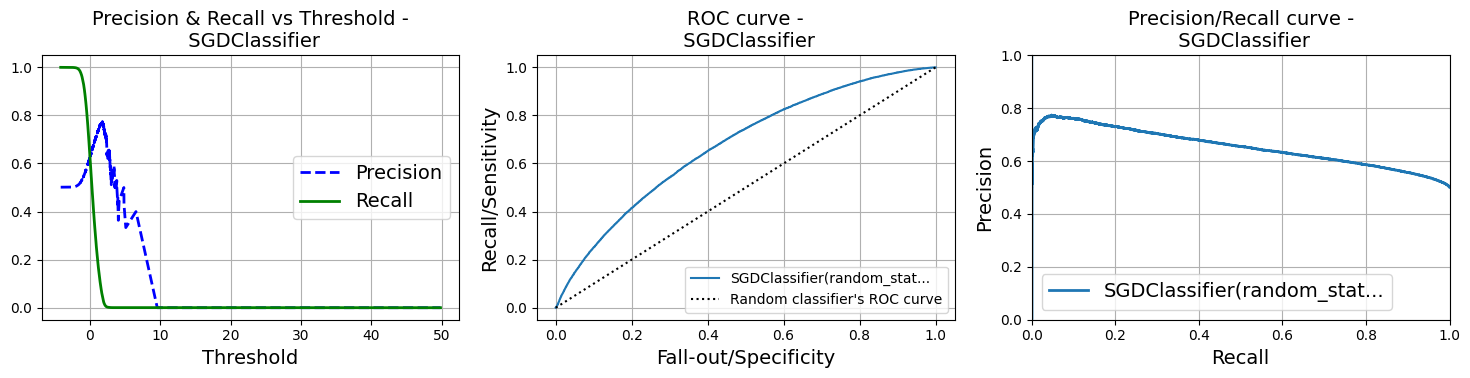


Precision Score of Model SGDClassifier(random_state=42) is 0.6202176274103978

Recall Score of Model SGDClassifier(random_state=42) is 0.6574562832627349

F1 Score of Model SGDClassifier(random_state=42) is 0.6382942826412469


In [165]:
classifier_evaluation_function(sgd_clf,X_train_preprocessed,y_train_preprocessed)

In [166]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_preprocessed, y_train_preprocessed)

LogisticRegression(random_state=42)

Accuracy for Model LogisticRegression(random_state=42) is 0.628188670435013

Accuracy for Model DummyClassifier() is 0.501415967878475

Confusion Matrix for Model LogisticRegression(random_state=42) is 
[[29169 16606]
 [17530 28505]]


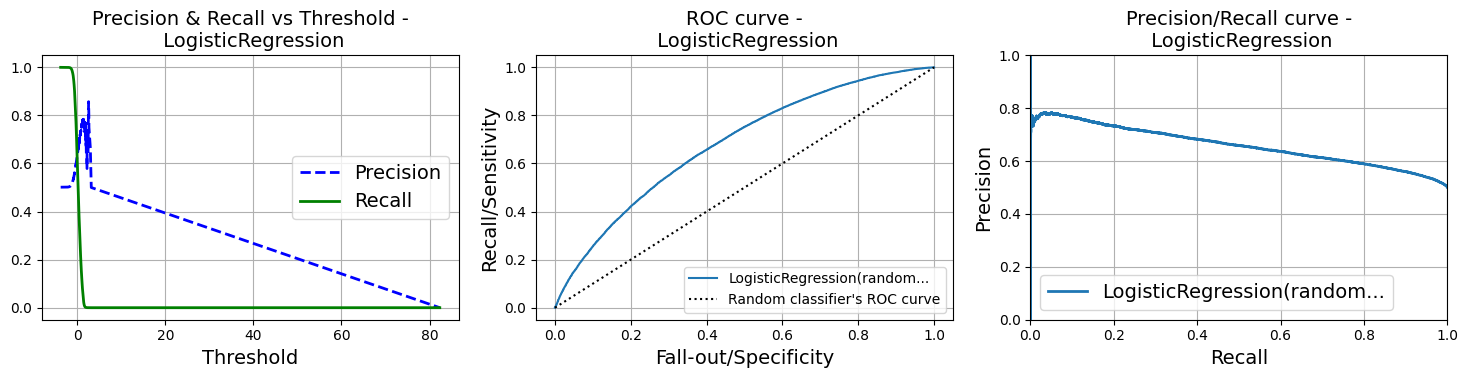


Precision Score of Model LogisticRegression(random_state=42) is 0.6328111130836144

Recall Score of Model LogisticRegression(random_state=42) is 0.6194634517215163

F1 Score of Model LogisticRegression(random_state=42) is 0.6260661478172099


In [167]:
classifier_evaluation_function(log_reg,X_train_preprocessed,y_train_preprocessed)

In [168]:
from sklearn.svm import LinearSVC

svm_clf_linear = LinearSVC(random_state=42)
svm_clf_linear.fit(X_train_preprocessed,y_train_preprocessed)

LinearSVC(random_state=42)

Accuracy for Model LinearSVC(random_state=42) is 0.6279817272326662

Accuracy for Model DummyClassifier() is 0.501415967878475

Confusion Matrix for Model LinearSVC(random_state=42) is 
[[29234 16541]
 [17614 28421]]


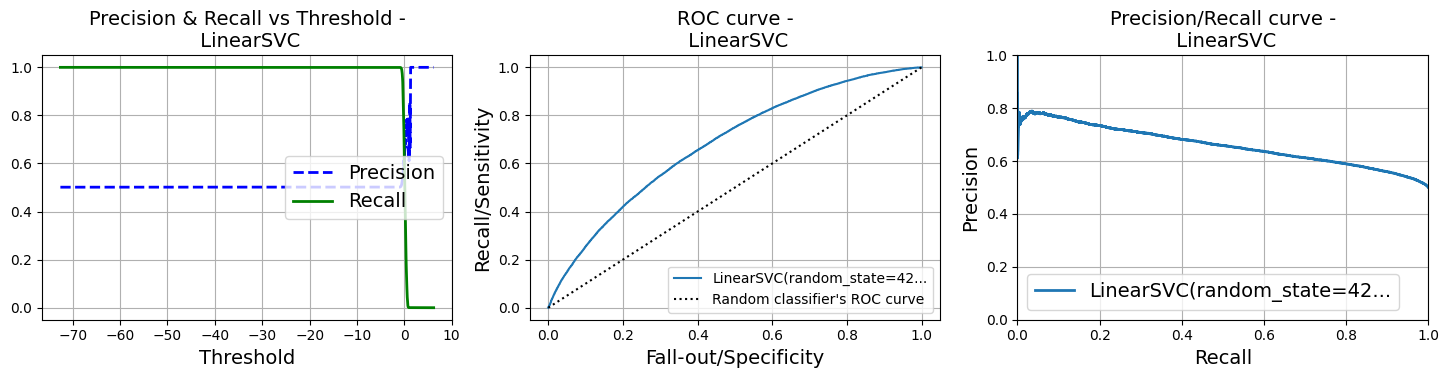


Precision Score of Model LinearSVC(random_state=42) is 0.6332398004632104

Recall Score of Model LinearSVC(random_state=42) is 0.6176821983273596

F1 Score of Model LinearSVC(random_state=42) is 0.6253642551600523


In [169]:
classifier_evaluation_function(svm_clf_linear,X_train_preprocessed,y_train_preprocessed)

In [170]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=5, random_state=42)

tree_clf.fit(X_train_preprocessed,y_train_preprocessed)

DecisionTreeClassifier(max_depth=5, random_state=42)

Accuracy for Model DecisionTreeClassifier(max_depth=5, random_state=42) is 0.6336565033816385

Accuracy for Model DummyClassifier() is 0.501415967878475

Confusion Matrix for Model DecisionTreeClassifier(max_depth=5, random_state=42) is 
[[29709 16066]
 [17568 28467]]
Model DecisionTreeClassifier(max_depth=5, random_state=42) does not support decision_function method.


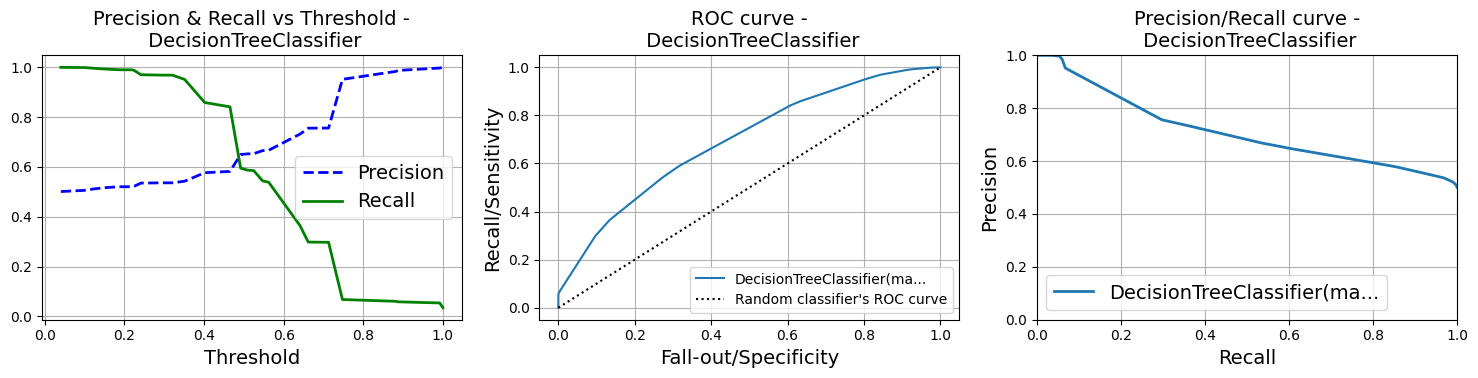


Precision Score of Model DecisionTreeClassifier(max_depth=5, random_state=42) is 0.6526849282007964

Recall Score of Model DecisionTreeClassifier(max_depth=5, random_state=42) is 0.5874660584338004

F1 Score of Model DecisionTreeClassifier(max_depth=5, random_state=42) is 0.6183605807705499


In [171]:
classifier_evaluation_function(tree_clf,X_train_preprocessed,y_train_preprocessed)

In [172]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100,max_leaf_nodes=10,n_jobs=-1,random_state=42)

random_forest.fit(X_train_preprocessed,y_train_preprocessed)

RandomForestClassifier(max_leaf_nodes=10, n_jobs=-1, random_state=42)

Accuracy for Model RandomForestClassifier(max_leaf_nodes=10, n_jobs=-1, random_state=42) is 0.656758583696729

Accuracy for Model DummyClassifier() is 0.501415967878475

Confusion Matrix for Model RandomForestClassifier(max_leaf_nodes=10, n_jobs=-1, random_state=42) is 
[[30753 15022]
 [16491 29544]]
Model RandomForestClassifier(max_leaf_nodes=10, n_jobs=-1, random_state=42) does not support decision_function method.


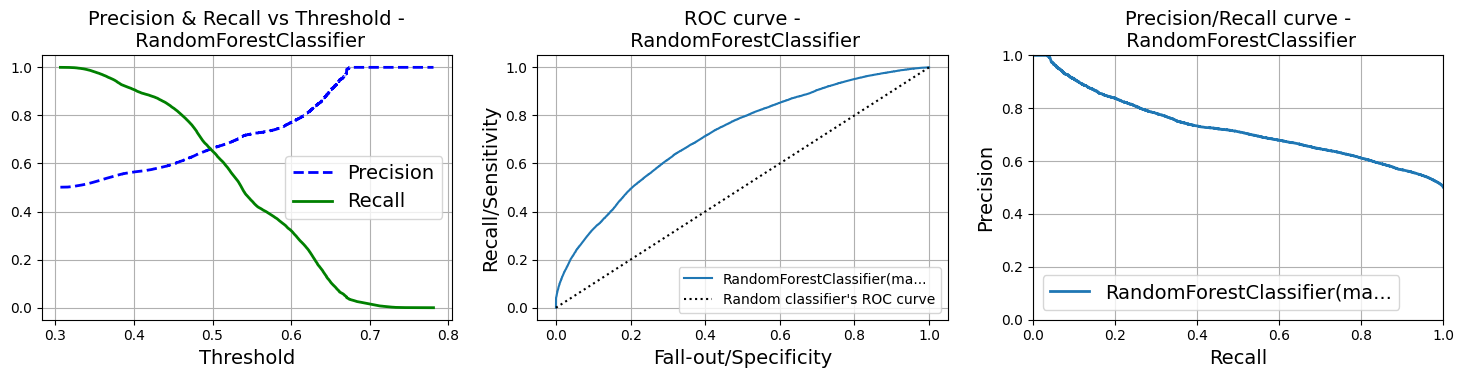


Precision Score of Model RandomForestClassifier(max_leaf_nodes=10, n_jobs=-1, random_state=42) is 0.6632181621239251

Recall Score of Model RandomForestClassifier(max_leaf_nodes=10, n_jobs=-1, random_state=42) is 0.6517215162376453

F1 Score of Model RandomForestClassifier(max_leaf_nodes=10, n_jobs=-1, random_state=42) is 0.6574195810325183


In [173]:
classifier_evaluation_function(random_forest,X_train_preprocessed,y_train_preprocessed)

Hyperparameter Tuning For Logistic Regression Classifier

In [174]:
from sklearn.model_selection import GridSearchCV


# Define the hyperparameter grid
param_grid_log_reg = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs', 'saga']
}

# Create a GridSearchCV object
grid_search_log_reg = GridSearchCV(log_reg, param_grid_log_reg, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search_log_reg.fit(X_train_preprocessed,y_train_preprocessed)

# Get the best model and best parameters
best_model_log_reg = grid_search_log_reg.best_estimator_
best_params_log_reg = grid_search_log_reg.best_params_

Accuracy for Model LogisticRegression(C=10, penalty='l1', random_state=42, solver='liblinear') is 0.6281777803921283

Accuracy for Model DummyClassifier() is 0.501415967878475

Confusion Matrix for Model LogisticRegression(C=10, penalty='l1', random_state=42, solver='liblinear') is 
[[29166 16609]
 [17528 28507]]


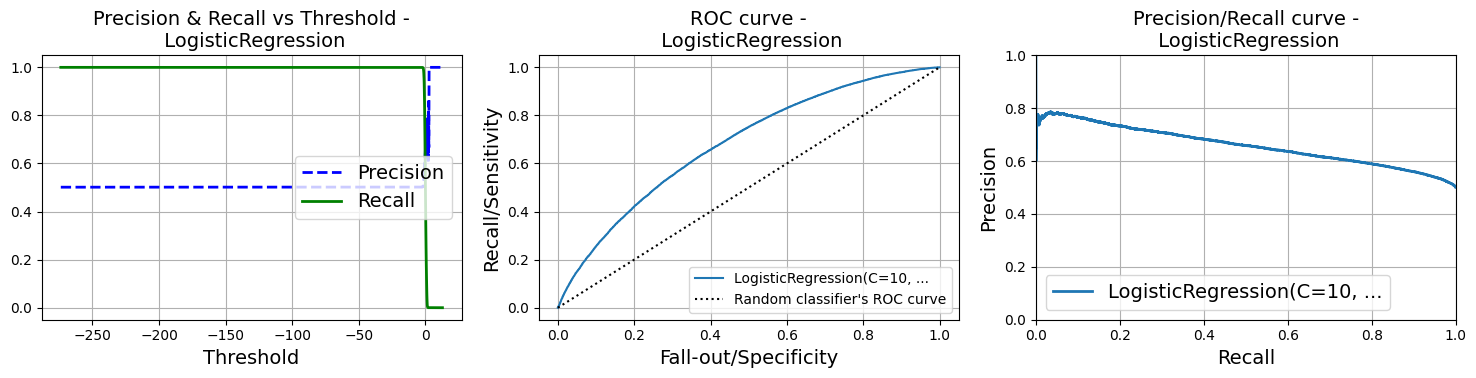


Precision Score of Model LogisticRegression(C=10, penalty='l1', random_state=42, solver='liblinear') is 0.6328549564137258

Recall Score of Model LogisticRegression(C=10, penalty='l1', random_state=42, solver='liblinear') is 0.6197675681546649

F1 Score of Model LogisticRegression(C=10, penalty='l1', random_state=42, solver='liblinear') is 0.6262428938299788


In [175]:
classifier_evaluation_function(best_model_log_reg,X_train_preprocessed,y_train_preprocessed)

Accuracy for Model LogisticRegression(C=10, penalty='l1', random_state=42, solver='liblinear') is 0.6277196153380494

Accuracy for Model DummyClassifier() is 0.5127425901263182



Confusion Matrix for Model LogisticRegression(C=10, penalty='l1', random_state=42, solver='liblinear') is 
[[3495 1736]
 [2062 2909]]


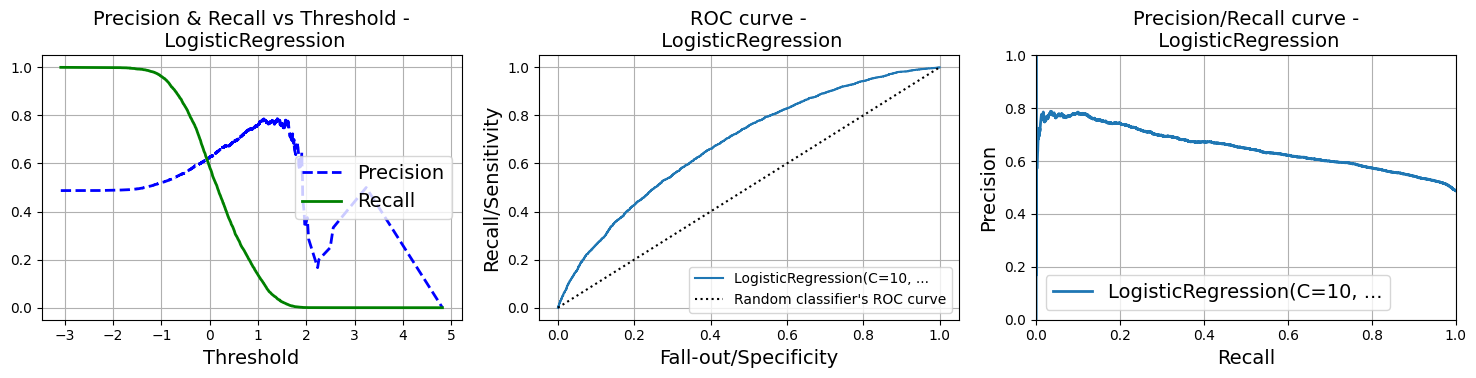


Precision Score of Model LogisticRegression(C=10, penalty='l1', random_state=42, solver='liblinear') is 0.6208080808080808

Recall Score of Model LogisticRegression(C=10, penalty='l1', random_state=42, solver='liblinear') is 0.6181854757594045

F1 Score of Model LogisticRegression(C=10, penalty='l1', random_state=42, solver='liblinear') is 0.6194940026207036


In [176]:
#Lets test with validation set for the tuned logistic regression model
classifier_evaluation_function(best_model_log_reg,X_validation,y_validation)

Hyperparameter Tuning For SGD Classifier

In [177]:
param_grid_sgd_clf = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0],
    'loss': ['hinge', 'log'],
    'penalty': ['l2']
}

grid_search_sgd_clf = GridSearchCV(sgd_clf, param_grid_sgd_clf, cv=5, scoring='accuracy')
grid_search_sgd_clf.fit(X_train_preprocessed, y_train_preprocessed)

best_parameters_sgd_clf = grid_search_sgd_clf.best_params_
best_model_sgd_clf = grid_search_sgd_clf.best_estimator_

Accuracy for Model SGDClassifier(alpha=0.01, random_state=42) is 0.6264895020050655

Accuracy for Model DummyClassifier() is 0.501415967878475

Confusion Matrix for Model SGDClassifier(alpha=0.01, random_state=42) is 
[[29280 16495]
 [17797 28238]]


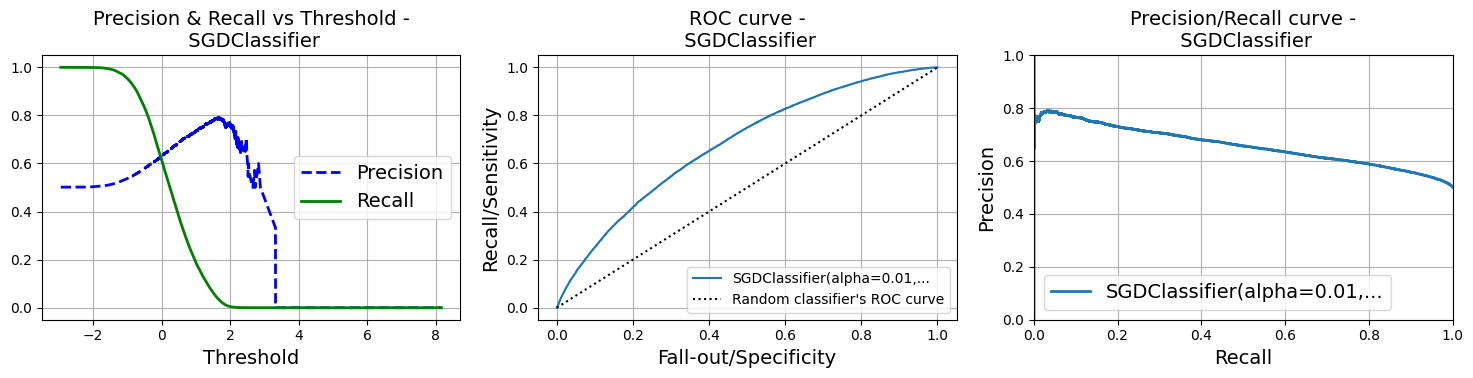


Precision Score of Model SGDClassifier(alpha=0.01, random_state=42) is 0.6356336955769364

Recall Score of Model SGDClassifier(alpha=0.01, random_state=42) is 0.598435972629521

F1 Score of Model SGDClassifier(alpha=0.01, random_state=42) is 0.6164742212674543


In [178]:
classifier_evaluation_function(best_model_sgd_clf,X_train_preprocessed,y_train_preprocessed)

Accuracy for Model SGDClassifier(alpha=0.01, random_state=42) is 0.6256617142593586

Accuracy for Model DummyClassifier() is 0.5127425901263182

Confusion Matrix for Model SGDClassifier(alpha=0.01, random_state=42) is 
[[3718 1513]
 [2306 2665]]


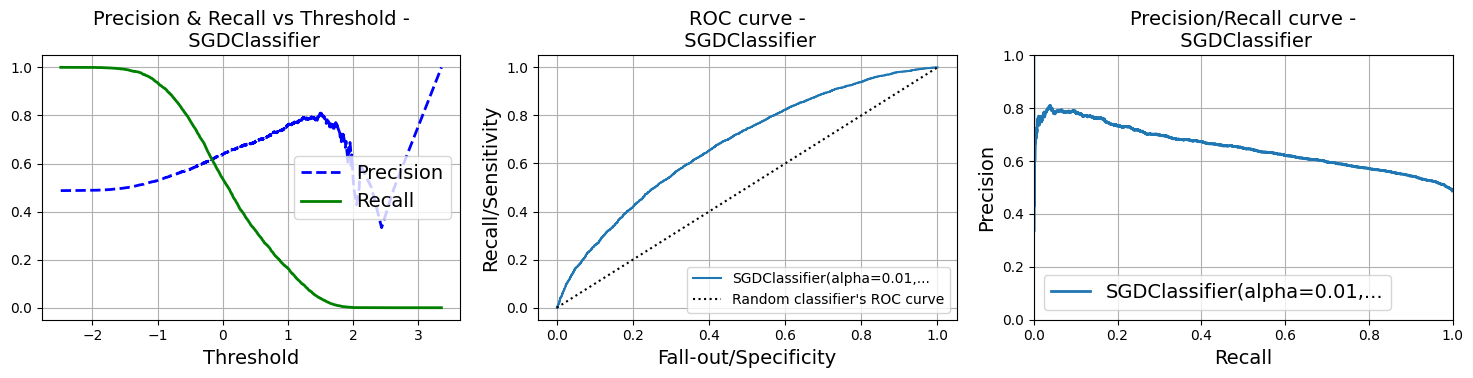


Precision Score of Model SGDClassifier(alpha=0.01, random_state=42) is 0.6253414582895567

Recall Score of Model SGDClassifier(alpha=0.01, random_state=42) is 0.5986722993361496

F1 Score of Model SGDClassifier(alpha=0.01, random_state=42) is 0.611716341212744


In [179]:
#Lets test with validation set for the tuned SGD Classifier model
classifier_evaluation_function(best_model_sgd_clf,X_validation,y_validation)

Hyperparameter Tuning For SVM Classifier

In [180]:
param_grid_svm_clf_linear = {
    'C': [0.001, 0.01, 0.1, 1.0, 10.0],
    'loss': ['hinge', 'squared_hinge'],
    'penalty': ['l2']
}

grid_search_svm_clf_linear = GridSearchCV(svm_clf_linear, param_grid_svm_clf_linear, cv=5, scoring='accuracy')
grid_search_svm_clf_linear.fit(X_train_preprocessed, y_train_preprocessed)

best_parameters_svm_clf_linear = grid_search_svm_clf_linear.best_params_
best_model_svm_clf_linear = grid_search_svm_clf_linear.best_estimator_

Accuracy for Model LinearSVC(random_state=42) is 0.6270333696548306

Accuracy for Model DummyClassifier() is 0.5127425901263182

Confusion Matrix for Model LinearSVC(random_state=42) is 
[[3504 1727]
 [2078 2893]]


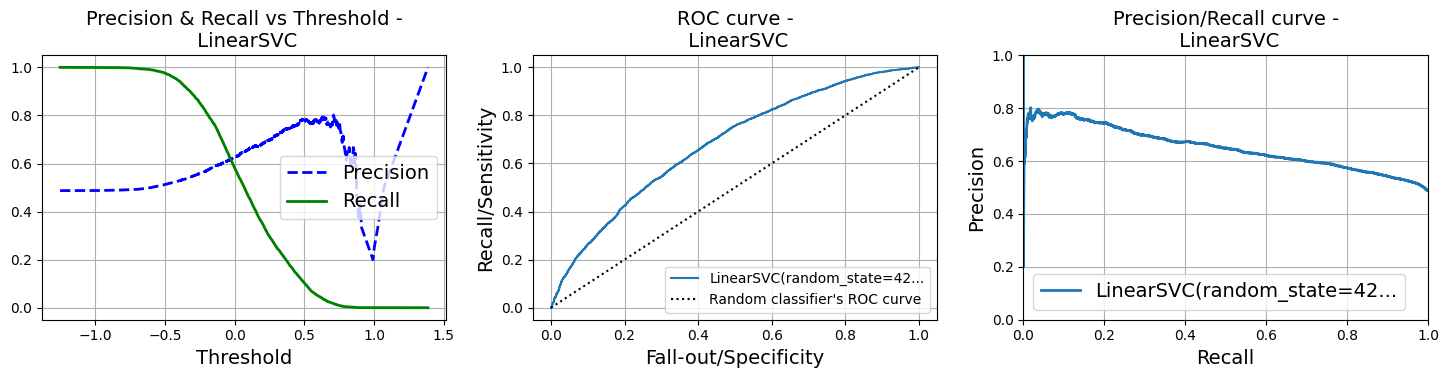


Precision Score of Model LinearSVC(random_state=42) is 0.621676476557743

Recall Score of Model LinearSVC(random_state=42) is 0.616173808086904

F1 Score of Model LinearSVC(random_state=42) is 0.6189129116993333


In [181]:
classifier_evaluation_function(best_model_svm_clf_linear,X_validation,y_validation)

Hyperparameter Tuning For Decision Tree Classifier

In [182]:
param_grid_tree_clf = {
    'max_depth': [3, 5, 7, 10, 15],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 3, 5],
    'criterion': ['gini', 'entropy']
}

grid_search_tree_clf = GridSearchCV(tree_clf, param_grid_tree_clf, cv=5, scoring='accuracy')
grid_search_tree_clf.fit(X_train_preprocessed, y_train_preprocessed)

best_parameters_tree_clf = grid_search_tree_clf.best_params_
best_model_tree_clf = grid_search_tree_clf.best_estimator_

Accuracy for Model DecisionTreeClassifier(max_depth=15, min_samples_split=5, random_state=42) is 0.6178197300678577

Accuracy for Model DummyClassifier() is 0.5127425901263182



Confusion Matrix for Model DecisionTreeClassifier(max_depth=15, min_samples_split=5, random_state=42) is 
[[3446 1785]
 [2114 2857]]
Model DecisionTreeClassifier(max_depth=15, min_samples_split=5, random_state=42) does not support decision_function method.


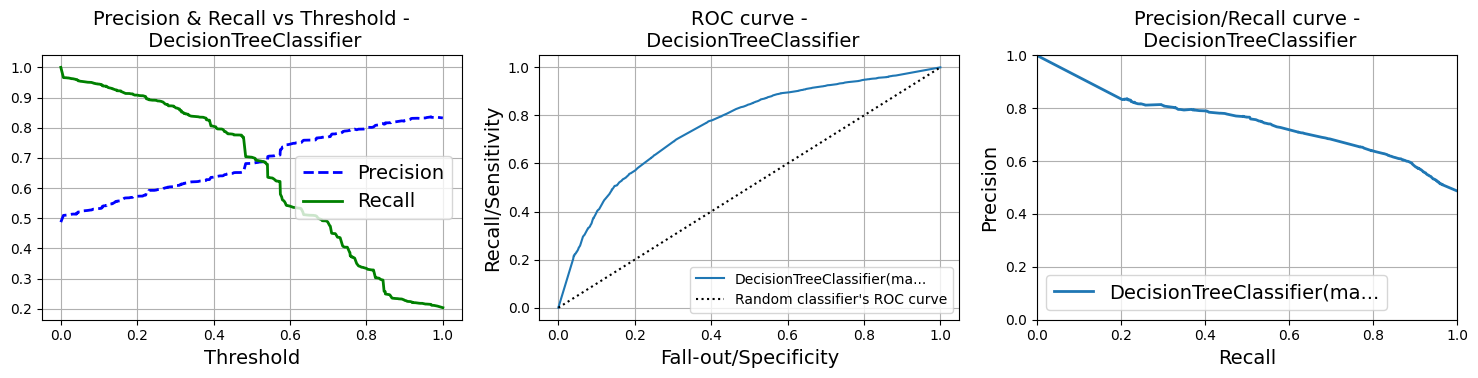


Precision Score of Model DecisionTreeClassifier(max_depth=15, min_samples_split=5, random_state=42) is 0.6834546527641157

Recall Score of Model DecisionTreeClassifier(max_depth=15, min_samples_split=5, random_state=42) is 0.6988533494266748

F1 Score of Model DecisionTreeClassifier(max_depth=15, min_samples_split=5, random_state=42) is 0.691068231549632


In [183]:
classifier_evaluation_function(best_model_tree_clf,X_validation,y_validation)

Hyperparameter Tuning For Random Forest Classifier

In [184]:
param_grid_random_forest = {
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}

grid_search_random_forest = GridSearchCV(random_forest, param_grid_random_forest, cv=5, scoring='accuracy')

grid_search_random_forest.fit(X_train_preprocessed, y_train_preprocessed)

best_parameters_random_forest = grid_search_random_forest.best_params_
best_model_random_forest = grid_search_random_forest.best_estimator_


Accuracy for Model RandomForestClassifier(max_depth=10, max_leaf_nodes=10, n_jobs=-1,
                       random_state=42) is 0.6538918772448703

Accuracy for Model DummyClassifier() is 0.5127425901263182

Confusion Matrix for Model RandomForestClassifier(max_depth=10, max_leaf_nodes=10, n_jobs=-1,
                       random_state=42) is 
[[3908 1323]
 [2208 2763]]
Model RandomForestClassifier(max_depth=10, max_leaf_nodes=10, n_jobs=-1,
                       random_state=42) does not support decision_function method.


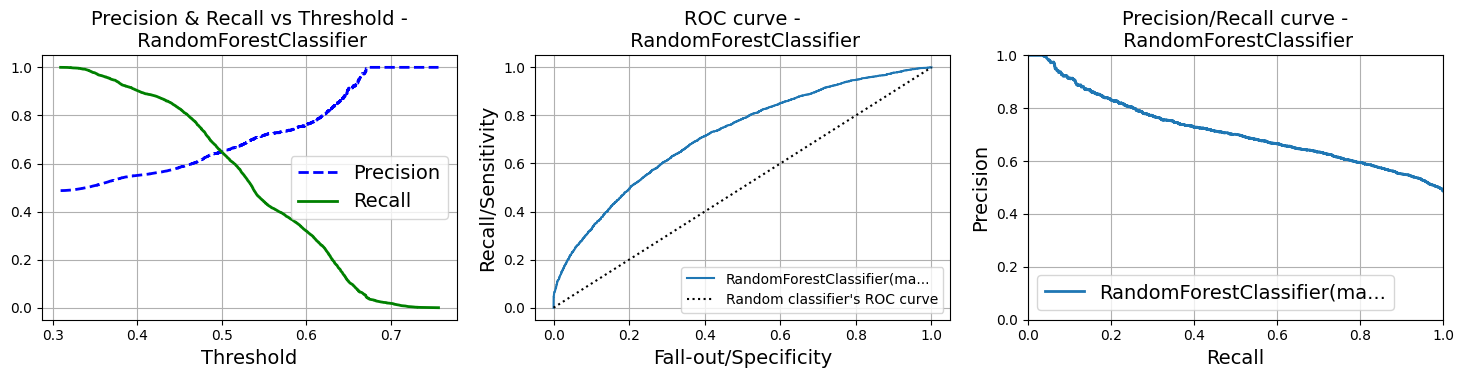


Precision Score of Model RandomForestClassifier(max_depth=10, max_leaf_nodes=10, n_jobs=-1,
                       random_state=42) is 0.6470470068300522

Recall Score of Model RandomForestClassifier(max_depth=10, max_leaf_nodes=10, n_jobs=-1,
                       random_state=42) is 0.647958157312412

F1 Score of Model RandomForestClassifier(max_depth=10, max_leaf_nodes=10, n_jobs=-1,
                       random_state=42) is 0.6475022615338225


In [185]:
classifier_evaluation_function(best_model_random_forest,X_validation,y_validation)

Save Model

In [186]:
save_model_as_pickle(best_model_sgd_clf,'balanced_data_n_0_threshold_change')

'd:\\DS_Stats\\E2E_DS_Propjects\\Loan-Approval-Prediction-Project\\artifact\\balanced_data_n_0_threshold_change\\SGDClassifier.pkl'

In [187]:
save_model_as_pickle(best_model_log_reg,'balanced_data_n_0_threshold_change')
save_model_as_pickle(best_model_svm_clf_linear,'balanced_data_n_0_threshold_change')
save_model_as_pickle(best_model_tree_clf,'balanced_data_n_0_threshold_change')
save_model_as_pickle(best_model_random_forest,'balanced_data_n_0_threshold_change')

'd:\\DS_Stats\\E2E_DS_Propjects\\Loan-Approval-Prediction-Project\\artifact\\balanced_data_n_0_threshold_change\\RandomForestClassifier.pkl'

In [206]:
from sklearn.metrics import auc
def run_models(X,y,sub_folder_name, model_type='Balanced'):
    
    # Define a dictionary of classifiers with their names.
    model_dict = read_pickle_files('artifact',sub_folder_name)
    
    
    # Define columns for the results report.
    cols = ['model','accuracy', 'roc_auc_score', 'precision_score', 'recall_score', 'f1_score']

    # Create an empty DataFrame to store the model performance results.
    models_report = pd.DataFrame(columns=cols)
    
    # Create an empty dictionary to store confusion matrices.
    conf_matrix = dict()

    # Iterate through the classifiers and evaluate their performance.
    for clf, clf_name in zip(model_dict.values(), model_dict.keys()):
        
        # Train the classifier on the training data.
        clf.fit(X, y)

        # Make predictions on the validation data.
        y_pred = clf.predict(X)
        y_score = clf.predict_proba(X)[:, 1] if hasattr(clf, 'predict_proba') else cross_val_predict(clf, X, y, cv=3, method="decision_function")
        

        print(f'computing {clf_name} - {model_type}')

        # Calculate various performance metrics and create a report.
        tmp = pd.Series({
            'model_type': model_type,
            'model': clf_name,
            'accuracy' : cross_val_score(clf, X, y, cv=3, scoring="accuracy").mean(),
            'roc_auc_score': metrics.roc_auc_score(y, y_score),
            'precision_score': metrics.precision_score(y, y_pred),
            'recall_score': metrics.recall_score(y, y_pred),
            'f1_score': metrics.f1_score(y, y_pred)
        })

        # Append the performance metrics to the report DataFrame.
        models_report = models_report.append(tmp, ignore_index=True)
        
        # Create a confusion matrix for this classifier.
        conf_matrix[clf_name] = pd.crosstab(y, y_pred, rownames=['True'], colnames=['Predicted'], margins=False)
        
        # Plot the ROC curve for this classifier.
        fpr, tpr, thresholds = metrics.roc_curve(y, y_score, drop_intermediate=False, pos_label=1)
        
        # Plot the ROC curve for this classifier.
        plt.figure(1, figsize=(6, 6))
        plt.xlabel('false positive rate')
        plt.ylabel('true positive rate')
        plt.title(f'ROC curve - {model_type}')
        plt.plot(fpr, tpr, label=clf_name)
        plt.legend(loc=2, prop={'size': 11})
    
    # Plot the diagonal line (random classifier).
    plt.plot([0, 1], [0, 1], color='black')
    
    # Return the model performance report and confusion matrices.
    return models_report, conf_matrix


In [189]:
read_pickle_files('artifact','balanced_data_n_0_threshold_change')

{'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=15, min_samples_split=5, random_state=42),
 'LinearSVC': LinearSVC(random_state=42),
 'LogisticRegression': LogisticRegression(C=10, penalty='l1', random_state=42, solver='liblinear'),
 'RandomForestClassifier': RandomForestClassifier(max_depth=10, max_leaf_nodes=10, n_jobs=-1,
                        random_state=42),
 'SGDClassifier': SGDClassifier(alpha=0.01, random_state=42)}

computing DecisionTreeClassifier - Balanced
computing LinearSVC - Balanced
computing LogisticRegression - Balanced
computing RandomForestClassifier - Balanced


computing SGDClassifier - Balanced


model  accuracy  roc_auc_score  precision_score  \
0  DecisionTreeClassifier  0.617820       0.951079         0.899658   
1               LinearSVC  0.627033       0.681162         0.632057   
2      LogisticRegression  0.627720       0.688484         0.631534   
3  RandomForestClassifier  0.653892       0.729311         0.693540   
4           SGDClassifier  0.625662       0.680027         0.642087   

   recall_score  f1_score model_type  
0      0.793603  0.843309   Balanced  
1      0.587809  0.609131   Balanced  
2      0.590626  0.610395   Balanced  
3      0.565882  0.623241   Balanced  
4      0.527258  0.579035   Balanced

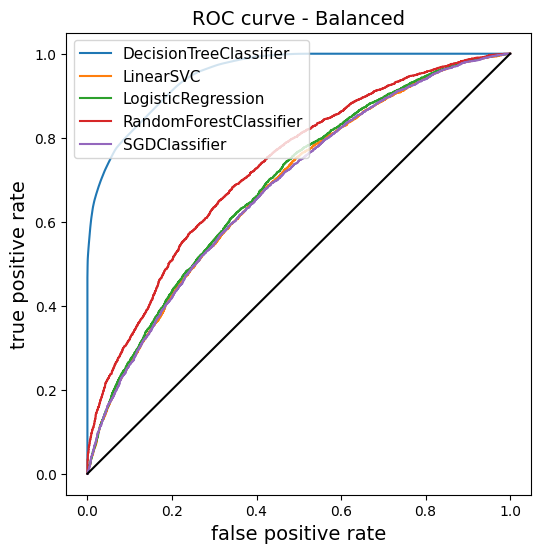

In [190]:
models_report,conf_matrix = run_models(X_validation,y_validation,'balanced_data_n_0_threshold_change')
models_report

We found out for balanced dataset without tuning for precision or recall the Decision Tree Model is the best model.

Now we will find out how imbalanced dataset gives results with different  model.

computing DecisionTreeClassifier - Balanced
computing LinearSVC - Balanced
computing LogisticRegression - Balanced
computing RandomForestClassifier - Balanced
computing SGDClassifier - Balanced


model  accuracy  roc_auc_score  precision_score  \
0  DecisionTreeClassifier  0.656113       0.931322         0.884584   
1               LinearSVC  0.721403       0.673988         0.562612   
2      LogisticRegression  0.720785       0.679032         0.553597   
3  RandomForestClassifier  0.715949       0.677895         0.000000   
4           SGDClassifier  0.715949       0.650779         0.000000   

   recall_score  f1_score model_type  
0      0.646407  0.746969   Balanced  
1      0.124530  0.203923   Balanced  
2      0.155415  0.242696   Balanced  
3      0.000000  0.000000   Balanced  
4      0.000000  0.000000   Balanced

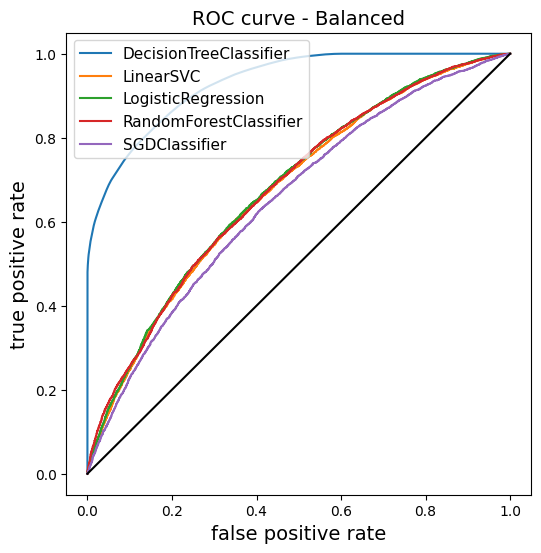

In [215]:
models_report_test,conf_matrix_test = run_models(X_test_preprocessed,y_test_preprocessed,'balanced_data_n_0_threshold_change')
models_report_test

<h4>As we can see based on the metric Decision Tree Classifier gave the best results. Hence we will use the same for predicting where customer loans will be approved or rejected based on the inputs provided. 

Below I tried to see if Imbalanced dataset will give any good accuray and what will be precision scores of various models at different thresholds. 

In [191]:
#imbalanced data set
X_train_imbalanced,X_validation_imbalanced,y_train_imbalanced,y_validation_imbalanced = train_test_split(preprocessed_data, y_train_encoded,test_size=0.1,random_state=42)

In [192]:
print("Initial class distribution for Training Data:", Counter(y_train_imbalanced))
print("Initial class distribution for Validation Data:", Counter(y_validation_imbalanced))

Initial class distribution for Training Data: Counter({0: 45927, 1: 18088})
Initial class distribution for Validation Data: Counter({0: 5079, 1: 2034})


<h5>SGD Classifier for Imbalanced Dataset</h5>

In [193]:
from sklearn.linear_model import SGDClassifier

sgd_clf_imb = SGDClassifier(random_state=42)
sgd_clf_imb.fit(X_train_imbalanced, y_train_imbalanced)

SGDClassifier(random_state=42)

Accuracy for Model SGDClassifier(random_state=42) is 0.717909865225792

Accuracy for Model DummyClassifier() is 0.7174412250631014

Confusion Matrix for Model SGDClassifier(random_state=42) is 
[[45845    82]
 [17976   112]]


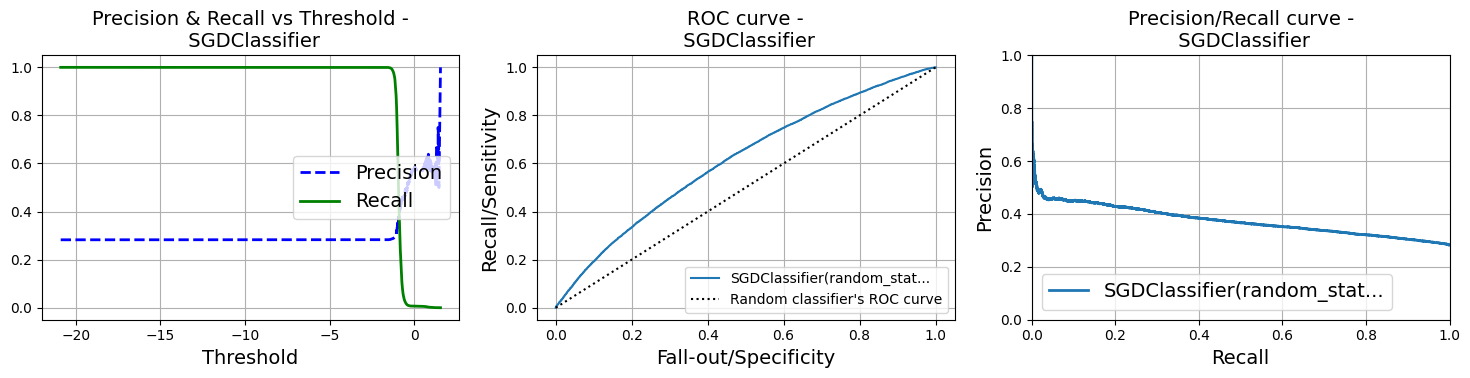


Precision Score of Model SGDClassifier(random_state=42) is 0.5714285714285714

Recall Score of Model SGDClassifier(random_state=42) is 0.005749668288367979

F1 Score of Model SGDClassifier(random_state=42) is 0.011384783798576902


In [194]:
classifier_evaluation_function(sgd_clf_imb,X_train_imbalanced,y_train_imbalanced)

<h5>Logistic Regression for Imbalanced Dataset</h5>

In [195]:
from sklearn.linear_model import LogisticRegression

log_reg_imb = LogisticRegression(random_state=42)
log_reg_imb.fit(X_train_imbalanced, y_train_imbalanced)

LogisticRegression(random_state=42)

Accuracy for Model LogisticRegression(random_state=42) is 0.7252987472325169

Accuracy for Model DummyClassifier() is 0.7174412250631014



Confusion Matrix for Model LogisticRegression(random_state=42) is 
[[43738  2189]
 [15396  2692]]


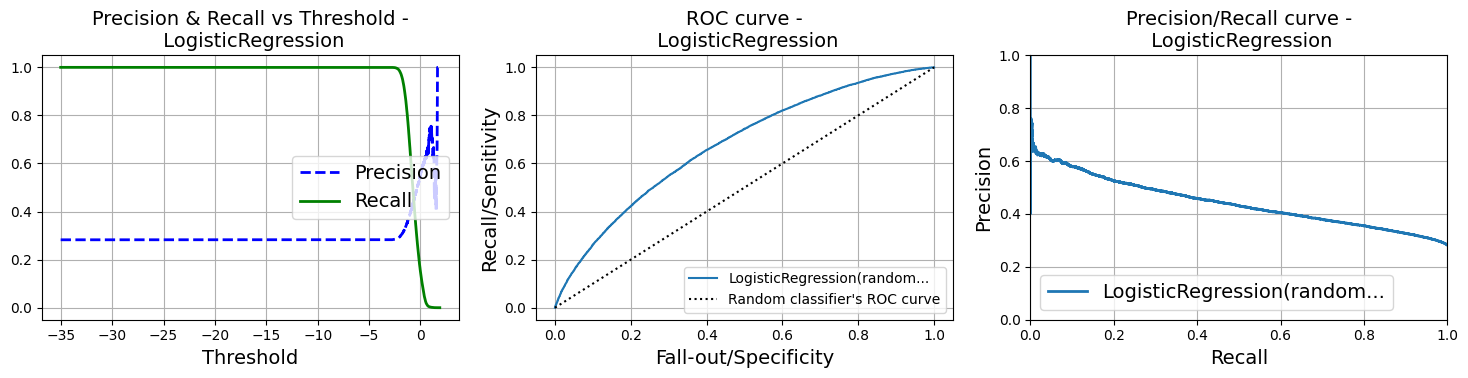


Precision Score of Model LogisticRegression(random_state=42) is 0.55385569567914

Recall Score of Model LogisticRegression(random_state=42) is 0.148109243697479

F1 Score of Model LogisticRegression(random_state=42) is 0.23371864776444928


In [196]:
classifier_evaluation_function(log_reg_imb,X_train_imbalanced,y_train_imbalanced)

<h5>SVM Classifier for Imbalanced Dataset</h5>

In [197]:
from sklearn.svm import LinearSVC

svm_clf_linear_imb = LinearSVC(random_state=42)
svm_clf_linear_imb.fit(X_train_imbalanced,y_train_imbalanced)

LinearSVC(random_state=42)

Accuracy for Model LinearSVC(random_state=42) is 0.7255330446197777

Accuracy for Model DummyClassifier() is 0.7174412250631014

Confusion Matrix for Model LinearSVC(random_state=42) is 
[[44249  1678]
 [15892  2196]]


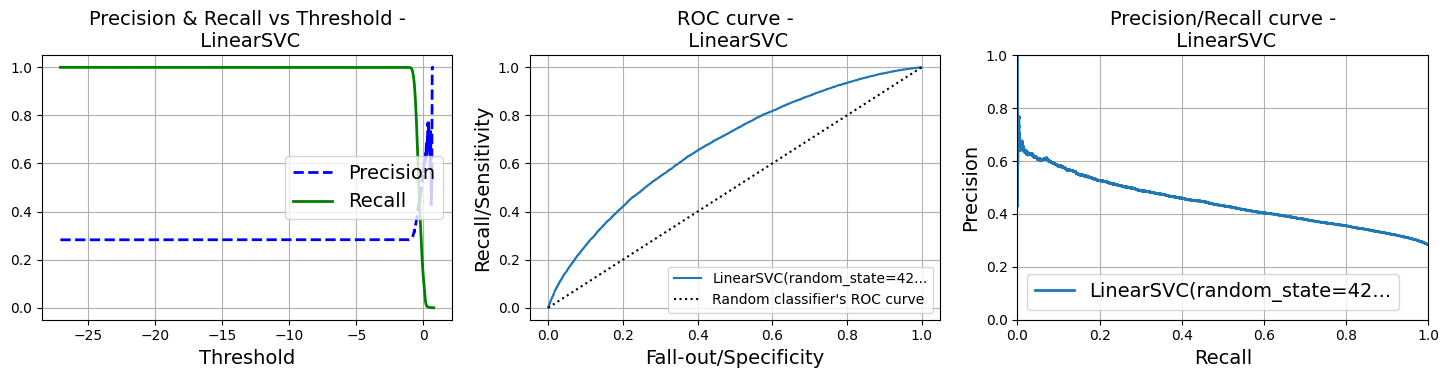


Precision Score of Model LinearSVC(random_state=42) is 0.5706507648431424

Recall Score of Model LinearSVC(random_state=42) is 0.1216828836797877

F1 Score of Model LinearSVC(random_state=42) is 0.20059239006607427


In [198]:
classifier_evaluation_function(svm_clf_linear_imb,X_train_imbalanced,y_train_imbalanced)

<h5>Decision Tree Classifier for Imbalanced Dataset</h5>

In [199]:
from sklearn.tree import DecisionTreeClassifier

tree_clf_imb = DecisionTreeClassifier(max_depth=5, random_state=42)

tree_clf_imb.fit(X_train_imbalanced,y_train_imbalanced)

DecisionTreeClassifier(max_depth=5, random_state=42)

Accuracy for Model DecisionTreeClassifier(max_depth=5, random_state=42) is 0.7223463127434314

Accuracy for Model DummyClassifier() is 0.7174412250631014



Confusion Matrix for Model DecisionTreeClassifier(max_depth=5, random_state=42) is 
[[44089  1838]
 [15936  2152]]
Model DecisionTreeClassifier(max_depth=5, random_state=42) does not support decision_function method.


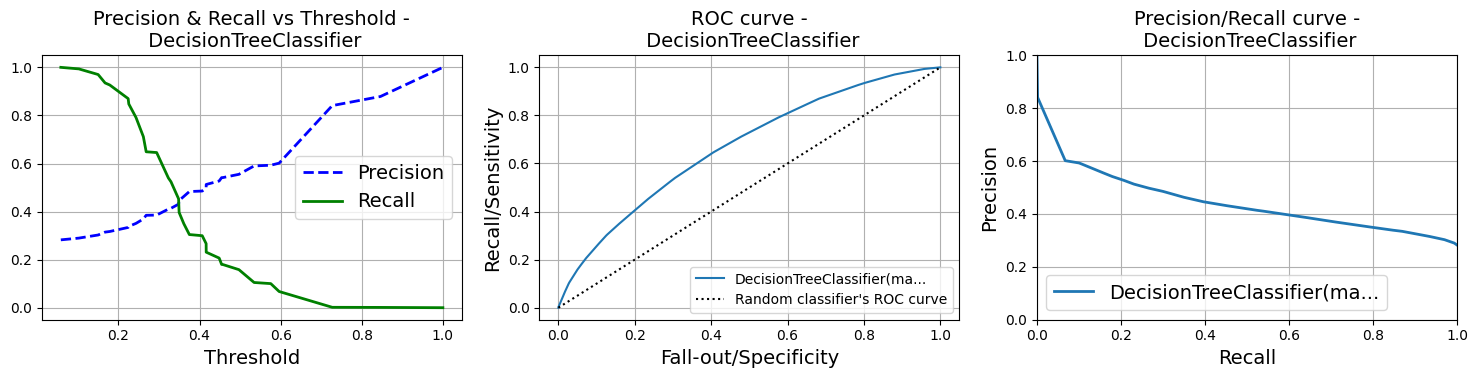


Precision Score of Model DecisionTreeClassifier(max_depth=5, random_state=42) is 0.5900216919739696

Recall Score of Model DecisionTreeClassifier(max_depth=5, random_state=42) is 0.10526315789473684

F1 Score of Model DecisionTreeClassifier(max_depth=5, random_state=42) is 0.17865353037766832


In [200]:
classifier_evaluation_function(tree_clf_imb,X_train_imbalanced,y_train_imbalanced)

<h5>Random Forest Classifier for Imbalanced Dataset</h5>

In [201]:
from sklearn.ensemble import RandomForestClassifier

random_forest_imb = RandomForestClassifier()

random_forest_imb.fit(X_train_imbalanced,y_train_imbalanced)

RandomForestClassifier()

Accuracy for Model RandomForestClassifier() is 0.7242833685101159

Accuracy for Model DummyClassifier() is 0.7174412250631014

Confusion Matrix for Model RandomForestClassifier() is 
[[43695  2232]
 [15416  2672]]
Model RandomForestClassifier() does not support decision_function method.


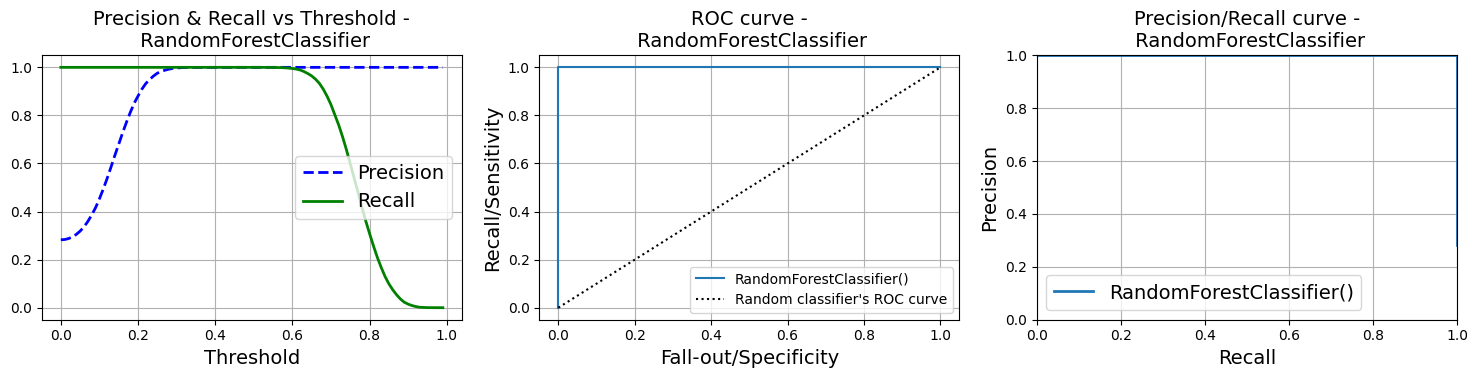


Precision Score of Model RandomForestClassifier() is 1.0

Recall Score of Model RandomForestClassifier() is 1.0

F1 Score of Model RandomForestClassifier() is 1.0


In [202]:
classifier_evaluation_function(random_forest_imb,X_train_imbalanced,y_train_imbalanced)

Imbalanced Dataset even before tuning are giving very poor results.

We will tune models with respect to precision for 

<h5>SGD Classifier Balanced Dataset with tuning to get high precision</h5>

In [205]:
from sklearn.calibration import CalibratedClassifierCV


# Assuming you have a trained SGDClassifier model (best_model_sgd_clf)
calibrated_sgd_clf = CalibratedClassifierCV(best_model_sgd_clf, cv=5)  # Adjust cv as needed
calibrated_sgd_clf.fit(X_train_preprocessed, y_train_preprocessed)

tuning_threshold_2_get_high_precision(calibrated_sgd_clf,X_train_preprocessed,y_train_preprocessed)

threshold  precision   roc_auc
0        0.10   0.501509  0.500186
1        0.15   0.502545  0.502251
2        0.20   0.507370  0.511730
3        0.25   0.518617  0.532747
4        0.30   0.535885  0.561717
5        0.35   0.556792  0.590317
6        0.40   0.581264  0.614151
7        0.45   0.605562  0.625643
8        0.50   0.632567  0.627661
9        0.55   0.659145  0.619989
10       0.60   0.685410  0.603571
11       0.65   0.711489  0.582973
12       0.70   0.738756  0.560006
13       0.75   0.763079  0.536281
14       0.80   0.790609  0.513148
15       0.85   0.768750  0.500932

<h5>Logistic Regression Balanced Dataset with tuning to get high precision</h5>

In [207]:
tuning_threshold_2_get_high_precision(best_model_log_reg,X_train_preprocessed,y_train_preprocessed)

threshold  precision   roc_auc
0        0.10   0.501842  0.500852
1        0.15   0.503835  0.504809
2        0.20   0.509371  0.515580
3        0.25   0.520663  0.536413
4        0.30   0.537754  0.564757
5        0.35   0.557864  0.591965
6        0.40   0.581441  0.614819
7        0.45   0.605988  0.627057
8        0.50   0.632855  0.629086
9        0.55   0.659341  0.621318
10       0.60   0.686162  0.604937
11       0.65   0.712857  0.583799
12       0.70   0.740202  0.560128
13       0.75   0.765773  0.536511
14       0.80   0.781868  0.513276
15       0.85   0.767176  0.501517

<h5>SVM Classifier Balanced Dataset with tuning to get high precision</h5>

In [208]:
from sklearn.calibration import CalibratedClassifierCV

# Create a calibrated LinearSVC model
calibrated_model_svm_clf_linear = CalibratedClassifierCV(best_model_svm_clf_linear)
calibrated_model_svm_clf_linear.fit(X_train_preprocessed, y_train_preprocessed)

tuning_threshold_2_get_high_precision(calibrated_model_svm_clf_linear,X_train_preprocessed,y_train_preprocessed)

threshold  precision   roc_auc
0        0.10   0.501755  0.500677
1        0.15   0.503575  0.504295
2        0.20   0.508902  0.514683
3        0.25   0.520175  0.535558
4        0.30   0.537423  0.564274
5        0.35   0.557546  0.591548
6        0.40   0.581642  0.615135
7        0.45   0.606021  0.627004
8        0.50   0.633158  0.629154
9        0.55   0.659601  0.621104
10       0.60   0.685933  0.604384
11       0.65   0.712946  0.583507
12       0.70   0.740596  0.559836
13       0.75   0.766513  0.536284
14       0.80   0.785375  0.513027
15       0.85   0.769912  0.501322

<h5>Decision Tree Classifier Balanced Dataset with tuning to get high precision</h5>

In [209]:
tuning_threshold_2_get_high_precision(best_model_tree_clf,X_train_preprocessed,y_train_preprocessed)

threshold  precision   roc_auc
0        0.10   0.575067  0.627695
1        0.15   0.607387  0.671439
2        0.20   0.626240  0.693558
3        0.25   0.651392  0.718816
4        0.30   0.671020  0.735083
5        0.35   0.687477  0.746314
6        0.40   0.708938  0.756632
7        0.45   0.723905  0.761371
8        0.50   0.764566  0.765256
9        0.55   0.795865  0.761212
10       0.60   0.849624  0.748181
11       0.65   0.863374  0.742795
12       0.70   0.879139  0.733111
13       0.75   0.917180  0.705923
14       0.80   0.945178  0.684621
15       0.85   0.984886  0.648428

We can see with threshhold of 0.7 we will be able to get 87% accuracy annd AUC is 69%

In [210]:
with open(r"D:\DS_Stats\E2E_DS_Propjects\Loan-Approval-Prediction-Project\artifact\balanced_data_n_0_threshold_change\RandomForestClassifier.pkl", "rb") as f:
    # Load the data from the file
    loaded_data_random_forest = pickle.load(f)

<h5>Random Forest Balanced Dataset with tuning to get high precision</h5>

In [211]:
tuning_threshold_2_get_high_precision(loaded_data_random_forest,X_train_preprocessed,y_train_preprocessed)


threshold  precision   roc_auc
0        0.10   0.501416  0.500000
1        0.15   0.501416  0.500000
2        0.20   0.501416  0.500000
3        0.25   0.501416  0.500000
4        0.30   0.501416  0.500000
5        0.35   0.523486  0.541484
6        0.40   0.564466  0.601629
7        0.45   0.597781  0.634363
8        0.50   0.663218  0.659449
9        0.55   0.723994  0.636990
10       0.60   0.770781  0.612383
11       0.65   0.903864  0.547877
12       0.70   1.000000  0.507744
13       0.75   1.000000  0.500152
14       0.80   0.000000  0.500000
15       0.85   0.000000  0.500000